<a href="https://colab.research.google.com/github/Wallfacer-005/ML/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pipreqs
# 假设你的 notebook 存放在 /content/project 目录下
# 在一个代码单元里运行：
!pip freeze > requirements.txt
from google.colab import drive
drive.mount('/content/drive/MyDrive')
!cp requirements.txt /content/drive/MyDrive/


ValueError: Mountpoint must be in a directory that exists

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 加载和初步处理数据

### Subtask:
加载数据集并进行初步的数据清理和特征工程（例如处理 Cabin 列）。

**Reasoning**:
Load the training and test datasets, handle the 'Cabin' column by splitting and converting 'Cabin_num' to numeric, drop the original 'Cabin' column, convert 'CryoSleep', 'VIP', and 'Transported' to integers, and fill missing values in specified columns of both dataframes. Finally, display the head of the modified training dataframe.

In [ ]:
import pandas as pd

# 加载训练数据集
train_df = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/train.csv')

# 加载测试数据集
test_df = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/test.csv')

# 显示训练 DataFrame 的前 5 行，查看原始数据
print("Original Training Data:")
display(train_df.head())

# 从测试 DataFrame 中存储 'PassengerId' 列，用于后续生成提交文件
test_passenger_ids = test_df['PassengerId']

# 处理训练和测试 DataFrames 中的 'Cabin' 列
# 'Cabin' 列格式为 Deck/Cabin_num/Side，使用 '/' 分割
train_df[["Deck", "Cabin_num", "Side"]] = train_df["Cabin"].str.split("/", expand=True)
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)

# 将 'Cabin_num' 列转换为数值类型，转换过程中发生的错误会变成 NaN
train_df['Cabin_num'] = pd.to_numeric(train_df['Cabin_num'], errors='coerce')
test_df['Cabin_num'] = pd.to_numeric(test_df['Cabin_num'], errors='coerce')

# 从两个 DataFrames 中删除原始的 'Cabin' 列，因为它已经被分割成三个新列
train_df = train_df.drop('Cabin', axis=1)
test_df = test_df.drop('Cabin', axis=1)

# 在将 'CryoSleep' 和 'VIP' 转换为整数之前，用 0 填充它们的缺失值
# 原始数据中的 False/True 会被转换为 0/1，NaN 被填充 0 后也会转换为 0
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(value=0)
train_df['VIP'] = train_df['VIP'].fillna(value=0)
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(value=0)
test_df['VIP'] = test_df['VIP'].fillna(value=0)

# 将 'CryoSleep' 和 'VIP' 列转换为整数类型
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
train_df['VIP'] = train_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
test_df['VIP'] = test_df['VIP'].astype(int)

# 用 0 填充训练 DataFrame 中指定数值列的缺失值
# 这些列代表乘客在各种服务上的花费，缺失值可能意味着没有使用这些服务
train_df[['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df[['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

# 将训练 DataFrame 中的 'Transported' 列转换为整数类型 (False -> 0, True -> 1)
train_df['Transported'] = train_df['Transported'].astype(int)

# 显示修改后训练 DataFrame 的前 5 行，检查处理结果
print("\nModified Training Data:")
display(train_df.head())

# 注意：测试 DataFrame 的缺失值处理（除了 CryoSleep, VIP, Cabin）将在数据预处理阶段进行。

Original Training Data:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



Modified Training Data:


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0.0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1.0,S


## 加载和初步处理数据

### Subtask:
加载数据集并进行初步的数据清理和特征工程（例如处理 Cabin 列）。

**Reasoning**:
Load the training and test datasets, handle the 'Cabin' column by splitting and converting 'Cabin_num' to numeric, drop the original 'Cabin' column, convert 'CryoSleep', 'VIP', and 'Transported' to integers, and fill missing values in specified columns of both dataframes. Finally, display the head of the modified training dataframe.

## 数据预处理（适用于 lazypredict 和神经网络）

### Subtask:
处理缺失值，对分类特征进行编码，确保数据格式适合 Lazypredict 和神经网络模型。

**Reasoning**:
Identify numerical and categorical features, create preprocessing pipelines for imputation and encoding, apply the pipelines to training and test data, and split the processed training data into training and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd # 确保导入 pandas

# 从训练数据中删除 'Transported'（目标变量）、'PassengerId' 和 'Name' 列，它们不是模型特征
X = train_df.drop(['Transported', 'PassengerId', 'Name'], axis=1)
# 提取目标变量 'Transported'
y = train_df['Transported']

# 从测试数据中删除 'PassengerId' 和 'Name' 列，使其特征与训练数据对齐
test_df_features = test_df.drop(['PassengerId', 'Name'], axis=1)

# 从特征 DataFrame 中识别分类特征和数值特征
# 排除目标变量 'Transported' 和标识符 'PassengerId'、'Name'
# 'CryoSleep' 和 'VIP' 已经在之前转换为 int 并填充了 0，可以视为数值或序数特征，这里列为分类特征进行独热编码
# 虽然之前转换为 int 并填充 0，但在预处理阶段进行独热编码对于它们作为分类特征处理更安全。
categorical_features = ['HomePlanet', 'Destination', 'Deck', 'Side', 'CryoSleep', 'VIP']
# 'Cabin_num' 虽然是数字，但更像一个类别标识，或者可以看作一个序数特征。这里列为数值特征进行填充。
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']


# 为数值特征创建预处理管道
# 数值特征处理：使用均值填充缺失值
numerical_transformer = SimpleImputer(strategy='mean')

# 为分类特征创建预处理管道
# 分类特征处理：使用众数填充缺失值，然后进行独热编码
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # 使用众数填充缺失的分类值
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # 应用独热编码，忽略转换过程中遇到的未知类别
])

# 创建一个列转换器，对不同的列应用不同的转换
# 'CryoSleep' 和 'VIP' 虽然在 categorical_features 中列出，但由于已在之前转换为 int 并填充 0，
# 如果不进行独热编码，它们会通过 remainder='passthrough' 保留原样。
# 为了确保所有分类特征都被独热编码，我们将其包含在 categorical_features 列表中。
# remainder='passthrough' 会保留那些未在 transformer 中指定处理的列。
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features), # 对数值特征应用数值转换器
        ('cat', categorical_transformer, categorical_features) # 对分类特征应用分类转换器
    ],
    remainder='passthrough' # 保留未指定的其他列 (在本例中没有，因为所有列都已处理)
)

# 对训练数据特征应用预处理
# 在训练数据上拟合预处理器（学习填充值和编码映射），然后转换训练数据
X_processed = preprocessor.fit_transform(X)

# 对测试数据特征应用预处理
# 使用在训练数据上拟合好的预处理器来转换测试数据（不要在测试数据上再次拟合）
test_df_processed = preprocessor.transform(test_df_features)

# 将处理后的训练数据分割成训练集和验证集
# 80% 用于训练，20% 用于验证
# random_state 确保每次运行分割结果一致
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.20, random_state=42)

print("处理后的训练数据形状:", X_train.shape)
print("处理后的验证数据形状:", X_val.shape)
print("处理后的测试数据形状:", test_df_processed.shape)

处理后的训练数据形状: (6954, 27)
处理后的验证数据形状: (1739, 27)
处理后的测试数据形状: (4277, 27)


In [ ]:
# 引入所需的库
import numpy as np
from collections import Counter # 用于决策树中计算类别频率
from sklearn.model_selection import train_test_split # 用于划分训练集和验证集
from sklearn.preprocessing import OneHotEncoder, StandardScaler # 用于特征编码和缩放 (虽然本次主要手动实现，但在预处理部分会用到)
from sklearn.impute import SimpleImputer # 用于填充缺失值
from sklearn.compose import ColumnTransformer # 用于并行处理不同的特征列
from sklearn.pipeline import Pipeline # 用于构建预处理流程

# 引入评估指标，用于对比不同模型的性能
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score

# 引入 TensorFlow 和 Keras 用于构建神经网络
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# --- 基础工具函数 ---

# 1. Element-wise addition (元素级相加)
def element_wise_add(v1, v2):
    """
    执行两个列表或 NumPy 数组的元素级相加。
    使用 NumPy 的功能以提高效率。

    Args:
        v1 (list or np.ndarray): 第一个向量或数组。
        v2 (list or np.ndarray): 第二个向量或数组。

    Returns:
        np.ndarray: 相加后的结果数组。

    Raises:
        ValueError: 如果输入向量/数组的形状不同。
    """
    # 将输入转换为 NumPy 数组，以便利用 NumPy 的广播和高效运算
    v1 = np.asarray(v1)
    v2 = np.asarray(v2)
    # 检查两个数组的形状是否相同，这是元素级运算的前提
    if v1.shape != v2.shape:
        raise ValueError("输入向量/数组的形状必须相同才能进行元素级相加。")
    # 执行元素级相加并返回结果
    return v1 + v2

# 2. Element-wise subtraction (元素级相减)
def element_wise_subtract(v1, v2):
    """
    执行两个列表或 NumPy 数组的元素级相减。
    使用 NumPy 的功能以提高效率。

    Args:
        v1 (list or np.ndarray): 第一个向量或数组。
        v2 (list or np.ndarray): 第二个向量或数组。

    Returns:
        np.ndarray: 相减后的结果数组。

    Raises:
        ValueError: 如果输入向量/数组的形状不同。
    """
    # 将输入转换为 NumPy 数组
    v1 = np.asarray(v1)
    v2 = np.asarray(v2)
    # 检查形状是否相同
    if v1.shape != v2.shape:
        raise ValueError("输入向量/数组的形状必须相同才能进行元素级相减。")
    # 执行元素级相减并返回结果
    return v1 - v2

# 3. Scalar multiplication (标量乘法)
def scalar_multiply(scalar, v):
    """
    执行标量与列表或 NumPy 数组的乘法。
    使用 NumPy 的功能以提高效率。

    Args:
        scalar (float or int): 标量值。
        v (list or np.ndarray): 向量或数组。

    Returns:
        np.ndarray: 乘法后的结果数组。
    """
    # 将输入转换为 NumPy 数组
    v = np.asarray(v)
    # 执行标量乘法并返回结果
    return scalar * v

# 4. Dot product (点积)
def dot_product(v1, v2):
    """
    计算两个列表或 NumPy 数组（向量）的点积。
    点积是对应元素乘积的和，结果是一个标量。
    使用 NumPy 的功能以提高效率。

    Args:
        v1 (list or np.ndarray): 第一个向量。
        v2 (list or np.ndarray): 第二个向量。

    Returns:
        float: 计算出的点积值。

    Raises:
        ValueError: 如果输入向量的形状不同。
    """
    # 将输入转换为 NumPy 数组
    v1 = np.asarray(v1)
    v2 = np.asarray(v2)
    # 检查向量的形状是否相同（即维度是否相同）
    if v1.shape != v2.shape:
        raise ValueError("输入向量的形状必须相同才能计算点积。")
    # 使用 NumPy 的 dot 函数计算点积
    return np.dot(v1, v2)

# 5. Matrix-vector multiplication (矩阵-向量乘法)
def matrix_vector_multiply(matrix, vector):
    """
    执行矩阵与向量的乘法。
    结果是一个新的向量，其维度等于矩阵的行数。
    使用 NumPy 的功能以提高效率。

    Args:
        matrix (list of lists or np.ndarray): 矩阵，形状为 (m, n)。
        vector (list or np.ndarray): 向量，形状为 (n,)。

    Returns:
        np.ndarray: 乘法后的结果向量，形状为 (m,)。

    Raises:
        ValueError: 如果矩阵的列数与向量的行数（维度）不匹配。
    """
    # 将输入转换为 NumPy 数组
    matrix = np.asarray(matrix)
    vector = np.asarray(vector)

    # 检查矩阵的列数 (matrix.shape[1]) 是否与向量的维度 (vector.shape[0]) 匹配
    if matrix.shape[1] != vector.shape[0]:
        raise ValueError("矩阵的列数必须与向量的行数（维度）匹配才能进行矩阵-向量乘法。")

    # 使用 NumPy 的 dot 函数执行矩阵-向量乘法
    return np.dot(matrix, vector)

# 6. Log Loss (Binary Cross-Entropy) (对数损失 / 二元交叉熵)
def log_loss(y_true, y_pred_prob):
    """
    计算对数损失（二元交叉熵）。
    衡量二分类模型预测概率与真实标签之间的差异。损失值越低越好。

    Args:
        y_true (list or np.ndarray): 真实标签，形状为 (n_samples,)，元素为 0 或 1。
        y_pred_prob (list or np.ndarray): 预测概率，形状为 (n_samples,)，元素介于 0 和 1 之间。

    Returns:
        float: 计算出的平均对数损失值。
    """
    # 将输入转换为 NumPy 数组
    y_true = np.asarray(y_true)
    y_pred_prob = np.asarray(y_pred_prob)

    epsilon = 1e-15 # 定义一个很小的数值，用于防止计算 log(0)，避免数值不稳定
    # 将预测概率截断，使其不会是精确的 0 或 1。
    # np.clip(array, min_value, max_value) 将数组中的元素限制在指定范围内
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    # 根据对数损失的公式计算损失值
    # L(y, p) = - [y * log(p) + (1 - y) * log(1 - p)]
    # np.mean() 计算所有样本的平均损失
    return -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))

# 7. Gradient of Log Loss with respect to raw score (before sigmoid)
#    对数损失关于原始得分（sigmoid 之前的输出）的梯度
def log_loss_gradient_score(y_true, y_raw_score):
    """
    计算对数损失关于原始得分 (z) 的梯度，其中预测概率 p = sigmoid(z)。
    这个梯度是用于基于梯度的优化算法（如梯度下降）来更新模型权重的。
    数学上，dL/dz = dL/dp * dp/dz。对于对数损失 L(y, p) = -[y log(p) + (1-y) log(1-p)]
    和 sigmoid 函数 p = 1 / (1 + exp(-z))，这个链式法则计算结果简化为 p - y。

    Args:
        y_true (list or np.ndarray): 真实标签，形状为 (n_samples,)，元素为 0 或 1。
        y_raw_score (list or np.ndarray): 模型预测的原始得分，形状为 (n_samples,)，即 sigmoid 激活函数之前的输出 (w^T * x + b)。

    Returns:
        np.ndarray: 计算出的梯度数组，形状为 (n_samples,)。
    """
    # 将输入转换为 NumPy 数组
    y_true = np.asarray(y_true)
    y_raw_score = np.asarray(y_raw_score)

    # 使用 sigmoid 函数将原始得分转换为预测概率 p
    y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
    # 对数损失关于原始得分的梯度就是 (预测概率 - 真实标签)
    return y_pred_prob - y_true

# 8. Hinge Loss (铰链损失)
def hinge_loss(y_true, y_score):
    """
    计算铰链损失。
    这是支持向量机 (SVM) 中常用的损失函数，用于衡量分类的错误程度和间隔违规。
    它的目标是使 y_true * y_score >= 1，即正确分类的样本与决策边界之间有至少为 1 的间隔。

    Args:
        y_true (list or np.ndarray): 真实标签，形状为 (n_samples,)，元素通常为 -1 或 1。
        y_score (list or np.ndarray): 模型预测的原始得分，形状为 (n_samples,)，即线性模型的输出 (w^T * x + b)。

    Returns:
        float: 计算出的平均铰链损失值。
    """
    # 将输入转换为 NumPy 数组
    y_true = np.asarray(y_true)
    y_score = np.asarray(y_score)

    # 铰链损失的定义为 max(0, 1 - y * score)
    # np.maximum(a1, a2) 计算两个数组对应元素的较大值
    # 如果 1 - y_true * y_score 小于 0，则损失为 0；否则损失为 1 - y_true * y_score
    return np.mean(np.maximum(0, 1 - y_true * y_score))

# 9. Subgradient of Hinge Loss with respect to predicted score
#    铰链损失关于预测得分的次梯度
def hinge_loss_subgradient_score(y_true, y_score):
    """
    计算铰链损失关于预测得分的次梯度。
    由于铰链损失在 y * score = 1 处不可微（函数在该点是连续的但没有唯一的切线），我们使用次梯度的概念。
    次梯度是 -y 如果 y * score < 1，否则是 0。

    Args:
        y_true (list or np.ndarray): 真实标签，形状为 (n_samples,)，元素通常为 -1 或 1。
        y_score (list or np.ndarray): 模型预测的原始得分，形状为 (n_samples,)，即线性模型的输出 (w^T * x + b)。

    Returns:
        np.ndarray: 计算出的次梯度数组，形状为 (n_samples,)。
    """
    # 将输入转换为 NumPy 数组
    y_true = np.asarray(y_true)
    y_score = np.asarray(y_score)

    # 根据条件计算次梯度
    # np.where(condition, x, y) - 如果 condition 中对应元素为 True，则返回 x 中对应元素，否则返回 y 中对应元素
    # 在这里，条件是 y_true * y_score < 1
    # 如果条件为 True，次梯度为 -y_true
    # 如果条件为 False (即 y_true * y_score >= 1)，次梯度为 0
    subgradient = np.where(y_true * y_score < 1, -y_true, 0)
    return subgradient

print("基础向量/矩阵运算、损失函数和梯度计算函数已定义，包含详细中文注释。")

基础向量/矩阵运算、损失函数和梯度计算函数已定义，包含详细中文注释。


In [ ]:
import numpy as np
from sklearn.utils import shuffle # 用于数据打乱，实现随机梯度下降
from sklearn.metrics import accuracy_score # 用于评估，方便验证实现

class ManualSGDClassifier:
    """
    手动实现的 SGDClassifier，支持对数损失 (Log Loss) 和铰链损失 (Hinge Loss)。
    使用随机梯度下降 (SGD) 优化算法来训练线性模型。
    """
    def __init__(self, learning_rate=0.01, n_epochs=100, loss='log_loss', random_state=None):
        """
        初始化 ManualSGDClassifier 模型。

        Args:
            learning_rate (float): 学习率，控制每次权重更新的步长。较小的学习率可能需要更多迭代次数。
            n_epochs (int): 训练的总周期数。一个周期表示遍历整个训练数据集一次。
            loss (str): 损失函数，指定模型优化的目标。
                        可以是 'log_loss' (对数损失，对应逻辑回归) 或 'hinge' (铰链损失，对应线性 SVM)。
            random_state (int, optional): 随机种子，用于权重初始化和数据打乱，确保结果的可复现性。默认为 None。
        """
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.loss = loss
        self.random_state = random_state
        self.w = None # 模型的权重向量 (NumPy 数组)，形状为 (n_features,)
        self.b = None # 模型的偏置项 (标量)

        # 如果指定了 random_state，设置 NumPy 的随机种子
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # 检查指定的损失函数是否受支持
        if self.loss not in ['log_loss', 'hinge']:
            raise ValueError("ManualSGDClassifier 仅支持 'log_loss' 和 'hinge' 损失函数。")

    def fit(self, X, y):
        """
        使用随机梯度下降训练模型。

        Args:
            X (np.ndarray): 训练特征数据，形状为 (n_samples, n_features)。
                           这是一个二维 NumPy 数组，每一行代表一个样本，每一列代表一个特征。
            y (np.ndarray): 训练标签，形状为 (n_samples,)。
                           这是一个一维 NumPy 数组，每个元素对应一个样本的真实类别标签。
                           对于 'log_loss'，标签应为 0 或 1。
                           对于 'hinge'，标签应为 -1 或 1。如果在调用 fit 时传递的是 0/1，
                           fit 方法内部会将其转换为 -1/1 以便正确计算铰链损失。
        """
        # 确保输入 X 和 y 是 NumPy 数组，方便进行数组运算
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples, n_features = X.shape # 获取样本数量和特征数量

        # 初始化权重向量 w 和偏置项 b
        # 通常初始化为零或小的随机值。这里选择初始化为零。
        self.w = np.zeros(n_features) # 初始化权重向量，形状与特征数量相同
        self.b = 0.0 # 初始化偏置项为零

        # 对于 Hinge Loss，确保标签是 -1 或 1
        # 如果输入的 y 是 0/1，将其转换为 -1/1 用于计算铰链损失和梯度
        if self.loss == 'hinge':
             y_processed = np.where(y == 1, 1, -1)
        else:
             y_processed = y # Log Loss 直接使用 0 或 1 标签

        # SGD 训练循环
        # 迭代指定的周期数
        for epoch in range(self.n_epochs):
            # 在每个周期开始时打乱训练数据的索引，实现随机梯度下降
            # 打乱数据可以防止模型陷入局部最优，并提高收敛速度
            indices = np.arange(n_samples) # 创建包含所有样本索引的数组
            np.random.shuffle(indices) # 原地打乱索引数组

            # 遍历打乱后的索引，按随机顺序处理每个样本
            for i in indices:
                x_i = X[i] # 获取当前样本的特征向量
                y_i = y_processed[i] # 获取当前样本的处理后标签 (对于 Hinge Loss 可能是 -1/1)

                # 计算当前样本的原始得分 (score = w^T * x + b)
                # 这是线性模型的输出，在应用激活函数（如 sigmoid 或 sign）之前
                score = dot_product(self.w, x_i) + self.b # 使用之前定义的 dot_product 函数

                # 计算损失函数关于原始得分的梯度或次梯度
                # 这个梯度/次梯度指示了在当前样本下，稍微改变原始得分会如何影响损失
                if self.loss == 'log_loss':
                    # 对数损失关于原始得分的梯度: dL/dz = p - y
                    gradient_score = log_loss_gradient_score(y_i, score) # 使用之前定义的 log_loss_gradient_score 函数
                    # 注意：这里的 y_i 仍然是 0 或 1
                elif self.loss == 'hinge':
                    # 铰链损失关于原始得分的次梯度: -y_i if y_i * score < 1, else 0
                    gradient_score = hinge_loss_subgradient_score(y_i, score) # 使用之前定义的 hinge_loss_subgradient_score 函数
                    # 注意：这里的 y_i 已经是 -1 或 1

                # 计算权重和偏置的梯度
                # 根据链式法则，损失关于权重的梯度 dL/dw = dL/dz * dz/dw = gradient_score * x_i
                # 损失关于偏置的梯度 dL/db = dL/dz * dz/db = gradient_score * 1 = gradient_score
                weight_gradient = scalar_multiply(gradient_score, x_i) # 使用之前定义的 scalar_multiply 函数
                bias_gradient = gradient_score # 偏置的梯度是标量

                # 更新权重和偏置
                # 更新规则： 参数 = 参数 - learning_rate * 梯度
                self.w = element_wise_subtract(self.w, scalar_multiply(self.learning_rate, weight_gradient)) # 使用之前定义的 element_wise_subtract 和 scalar_multiply
                self.b = self.b - self.learning_rate * bias_gradient

            # 可选：在每个训练周期结束时计算并打印当前训练集的平均损失
            # 这有助于监控训练过程，看损失是否在下降
            # 但是计算整个训练集的损失会增加训练时间，特别是在大数据集上
            # train_scores = self.decision_function(X) # 获取所有训练样本的原始得分
            # if self.loss == 'log_loss':
            #     # 对于 Log Loss，需要计算预测概率来计算损失
            #     train_probs = 1 / (1 + np.exp(-train_scores)) # 将原始得分转换为概率
            #     avg_loss = log_loss(y, train_probs) # 计算对数损失
            # elif self.loss == 'hinge':
            #      # 对于 Hinge Loss，直接使用原始得分和处理后的标签计算损失
            #      avg_loss = hinge_loss(y_processed, train_scores) # 计算铰链损失
            # print(f"周期 {epoch + 1}/{self.n_epochs}, 平均损失: {avg_loss:.4f}")

        print("模型训练完成。")


    def decision_function(self, X):
        """
        计算输入数据的原始得分 (w^T * x + b)。
        这是模型在线性层面的输出，在应用最终的激活函数（如 sigmoid 或 sign）之前。

        Args:
            X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。

        Returns:
            np.ndarray: 每个样本的原始得分数组，形状为 (n_samples,)。
        """
        # 确保模型已经训练过，即权重 w 和偏置 b 不为 None
        if self.w is None or self.b is None:
            raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

        # 确保输入 X 是 NumPy 数组
        X = np.asarray(X)

        # 使用矩阵-向量乘法计算所有样本的得分
        # X 是 (n_samples, n_features)，w 是 (n_features,)
        # X @ w 得到 (n_samples,) 的结果，代表每个样本与权重向量的点积
        # 再加上偏置项 b
        return matrix_vector_multiply(X, self.w) + self.b # 使用之前定义的 matrix_vector_multiply 函数


    def predict_proba(self, X):
        """
        计算输入数据属于正类的预测概率 (仅适用于 loss='log_loss')。
        对于 loss='hinge'，线性 SVM 通常不直接提供概率输出。

        Args:
            X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。

        Returns:
            np.ndarray: 每个样本的预测概率数组，形状为 (n_samples, 2)。
                        第一列是负类概率 (类别 0)，第二列是正类概率 (类别 1)。

        Raises:
            NotImplementedError: 如果损失函数不是 'log_loss'。
            RuntimeError: 如果模型尚未训练。
        """
        # 只有当损失函数是对数损失时，才提供概率输出
        if self.loss != 'log_loss':
            raise NotImplementedError("predict_proba 方法仅适用于损失函数为 'log_loss' 的情况。")

        # 确保模型已经训练过
        if self.w is None or self.b is None:
            raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

        # 计算原始得分
        raw_scores = self.decision_function(X)

        # 使用 sigmoid 函数将原始得分转换为预测概率
        # sigmoid(z) = 1 / (1 + exp(-z))
        positive_probabilities = 1 / (1 + np.exp(-raw_scores))

        # 返回形状为 (n_samples, 2) 的概率数组 [prob_class_0, prob_class_1]
        return np.vstack([1 - positive_probabilities, positive_probabilities]).T


    def predict(self, X):
        """
        预测输入数据的类别。

        Args:
            X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。

        Returns:
            np.ndarray: 预测的类别标签数组，形状为 (n_samples,)。
                        对于 'log_loss'，预测结果是 0 或 1。
                        对于 'hinge'，预测结果是 0 或 1 (内部会将 -1 映射到 0)。

        Raises:
            RuntimeError: 如果模型尚未训练。
        """
        # 确保模型已经训练过
        if self.w is None or self.b is None:
            raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

        # 计算原始得分
        raw_scores = self.decision_function(X)

        # 根据原始得分和损失函数进行类别预测
        if self.loss == 'log_loss':
            # 对于 Log Loss (逻辑回归)，使用 sigmoid 后的概率阈值 0.5 进行分类。
            # 这等价于直接判断原始得分是否大于 0。
            # 如果 score > 0，预测为 1；否则预测为 0。
            predictions = (raw_scores > 0).astype(int) # 将布尔值转换为整数 (True -> 1, False -> 0)
        elif self.loss == 'hinge':
            # 对于 Hinge Loss (线性 SVM)，根据原始得分的符号进行预测。
            # 如果 score > 0，预测为正类 (对应原始标签 1)；如果 score <= 0，预测为负类 (对应原始标签 -1)。
            # 为了与通常的二分类标签 (0 和 1) 兼容，我们将 -1 映射到 0。
            # np.where(condition, x, y) - 如果 condition 为 True，则返回 x，否则返回 y
            predictions = np.where(raw_scores > 0, 1, 0) # 如果 score > 0 预测为 1，否则预测为 0

        return predictions

print("ManualSGDClassifier 类已定义，包含详细中文注释。")

ManualSGDClassifier 类已定义，包含详细中文注释。


In [ ]:
# import numpy as np
# # from sklearn.utils import shuffle # 可以用于 SGD 变种，但 LinearSVC 通常使用更复杂的优化器，这里不再需要 shuffle

# class ManualLinearSVC:
#     """
#     手动实现的 Linear SVC 模型。
#     使用带有 L2 正则化的铰链损失和一种迭代优化方法（如简化版的梯度下降或坐标下降思想）进行训练。
#     注意：这个手动实现是 LinearSVC 核心原理的简化版本，不包含 liblinear 库的复杂优化。
#     """
#     def __init__(self, C=1.0, n_iterations=1000, learning_rate=0.01, random_state=None):
#         """
#         初始化 ManualLinearSVC 模型。

#         Args:
#             C (float): 正则化参数。C 值越大，对误分类的惩罚越大。
#                        对应于优化问题中的 C * sum(max(0, 1 - y_i * score_i)) 部分。
#                        在优化目标 1/2 * ||w||^2 + C * sum(...) 中，C 控制了损失项的权重。
#             n_iterations (int): 优化迭代次数。
#             learning_rate (float): 梯度下降的学习率。
#             random_state (int, optional): 随机种子，用于权重初始化（如果使用随机初始化）。默认为 None。
#         """
#         self.C = C
#         self.n_iterations = n_iterations
#         self.learning_rate = learning_rate
#         self.random_state = random_state
#         self.w = None  # 权重向量 (NumPy 数组)，形状为 (n_features,)
#         self.b = None  # 偏置项 (标量)

#         # 如果指定了 random_state，设置 NumPy 的随机种子
#         if self.random_state is not None:
#             np.random.seed(self.random_state)

#     def fit(self, X, y):
#         """
#         使用迭代优化方法（例如，这里实现的是基于单个样本更新的梯度下降变种）
#         训练带有 L2 正则化的铰链损失。

#         Args:
#             X (np.ndarray): 训练特征数据，形状为 (n_samples, n_features)。
#                            这是一个二维 NumPy 数组。
#             y (np.ndarray): 训练标签，形状为 (n_samples,)。
#                            这是一个一维 NumPy 数组，元素应为 0 或 1。
#                            fit 方法内部会将其转换为 -1 和 1 以便与标准铰链损失定义兼容。
#         """
#         # 确保输入 X 和 y 是 NumPy 数组
#         X = np.asarray(X)
#         y = np.asarray(y)

#         n_samples, n_features = X.shape # 获取样本数量和特征数量

#         # 将标签转换为 -1 和 1，以便与标准铰链损失定义兼容
#         # LinearSVC 通常要求标签为 -1 和 1
#         y_processed = np.where(y == 1, 1, -1)

#         # 初始化权重向量 w 和偏置项 b
#         # 对于带有 L2 正则化的模型，初始化为零是常见的做法
#         self.w = np.zeros(n_features) # 初始化权重向量为零
#         self.b = 0.0 # 初始化偏置项为零

#         # 迭代优化循环
#         # 迭代指定的次数来更新权重和偏置
#         for i in range(self.n_iterations):
#             # 在每次迭代中随机选择一个样本进行更新（这是一个简化版的 SGD 或坐标下降思想）
#             # 更复杂的实现可能使用小批量 (mini-batch) 或完整的批量梯度下降，
#             # 或者像 liblinear 那样使用坐标下降。这里选择最简单的单样本更新。

#             # 随机选择一个样本索引
#             sample_index = np.random.randint(n_samples)
#             x_i = X[sample_index] # 获取当前样本的特征向量
#             y_i = y_processed[sample_index] # 获取当前样本的处理后标签 (-1 或 1)

#             # 计算当前样本的原始得分 (score = w^T * x + b)
#             score_i = dot_product(self.w, x_i) + self.b # 使用之前定义的 dot_product 函数

#             # 计算当前样本的铰链损失关于原始得分的次梯度
#             # subgradient_score_i 是一个标量：-y_i if y_i * score_i < 1, else 0
#             subgradient_score_i = hinge_loss_subgradient_score(np.array([y_i]), np.array([score_i]))[0]
#             # 注意：hinge_loss_subgradient_score 函数期望输入是数组，即使只有一个样本，
#             # 所以这里将 y_i 和 score_i 临时包装成数组，并取出结果的第一个元素。

#             # 计算总的权重梯度 (dL/dw) 和偏置梯度 (dL/db)
#             # 优化目标是： L(w, b) = 1/2 * ||w||^2 + C * sum(max(0, 1 - y_i * (w^T * x_i + b)))
#             # 对 w 求导（或次导）： dL/dw = w + C * sum(铰链损失关于 w 的次梯度)
#             # 铰链损失关于 w 的次梯度对于单个样本 (x_i, y_i) 是： -y_i * x_i 如果 y_i * score_i < 1，否则是 0
#             # 这正好等于 subgradient_score_i * x_i
#             # 所以对于单个样本的更新方向，我们计算： w + C * (subgradient_score_i * x_i)  -- 这是对整个损失函数求导
#             # 但在 SGD 中，我们使用单个样本的梯度来近似总梯度。
#             # SGD 更新规则通常是： 参数 = 参数 - learning_rate * (单个样本的梯度)
#             # 在带有 L2 正则化的情况下，SGD 的更新规则可以写为：
#             # w = w - learning_rate * (梯度_loss + 梯度_regularization)
#             # 梯度_loss (对于单个样本) = subgradient_score_i * x_i
#             # 梯度_regularization = w  (对于 1/2 * ||w||^2 的 L2 正则项)
#             # 所以更新： w = w - learning_rate * (subgradient_score_i * x_i + w)
#             # 也可以写成： w = w * (1 - learning_rate) - learning_rate * subgradient_score_i * x_i
#             # 注意：这里的 C 参数控制的是损失项的权重，而不是正则项的系数。
#             # 在 sklearn 的 LinearSVC 中，参数 C 对应的是损失项的系数，正则项是 1/2 * ||w||^2。
#             # 所以优化目标是 min 1/2 * ||w||^2 + C * sum(Loss_i)
#             # 梯度是 w + C * sum(dL_i/dw)
#             # SGD 更新（对于单个样本）： w = w - learning_rate * (w + C * dL_i/dw)
#             # dL_i/dw = subgradient_score_i * x_i
#             # w = w - learning_rate * w - learning_rate * C * subgradient_score_i * x_i
#             # w = w * (1 - learning_rate) - learning_rate * C * subgradient_score_i * x_i  -- 这个形式更常见

#             # 我们采用更常见的 SGD 更新形式： w = w * (1 - learning_rate * lambda) - learning_rate * 梯度_loss
#             # 其中 lambda 是正则化系数。在优化目标 1/2 * ||w||^2 + C * sum(Loss) 中，正则化系数实际上是 1。
#             # 但是 C 是损失项的系数。
#             # 为了与 sklearn 约定一致 (min ||w||^2 / 2 + C * sum(Loss)), 梯度是 w + C * dL_i/dw.
#             # SGD 更新： w = w - learning_rate * (w + C * dL_i/dw)
#             # dL_i/dw = subgradient_score_i * x_i
#             # w = w - learning_rate * w - learning_rate * C * subgradient_score_i * x_i

#             # 更新权重
#             # L2 正则项对权重的梯度是 w
#             # 铰链损失项对权重的梯度是 C * subgradient_score_i * x_i
#             # 注意：这里的 subgradient_score_i 已经包含了 -y_i 的影响
#             # 总的更新方向是 权重 - learning_rate * (权重梯度 + C * 损失梯度)
#             # weight_gradient_total = self.w + scalar_multiply(self.C * subgradient_score_i, x_i) # 这是对整个损失求导的 SGD 近似方向
#             # 更新权重: w = w - learning_rate * weight_gradient_total # 这种写法不太对

#             # 正确的 SGD 更新（考虑 L2 正则项和损失项）：
#             # w_new = w_old - learning_rate * (梯度_损失 + 梯度_正则项)
#             # 梯度_损失 (对于单个样本 i) = C * subgradient_score_i * x_i
#             # 梯度_正则项 (对于单个样本 i 的近似) = w_old  # 严格来说正则项梯度是 w，与样本无关
#             # 更常见的 SGD 形式是将正则项梯度也乘以学习率：
#             # w_new = w_old - learning_rate * (C * subgradient_score_i * x_i + w_old)
#             # w_new = w_old * (1 - learning_rate) - learning_rate * C * subgradient_score_i * x_i # 这个形式更像带有衰减的 SGD

#             # 采用形式： w = w - learning_rate * (C * dL_i/dw) - learning_rate * w
#             # 其中 dL_i/dw 是单个样本 i 的损失关于 w 的次梯度（不含 C），即 subgradient_score_i * x_i
#             loss_gradient_w = scalar_multiply(subgradient_score_i, x_i)
#             # 更新权重： w = w - learning_rate * (C * loss_gradient_w) - learning_rate * self.w # 感觉还是不对

#             # 回到最开始的 SGD 更新形式： w = w - learning_rate * (梯度_损失 + 梯度_正则项)
#             # 梯度_损失 (对于单个样本) = C * subgradient_score_i * x_i
#             # 梯度_正则项 = w
#             # w = w - learning_rate * (C * subgradient_score_i * x_i + w)
#             # w = w - learning_rate * w - learning_rate * C * subgradient_score_i * x_i
#             # w = w * (1 - learning_rate) - learning_rate * C * subgradient_score_i * x_i # 这就是带有权重衰减（L2 正则）的 SGD

#             # 更新权重 (使用权重衰减形式)
#             # 权重衰减项的更新： w = w * (1 - learning_rate)
#             # 损失项的更新： w = w - learning_rate * C * subgradient_score_i * x_i
#             # 合并：
#             self.w = scalar_multiply(1 - self.learning_rate, self.w) # 权重衰减项
#             self.w = element_wise_subtract(self.w, scalar_multiply(self.learning_rate * self.C * subgradient_score_i, x_i)) # 损失项

#             # 更新偏置 (偏置没有正则项)
#             # dL/db = C * subgradient_score_i
#             # b = b - learning_rate * (C * subgradient_score_i)
#             self.b = self.b - self.learning_rate * self.C * subgradient_score_i


#     def decision_function(self, X):
#         """
#         计算输入数据的原始得分 (w^T * x + b)。

#         Args:
#             X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。

#         Returns:
#             np.ndarray: 原始得分数组，形状为 (n_samples,)。

#         Raises:
#             RuntimeError: 如果模型尚未训练。
#         """
#         # 确保模型已经训练过
#         if self.w is None or self.b is None:
#             raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

#         # 确保输入 X 是 NumPy 数组
#         X = np.asarray(X)

#         # 使用矩阵-向量乘法计算所有样本的得分
#         return matrix_vector_multiply(X, self.w) + self.b # 使用之前定义的 matrix_vector_multiply 函数

#     # LinearSVC 通常不直接提供 predict_proba，所以这里不实现它
#     # 如果需要概率，通常需要使用 CalibratedClassifierCV

#     def predict(self, X):
#         """
#         预测输入数据的类别。

#         Args:
#             X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。

#         Returns:
#             np.ndarray: 预测的类别标签数组，形状为 (n_samples,)。预测结果是 0 或 1。

#         Raises:
#             RuntimeError: 如果模型尚未训练。
#         """
#         # 确保模型已经训练过
#         if self.w is None or self.b is None:
#             raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

#         # 计算原始得分
#         raw_scores = self.decision_function(X)

#         # 根据原始得分的符号进行预测：score > 0 预测为 1， score <= 0 预测为 0
#         # 这里映射到 0/1，因为原始标签是 0/1
#         predictions = (raw_scores > 0).astype(int) # 将布尔值转换为整数

#         return predictions

# print("ManualLinearSVC 类已定义，包含详细中文注释。")

In [ ]:
import numpy as np

class ManualLinearSVC:
    """
    手动实现的 Linear SVC 模型。
    使用带有 L2 正则化的铰链损失和一种迭代优化方法（如简化版的梯度下降或坐标下降思想）进行训练。
    注意：这个手动实现是 LinearSVC 核心原理的简化版本，不包含 liblinear 库的复杂优化。
    """
    # 添加 _estimator_type 属性，明确指定这是一个分类器
    _estimator_type = "classifier"

    def __init__(self, C=1.0, n_iterations=1000, learning_rate=0.01, random_state=None):
        """
        初始化 ManualLinearSVC 模型。

        Args:
            C (float): 正则化参数。C 值越大，对误分类的惩罚越大。
                       对应于优化问题中的 C * sum(max(0, 1 - y_i * score_i)) 部分。
                       在优化目标 1/2 * ||w||^2 + C * sum(...) 中，C 控制了损失项的权重。
            n_iterations (int): 优化迭代次数。
            learning_rate (float): 梯度下降的学习率。
            random_state (int, optional): 随机种子，用于权重初始化（如果使用随机初始化）。默认为 None。
        """
        self.C = C
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.w = None  # 权重向量 (NumPy 数组)，形状为 (n_features,)
        self.b = None  # 偏置项 (标量)
        self.classes_ = None # 新增: 用于存储训练数据的类别标签

        # 如果指定了 random_state，设置 NumPy 的随机种子
        if self.random_state is not None:
            np.random.seed(self.random_state)

    def fit(self, X, y):
        """
        使用迭代优化方法（例如，这里实现的是基于单个样本更新的梯度下降变种）
        训练带有 L2 正则化的铰链损失。

        Args:
            X (np.ndarray): 训练特征数据，形状为 (n_samples, n_features)。
                           这是一个二维 NumPy 数组。
            y (np.ndarray): 训练标签，形状为 (n_samples,)。
                           这是一个一维 NumPy 数组，元素应为 0 或 1。
                           fit 方法内部会将其转换为 -1 和 1 以便与标准铰链损失定义兼容。
        """
        # 确保输入 X 和 y 是 NumPy 数组
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples, n_features = X.shape # 获取样本数量和特征数量

        # 存储训练数据的类别标签
        self.classes_ = np.unique(y)

        # 将标签转换为 -1 和 1，以便与标准铰链损失定义兼容
        # LinearSVC 通常要求标签为 -1 和 1
        y_processed = np.where(y == 1, 1, -1)

        # 初始化权重向量 w 和偏置项 b
        # 对于带有 L2 正则化的模型，初始化为零是常见的做法
        self.w = np.zeros(n_features) # 初始化权重向量为零
        self.b = 0.0 # 初始化偏置项为零

        # 迭代优化循环
        # 迭代指定的次数来更新权重和偏置
        for i in range(self.n_iterations):
            # 在每次迭代中随机选择一个样本进行更新（这是一个简化版的 SGD 或坐标下降思想）
            # 更复杂的实现可能使用小批量 (mini-batch) 或完整的批量梯度下降，
            # 或者像 liblinear 那样使用坐标下降。这里选择最简单的单样本更新。

            # 随机选择一个样本索引
            sample_index = np.random.randint(n_samples)
            x_i = X[sample_index] # 获取当前样本的特征向量
            y_i = y_processed[sample_index] # 获取当前样本的处理后标签 (-1 或 1)

            # 计算当前样本的原始得分 (score = w^T * x + b)
            score_i = dot_product(self.w, x_i) + self.b # 使用之前定义的 dot_product 函数

            # 计算当前样本的铰链损失关于原始得分的次梯度
            # subgradient_score_i 是一个标量：-y_i if y_i * score_i < 1, else 0
            subgradient_score_i = hinge_loss_subgradient_score(np.array([y_i]), np.array([score_i]))[0]
            # 注意：hinge_loss_subgradient_score 函数期望输入是数组，即使只有一个样本，
            # 所以这里将 y_i 和 score_i 临时包装成数组，并取出结果的第一个元素。

            # 计算总的权重梯度 (dL/dw) 和偏置梯度 (dL/db)
            # 优化目标是： L(w, b) = 1/2 * ||w||^2 + C * sum(max(0, 1 - y_i * (w^T * x_i + b)))
            # 对 w 求导（或次导）： dL/dw = w + C * sum(铰链损失关于 w 的次梯度)
            # 铰链损失关于 w 的次梯度对于单个样本 (x_i, y_i) 是： -y_i * x_i 如果 y_i * score_i < 1，否则是 0
            # 这正好等于 subgradient_score_i * x_i
            # 所以对于单个样本的更新方向，我们计算： w + C * (subgradient_score_i * x_i)  -- 这是对整个损失函数求导
            # 但在 SGD 中，我们使用单个样本的梯度来近似总梯度。
            # SGD 更新规则通常是： 参数 = 参数 - learning_rate * (单个样本的梯度)
            # 在带有 L2 正则化的情况下，SGD 的更新规则可以写为：
            # w = w - learning_rate * (梯度_loss + 梯度_regularization)
            # 梯度_loss (对于单个样本) = C * subgradient_score_i * x_i
            # 梯度_regularization = w  # 严格来说正则项梯度是 w，与样本无关
            # w = w - learning_rate * (C * subgradient_score_i * x_i + w)
            # w = w * (1 - learning_rate) - learning_rate * C * subgradient_score_i * x_i # 这就是带有权重衰减（L2 正则）的 SGD

            # 更新权重 (使用权重衰减形式)
            # 权重衰减项的更新： w = w * (1 - learning_rate)
            # 损失项的更新： w = w - learning_rate * C * subgradient_score_i * x_i
            # 合并：
            self.w = scalar_multiply(1 - self.learning_rate, self.w) # 权重衰减项
            self.w = element_wise_subtract(self.w, scalar_multiply(self.learning_rate * self.C * subgradient_score_i, x_i)) # 损失项

            # 更新偏置 (偏置没有正则项)
            # dL/db = C * subgradient_score_i
            # b = b - learning_rate * (C * subgradient_score_i)
            self.b = self.b - self.learning_rate * self.C * subgradient_score_i

    def decision_function(self, X):
        """
        计算输入数据的原始得分 (w^T * x + b)。

        Args:
            X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。

        Returns:
            np.ndarray: 原始得分数组，形状为 (n_samples,)。

        Raises:
            RuntimeError: 如果模型尚未训练。
        """
        # 确保模型已经训练过
        if self.w is None or self.b is None:
            raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

        # 确保输入 X 是 NumPy 数组
        X = np.asarray(X)

        # 使用矩阵-向量乘法计算所有样本的得分
        return matrix_vector_multiply(X, self.w) + self.b # 使用之前定义的 matrix_vector_multiply 函数

    # LinearSVC 通常不直接提供 predict_proba，所以这里不实现它
    # 如果需要概率，通常需要使用 CalibratedClassifierCV

    def predict(self, X):
        """
        预测输入数据的类别。

        Args:
            X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。

        Returns:
            np.ndarray: 预测的类别标签数组，形状为 (n_samples,)。预测结果是 0 或 1。

        Raises:
            RuntimeError: 如果模型尚未训练。
        """
        # 确保模型已经训练过
        if self.w is None or self.b is None:
            raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

        # 计算原始得分
        raw_scores = self.decision_function(X)

        # 根据原始得分的符号进行预测：score > 0 预测为 1， score <= 0 预测为 0
        # 这里映射到 0/1，因为原始标签是 0/1
        predictions = (raw_scores > 0).astype(int) # 将布尔值转换为整数

        return predictions

    def get_params(self, deep=True):
        """
        获取此估计器的参数。

        Args:
            deep (bool): 如果为 True，将返回此估计器包含的子对象（子估计器）的参数。

        Returns:
            dict: 参数名称映射到其值的字典。
        """
        # 返回 __init__ 方法中定义的参数
        return {"C": self.C, "n_iterations": self.n_iterations, "learning_rate": self.learning_rate, "random_state": self.random_state}

    def set_params(self, **parameters):
        """
        设置此估计器的参数。

        Returns:
            self: 返回估计器实例本身。
        """
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

print("ManualLinearSVC 类已更新，包含 classes_ 属性。")

ManualLinearSVC 类已更新，包含 classes_ 属性。


In [ ]:
import numpy as np
from collections import Counter # 用于计算类别频率或平均值

# 重新定义 TreeNode 类，使其可以存储叶子节点的预测值（用于回归树的平均值）
class TreeNode:
    """
    表示决策树中的一个节点。
    Modified to handle regression by storing mean value in leaf nodes.
    """
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        """
        初始化一个树节点。

        Args:
            feature_index (int, optional): 分裂特征的索引 (对于内部节点)。默认为 None。
            threshold (float, optional): 分裂阈值 (对于内部节点)。默认为 None。
            left (TreeNode, optional): 左子节点 (对于内部节点)。默认为 None。
            right (TreeNode, optional): 右子节点 (对于内部节点)。默认为 None。
            value (float or int, optional): 叶子节点的预测值 (对于叶子节点)。
                                           在回归树中，这是该节点样本目标值的平均值。
                                           在分类树中，这是该节点样本的多数类别。
                                           默认为 None。
        """
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value # 可以是平均值 (回归) 或多数类 (分类)

# 重新定义 gini_impurity 函数，确保输入是 NumPy 数组
def gini_impurity(y):
    """
    计算给定标签集的基尼不纯度。
    确保输入 y 是一个 NumPy 数组。
    """
    y = np.asarray(y) # 确保 y 是一个 NumPy 数组
    if len(y) == 0:
        return 0

    # 使用 Counter 计算每个类别的样本数量
    class_counts = Counter(y)
    total_samples = len(y)
    impurity = 1.0

    # 根据公式计算基尼不纯度: 1 - sum(p_i^2)
    for count in class_counts.values():
        prob_of_class = count / total_samples
        impurity -= prob_of_class**2

    return impurity

# 重新定义 find_best_split 函数，确保输入是 NumPy 数组
# 这个函数是为分类树设计的，使用基尼增益作为分裂准则。
# 在梯度提升中，弱学习器是回归树，理想情况下分裂准则应该是方差减小。
# 为了简化手动实现，我们将在 build_regression_tree 中实现基于方差减小的分裂查找。
def find_best_split(X, y):
    """
    在给定样本集和标签中找到最佳分裂点（特征和阈值），以最大化基尼不纯度增益。
    这个函数用于分类树的构建。
    确保输入 X 和 y 是 NumPy 数组。
    """
    X = np.asarray(X) # 确保 X 是一个 NumPy 数组
    y = np.asarray(y) # 确保 y 是一个 NumPy 数组

    n_samples, n_features = X.shape
    # 如果样本数量太少，无法进行有效分裂
    if n_samples <= 1:
        return None, None, -1

    # 计算分裂前的基尼不纯度
    parent_gini = gini_impurity(y)
    best_gini_gain = -1
    best_feature_index = None
    best_threshold = None

    # 遍历所有特征
    for feature_index in range(n_features):
        # 获取当前特征的所有唯一值作为潜在的分裂阈值
        thresholds = np.unique(X[:, feature_index])

        # 遍历当前特征的所有潜在阈值
        for threshold in thresholds:
            # 根据当前阈值分割样本集：小于等于阈值的进入左子集，大于阈值的进入右子集
            left_indices = X[:, feature_index] <= threshold
            right_indices = ~left_indices # 使用 ~ 运算符取反索引

            # 如果某个子集为空，则这个分裂是无效的，跳过
            if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                continue

            # 获取分割后的左右子集的标签
            y_left, y_right = y[left_indices], y[right_indices]

            # 计算分裂后左右子节点的基尼不纯度
            gini_left = gini_impurity(y_left)
            gini_right = gini_impurity(y_right)

            # 计算分裂后加权的子节点不纯度
            # 权重是子集中样本数量占父节点样本数量的比例
            weighted_child_gini = (len(y_left) / n_samples) * gini_left + \
                                  (len(y_right) / n_samples) * gini_right

            # 计算基尼增益：分裂前的不纯度减去分裂后加权的子节点不纯度
            gini_gain = parent_gini - weighted_child_gini

            # 更新最佳分裂点：如果当前分裂的基尼增益大于之前找到的最佳增益
            if gini_gain > best_gini_gain:
                best_gini_gain = gini_gain
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold, best_gini_gain

# 重新定义 build_decision_tree 函数，用于构建分类树
def build_decision_tree(X, y, current_depth, max_depth):
    """
    递归地构建分类决策树。
    使用基尼不纯度作为分裂准则。

    Args:
        X (np.ndarray): 当前节点的特征数据。
        y (np.ndarray): 当前节点的标签数据。
        current_depth (int): 当前节点的深度（根节点深度为 0）。
        max_depth (int): 树的最大允许深度。

    Returns:
        TreeNode: 构建好的当前子树的根节点。
    """
    # 确保输入是 NumPy 数组
    X = np.asarray(X)
    y = np.asarray(y)

    n_samples = len(y)
    # 如果标签集为空，返回 None 节点
    if n_samples == 0:
        return None

    # 停止条件 1: 达到最大深度
    if current_depth >= max_depth:
        # 创建叶子节点，预测类别为当前节点中出现次数最多的类别
        # Counter(y).most_common(1) 返回一个列表，如 [(类别值, 出现次数)]
        leaf_value = Counter(y).most_common(1)[0][0]
        return TreeNode(value=leaf_value)

    # 停止条件 2: 节点已经纯净 (所有样本属于同一类别)
    # 基尼不纯度为 0 表示节点是纯净的
    if gini_impurity(y) == 0:
         leaf_value = y[0] # 任意取一个标签即可，因为所有标签都相同
         return TreeNode(value=leaf_value)

    # 停止条件 3: 样本数量太少或没有找到有效分裂
    # find_best_split 函数已经包含了样本数量 <= 1 的检查
    # 寻找最佳分裂点
    best_feature_index, best_threshold, best_gini_gain = find_best_split(X, y)

    # 如果没有找到有效分裂 (例如，样本数量太少或所有特征值相同导致无法分割)
    # 或者如果最佳基尼增益不大于 0 (分裂没有带来纯度提升)，也停止分裂
    if best_gini_gain <= 0:
        # 创建叶子节点，预测类别为当前节点中出现次数最多的类别
        leaf_value = Counter(y).most_common(1)[0][0]
        return TreeNode(value=leaf_value)

    # 根据最佳分裂点分割数据
    left_indices = X[:, best_feature_index] <= best_threshold
    right_indices = ~left_indices

    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    # 递归构建左右子树
    left_subtree = build_decision_tree(X_left, y_left, current_depth + 1, max_depth)
    right_subtree = build_decision_tree(X_right, y_right, current_depth + 1, max_depth)

    # 创建内部节点，存储分裂特征和阈值，并连接左右子树
    return TreeNode(feature_index=best_feature_index, threshold=best_threshold,
                    left=left_subtree, right=right_subtree)

# 实现用于梯度提升的回归树构建函数 (使用方差减小作为分裂准则)
def build_regression_tree(X, y_pseudo, current_depth, max_depth):
    """
    递归地构建一个用作梯度提升框架中弱回归学习器的决策树。
    目标 'y_pseudo' 是损失函数的负梯度（伪残差）。
    使用方差减小作为分裂准则。
    确保输入 X 和 y_pseudo 是 NumPy 数组。
    """
    X = np.asarray(X) # 确保 X 是一个 NumPy 数组
    y_pseudo = np.asarray(y_pseudo) # 确保 y_pseudo 是一个 NumPy 数组

    n_samples = len(y_pseudo)
    # 如果样本集为空，返回 None 节点
    if n_samples == 0:
        return None

    # 停止条件 1: 达到最大深度
    if current_depth >= max_depth:
        # 创建叶子节点，预测值为当前节点样本目标值的平均值
        leaf_value = np.mean(y_pseudo) if n_samples > 0 else 0.0
        return TreeNode(value=leaf_value)

    # 停止条件 2: 节点已经纯净 (所有目标值都相同)
    # 使用一个小的容差进行浮点数比较
    if np.allclose(y_pseudo, y_pseudo[0]):
         leaf_value = y_pseudo[0] # 任意取一个值即可，因为所有值都相同
         return TreeNode(value=leaf_value)

    # 停止条件 3: 样本数量太少或没有找到有效分裂
    # 寻找最佳分裂点，最大化方差减小
    best_feature_index_reg = None
    best_threshold_reg = None
    max_variance_reduction = -1

    # 计算分裂前的方差
    current_variance = np.var(y_pseudo)

    n_features = X.shape[1]
    # 遍历所有特征
    for feature_index in range(n_features):
        # 获取当前特征的所有唯一值作为潜在的分裂阈值
        thresholds = np.unique(X[:, feature_index])
        # 遍历当前特征的所有潜在阈值
        for threshold in thresholds:
            # 根据当前阈值分割样本集
            left_indices = X[:, feature_index] <= threshold
            right_indices = ~left_indices

            # 如果某个子集为空，则这个分裂是无效的，跳过
            if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                continue

            # 获取分割后的左右子集的目标值
            y_pseudo_left, y_pseudo_right = y_pseudo[left_indices], y_pseudo[right_indices]

            # 计算分裂后左右子节点的方差
            variance_left = np.var(y_pseudo_left) if len(y_pseudo_left) > 0 else 0
            variance_right = np.var(y_pseudo_right) if len(y_pseudo_right) > 0 else 0

            # 计算分裂后加权的子节点方差
            weighted_child_variance = (len(y_pseudo_left) / n_samples) * variance_left + \
                                      (len(y_pseudo_right) / n_samples) * variance_right

            # 计算方差减小：分裂前的方差减去分裂后加权的子节点方差
            variance_reduction = current_variance - weighted_child_variance

            # 更新最佳分裂点：如果当前分裂的方差减小大于之前找到的最大减小
            if variance_reduction > max_variance_reduction:
                max_variance_reduction = variance_reduction
                best_feature_index_reg = feature_index
                best_threshold_reg = threshold

    # 停止条件 4: 没有找到能减少方差的分裂
    if max_variance_reduction <= 0:
        # 创建叶子节点，预测值为当前节点样本目标值的平均值
        leaf_value = np.mean(y_pseudo) if n_samples > 0 else 0.0
        return TreeNode(value=leaf_value)


    # 根据最佳回归分裂点分割数据
    left_indices = X[:, best_feature_index_reg] <= best_threshold_reg
    right_indices = ~left_indices

    X_left, y_pseudo_left = X[left_indices], y_pseudo[left_indices]
    X_right, y_pseudo_right = X[right_indices], y_pseudo[right_indices]

    # 递归构建左右子树
    left_subtree = build_regression_tree(X_left, y_pseudo_left, current_depth + 1, max_depth)
    right_subtree = build_regression_tree(X_right, y_pseudo_right, current_depth + 1, max_depth)

    # 创建内部节点，存储分裂特征和阈值，并连接左右子树
    return TreeNode(feature_index=best_feature_index_reg, threshold=best_threshold_reg,
                    left=left_subtree, right=right_subtree)


# 重新定义 predict_single_sample_tree 函数，确保输入是 NumPy 数组
def predict_single_sample_tree(tree, x):
    """
    使用构建好的决策树对单个样本进行预测。
    这个函数适用于分类树和回归树。

    Args:
        tree (TreeNode): 决策树的根节点。
        x (np.ndarray): 单个样本的特征向量。

    Returns:
        float or int: 预测的值 (回归树的平均值，分类树的类别)。
    """
    x = np.asarray(x) # 确保 x 是一个 NumPy 数组
    current_node = tree

    # 遍历树直到达到叶子节点
    while current_node.value is None: # 如果 value 为 None，说明是内部节点
        feature_index = current_node.feature_index
        threshold = current_node.threshold

        # 根据特征值和阈值决定进入左子树还是右子树
        if x[feature_index] <= threshold:
            current_node = current_node.left
        else:
            current_node = current_node.right

        # 处理可能的 None 子节点 (理论上在构建时应该避免，但作为健壮性检查)
        if current_node is None:
             # 如果在预测过程中到达 None 节点，这可能意味着测试数据包含训练数据未见过的极端值，
             # 导致无法沿着树的路径继续。在实际应用中可能需要更复杂的处理，例如回退到父节点的预测。
             # 为了简单起见，这里抛出错误。
             raise RuntimeError("在预测过程中到达了 None 节点。树可能构建不正确或测试数据包含未见路径。")


    # 到达叶子节点，返回叶子节点的预测值
    return current_node.value

# 重新定义 predict_tree 函数，确保输入是 NumPy 数组
def predict_tree(tree, X):
    """
    使用构建好的决策树对多个样本进行预测。

    Args:
        tree (TreeNode): 决策树的根节点。
        X (np.ndarray): 多个样本的特征数据，形状为 (n_samples, n_features)。

    Returns:
        np.ndarray: 预测的值数组，形状为 (n_samples,)。对于回归树是浮点数，对于分类树是整数。
    """
    X = np.asarray(X) # 确保 X 是一个 NumPy 数组
    n_samples = X.shape[0]
    # 使用 float dtype，因为回归树预测连续值
    predictions = np.zeros(n_samples, dtype=float)

    # 遍历每个样本进行预测
    for i in range(n_samples):
        predictions[i] = predict_single_sample_tree(tree, X[i])

    return predictions


class ManualGradientBoostingClassifier:
    """
    手动实现的梯度提升分类器。
    使用回归树作为弱学习器，拟合对数损失的负梯度。
    """
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        """
        初始化 ManualGradientBoostingClassifier。

        Args:
            n_estimators (int): 弱学习器（决策树）的数量。
            learning_rate (float): 学习率，控制每棵树对最终集成模型的贡献。
            max_depth (int): 每棵弱学习器的最大深度。
            random_state (int, optional): 随机种子。
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = [] # 存储训练好的弱学习器（决策树）列表
        self.initial_prediction = None # 集成模型的初始预测值 (通常是训练集平均标签的对数几率)

        # 如果指定了 random_state，设置 NumPy 的随机种子
        if self.random_state is not None:
            np.random.seed(self.random_state)


    def fit(self, X, y):
        """
        训练梯度提升分类器。

        Args:
            X (np.ndarray): 训练特征数据，形状为 (n_samples, n_features)。
                           这是一个二维 NumPy 数组。
            y (np.ndarray): 训练标签，形状为 (n_samples,)，应为 0 或 1。
                           这是一个一维 NumPy 数组。
        """
        # 确保输入 X 和 y 是 NumPy 数组
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples = X.shape[0]

        # 1. 初始化集成模型的预测值
        # 对于二分类和对数损失，初始预测值通常是训练集平均标签的对数几率 (log-odds)
        # p0 = mean(y)
        # F0(x) = log(p0 / (1 - p0))
        initial_prob = np.mean(y)
        # 处理 initial_prob 为 0 或 1 的极端情况，避免 log(0)
        epsilon = 1e-15
        initial_prob = np.clip(initial_prob, epsilon, 1 - epsilon)
        self.initial_prediction = np.log(initial_prob / (1 - initial_prob))

        # 当前的集成模型预测（原始得分，即 sigmoid 之前的输出）
        # 初始化为所有样本都等于初始预测值
        current_raw_predictions = np.full(n_samples, self.initial_prediction, dtype=float) # 确保使用浮点数类型

        # 清空之前训练的树（如果 fit 被多次调用）
        self.trees = []

        # 2. 迭代训练弱学习器
        # 训练指定数量的弱学习器（决策树）
        for m in range(self.n_estimators):
            # 计算当前集成模型预测的概率 (p_m)
            # 使用 sigmoid 函数将原始得分转换为概率
            current_probabilities = 1 / (1 + np.exp(-current_raw_predictions))

            # 计算损失函数（对数损失）关于当前预测（原始得分）的负梯度
            # 对于对数损失，负梯度就是 (y - p_m)
            # 这是当前轮次中弱学习器需要拟合的“伪残差”
            pseudo_residuals = y - current_probabilities

            # 3. 训练一棵回归树来拟合伪残差
            # 使用 build_regression_tree 函数构建树
            # 注意：这里使用 X 作为特征，pseudo_residuals 作为目标（伪残差）
            tree_m = build_regression_tree(X, pseudo_residuals, current_depth=0, max_depth=self.max_depth)

            # 4. 预测新树对训练数据的输出
            # 使用 predict_tree 函数获取新树对训练数据的预测值
            tree_predictions = predict_tree(tree_m, X)

            # 5. 更新集成模型的预测值
            # 集成模型的预测值是所有树预测结果的加权求和
            # F_m(x) = F_{m-1}(x) + learning_rate * h_m(x)
            # 其中 h_m(x) 是新树的预测值
            current_raw_predictions = element_wise_add(current_raw_predictions, scalar_multiply(self.learning_rate, tree_predictions))

            # 存储当前训练好的树
            self.trees.append(tree_m)

            # Optional: Print progress
            # if (m + 1) % 10 == 0:
            #     print(f"Completed {m + 1}/{self.n_estimators} estimators")

        print("模型训练完成。")


    def predict_proba(self, X):
        """
        计算输入数据属于正类的预测概率。

        Args:
            X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。
                           这是一个二维 NumPy 数组。

        Returns:
            np.ndarray: 每个样本的预测概率数组，形状为 (n_samples, 2)。
                        第一列是负类概率 (类别 0)，第二列是正类概率 (类别 1)。

        Raises:
            RuntimeError: 如果模型尚未训练。
        """
        # 确保模型已经训练过
        if self.initial_prediction is None or not self.trees:
            raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

        # 确保输入 X 是 NumPy 数组
        X = np.asarray(X)

        n_samples = X.shape[0]

        # 1. 计算集成模型的原始得分总和
        # 从初始预测开始
        total_raw_scores = np.full(n_samples, self.initial_prediction, dtype=float)

        # 加上每棵树的预测结果乘以学习率
        for tree_m in self.trees:
            tree_predictions = predict_tree(tree_m, X)
            total_raw_scores = element_wise_add(total_raw_scores, scalar_multiply(self.learning_rate, tree_predictions))

        # 2. 使用 sigmoid 函数将原始得分转换为概率
        # sigmoid(z) = 1 / (1 + exp(-z))
        positive_probabilities = 1 / (1 + np.exp(-total_raw_scores))

        # 返回形状为 (n_samples, 2) 的概率数组 [prob_class_0, prob_class_1]
        return np.vstack([1 - positive_probabilities, positive_probabilities]).T


    def predict(self, X):
        """
        预测输入数据的类别。

        Args:
            X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。
                           这是一个二维 NumPy 数组。

        Returns:
            np.ndarray: 预测的类别标签数组，形状为 (n_samples,)，结果是 0 或 1。

        Raises:
            RuntimeError: 如果模型尚未训练。
        """
        # 确保模型已经训练过
        if self.initial_prediction is None or not self.trees:
            raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

        # 使用 predict_proba 获取正类的预测概率
        # predict_proba 返回形状为 (n_samples, 2) 的数组 [[p0, p1], [p0, p1], ...]
        # 我们需要第二列 (索引 1) 的概率
        positive_probabilities = self.predict_proba(X)[:, 1]

        # 根据概率阈值 0.5 进行分类
        predictions = (positive_probabilities > 0.5).astype(int)

        return predictions

print("决策树组件 (TreeNode, gini_impurity, find_best_split, build_decision_tree, build_regression_tree, predict_single_sample_tree, predict_tree) 和 ManualGradientBoostingClassifier 类已定义，包含详细中文注释。")

决策树组件 (TreeNode, gini_impurity, find_best_split, build_decision_tree, build_regression_tree, predict_single_sample_tree, predict_tree) 和 ManualGradientBoostingClassifier 类已定义，包含详细中文注释。


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np # 确保导入 numpy，尽管在这个块中不直接使用，但在之前的块中是必需的
import pandas as pd # 确保导入 pandas，以便处理 pandas Series 类型的 y

# 假设 X_train 和 y_train 是之前数据预处理步骤中已经划分好的训练集特征和标签
# 假设 X_val 和 y_val 是之前数据预处理步骤中已经划分好的验证集特征和标签
# 确保它们是 NumPy 数组或 TensorFlow 可以处理的格式。
# 在本 Notebook 的前面部分，X_train 和 X_val 已经是 NumPy 数组（经过 preprocessor.fit_transform 处理），
# y_train 和 y_val 是 pandas Series。Keras 可以处理 pandas Series 作为标签，但 NumPy 数组更通用。
# 最好在训练前确保标签也是 NumPy 数组，虽然 Keras 通常会自动处理。
# 如果需要将 pandas Series 转换为 NumPy 数组，可以使用 .values 属性：
# y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
# y_val_np = y_val.values if isinstance(y_val, pd.Series) else y_val


# 定义 Sequential 模型 (顺序模型)
# 这是一个线性的层堆叠模型
model = Sequential([
    # 第一个全连接层 (Dense layer)
    # 神经元数量： 128
    # 激活函数 (activation): 'relu' (修正线性单元)，常用的非线性激活函数
    # input_shape: 指定输入数据的形状。这是第一层必须提供的，表示每个样本的特征数量。
    # X_train.shape[1] 获取训练数据的特征数量。
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout 层
    # 丢弃率 (rate): 0.2。在训练过程中随机将 20% 的神经元输出设置为 0。
    # Dropout 是一种正则化技术，用于防止神经网络过拟合训练数据。
    Dropout(0.2),
    # 第二个全连接层
    # 神经元数量： 64
    # 激活函数: 'relu'
    # 这是隐藏层，连接到前一层的输出。
    Dense(64, activation='relu'),
    # Dropout 层
    # 丢弃率: 0.2
    Dropout(0.2),
    # 输出层
    # 神经元数量： 1 (对于二分类问题，输出一个代表正类概率的值)
    # 激活函数: 'sigmoid' (S 形函数)。将原始得分转换为 0 到 1 之间的概率值。
    # 对于二分类问题，Sigmoid 是输出层的标准激活函数。
    Dense(1, activation='sigmoid')
])

# 打印模型概要信息，查看模型的层结构和参数数量
model.summary()

# 编译模型 (Compile the model)
# 编译是配置模型的训练过程的必要步骤
# optimizer='adam': 使用 Adam 优化器。Adam 是一种常用的自适应学习率优化算法，通常效果较好。
# 可以通过 Adam(learning_rate=...) 设置特定的学习率。
optimizer = Adam(learning_rate=0.001) # 例如，设置学习率为 0.001

# loss='binary_crossentropy': 使用二元交叉熵作为损失函数。
# 这是用于二分类问题的标准损失函数，衡量模型预测概率与真实标签之间的差异。
# 目标是最小化这个损失函数。

# metrics=['accuracy']: 使用准确率作为评估指标。
# 在训练和验证过程中，模型将报告准确率。
model.compile(optimizer=optimizer, # 指定优化器
              loss='binary_crossentropy', # 指定损失函数
              metrics=['accuracy']) # 指定评估指标

# 训练模型 (Train the model)
# 使用训练数据 (X_train, y_train) 训练模型
# X_train: 训练特征数据
# y_train: 训练标签
# epochs=10: 训练的总周期数。一个周期是算法对整个训练数据集进行一次完整的正向传播和反向传播过程。
# batch_size=32: 每个批次训练的样本数量。模型在每次权重更新时使用的样本数量。
# validation_data=(X_val, y_val): 指定用于验证的数据集。
# 在每个训练周期结束后，模型会在验证集上评估性能（使用指定的 metrics），而不会用于权重更新。
# 这有助于监控模型在未见过的数据上的表现，检测过拟合。
print("\n开始训练神经网络模型...")
history = model.fit(X_train, y_train, # 使用训练数据
                    epochs=10, # 训练周期数
                    batch_size=32, # 批次大小
                    validation_data=(X_val, y_val), # 使用验证数据进行评估
                    verbose=1) # verbose=1 显示训练进度条和每个周期的结果

print("神经网络模型训练完成。")

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)               │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)


开始训练神经网络模型...
Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6431 - loss: 20.6642 - val_accuracy: 0.7700 - val_loss: 3.5457
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6924 - loss: 4.1098 - val_accuracy: 0.6941 - val_loss: 1.2544
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7075 - loss: 1.7133 - val_accuracy: 0.7780 - val_loss: 0.5964
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7338 - loss: 0.8773 - val_accuracy: 0.7729 - val_loss: 0.5274
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7554 - loss: 0.6402 - val_accuracy: 0.7700 - val_loss: 0.5112
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7564 - loss: 0.5870 - val_accuracy: 0.7694 - val_loss: 0.5061
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7472 - loss: 0.5706 - val_accuracy: 0.7746 - val_loss: 0.5023
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7725 - loss: 0.5211 - 

In [ ]:
# from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
# import pandas as pd # 确保导入 pandas

# # 在完整的处理后的训练数据上训练 ManualSGDClassifier 模型
# print("在完整数据上训练 ManualSGDClassifier 模型...")
# # 对于 SGDClassifier，'hinge' 损失的标签应该为 -1 和 1。
# # 我们的手动实现 ManualSGDClassifier 的 fit 方法会在 loss 为 'hinge' 时内部处理 y 的转换。
# # 这里使用 'log_loss'，期望标签为 0 或 1，与我们的数据一致。
# manual_sgd_model = ManualSGDClassifier(loss='log_loss', n_epochs=100, learning_rate=0.01, random_state=42) # 按照原始计划使用 log_loss
# manual_sgd_model.fit(X_processed, y)
# print("ManualSGDClassifier 训练完成。")

# # 在完整的处理后的训练数据上训练 ManualLinearSVC 模型
# print("\n在完整数据上训练 ManualLinearSVC 模型...")
# # 我们的手动实现 ManualLinearSVC 的 fit 方法会内部将 y 转换为 -1/1。
# manual_linear_svc_model = ManualLinearSVC(C=1.0, n_iterations=5000, learning_rate=0.001, random_state=42)
# manual_linear_svc_model.fit(X_processed, y)
# print("ManualLinearSVC 训练完成。")

# # 在完整的处理后的训练数据上训练 ManualGradientBoostingClassifier 模型
# print("\n在完整数据上训练 ManualGradientBoostingClassifier 模型...")
# # 我们的手动实现 ManualGradientBoostingClassifier 的 fit 方法期望 y 为 0/1 格式。
# manual_gb_model = ManualGradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42) # 使用之前成功测试的参数
# manual_gb_model.fit(X_processed, y)
# print("ManualGradientBoostingClassifier 训练完成。")

# # 注意：神经网络模型已在 cell_id: f962633b 中使用 X_train 和 y_train 进行训练。
# # 我们将使用该已训练好的 'model' 对象进行比较和最终预测。
# print("\n神经网络模型之前已在分割后的数据上训练。")

In [ ]:
# from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
# import pandas as pd # 确保导入 pandas，用于创建比较 DataFrame

# # 在验证集上评估 ManualSGDClassifier
# print("在验证集上评估 ManualSGDClassifier...")
# manual_sgd_y_pred = manual_sgd_model.predict(X_val)
# manual_sgd_accuracy = accuracy_score(y_val, manual_sgd_y_pred)
# manual_sgd_balanced_accuracy = balanced_accuracy_score(y_val, manual_sgd_y_pred)
# # 使用 'log_loss' 的 SGDClassifier 有 predict_proba 方法，可以计算 ROC AUC
# manual_sgd_roc_auc = roc_auc_score(y_val, manual_sgd_model.predict_proba(X_val)[:, 1])
# manual_sgd_f1 = f1_score(y_val, manual_sgd_y_pred)

# print("\nManualSGDClassifier 在验证集上的评估结果:")
# print(f"Accuracy (准确率): {manual_sgd_accuracy:.4f}")
# print(f"Balanced Accuracy (平衡准确率): {manual_sgd_balanced_accuracy:.4f}")
# print(f"ROC AUC: {manual_sgd_roc_auc:.4f}")
# print(f"F1 Score: {manual_sgd_f1:.4f}")


# # 在验证集上评估 ManualLinearSVC
# print("\n在验证集上评估 ManualLinearSVC...")
# manual_linear_svc_y_pred = manual_linear_svc_model.predict(X_val)
# manual_linear_svc_accuracy = accuracy_score(y_val, manual_linear_svc_y_pred)
# manual_linear_svc_balanced_accuracy = balanced_accuracy_score(y_val, manual_linear_svc_y_pred)
# # 我们的 ManualLinearSVC 实现没有 predict_proba 方法，因此省略 ROC AUC。
# manual_linear_svc_f1 = f1_score(y_val, manual_linear_svc_y_pred)

# print("\nManualLinearSVC 在验证集上的评估结果:")
# print(f"Accuracy (准确率): {manual_linear_svc_accuracy:.4f}")
# print(f"Balanced Accuracy (平衡准确率): {manual_linear_svc_balanced_accuracy:.4f}")
# print(f"F1 Score: {manual_linear_svc_f1:.4f}")


# # 在验证集上评估 ManualGradientBoostingClassifier
# print("\n在验证集上评估 ManualGradientBoostingClassifier...")
# manual_gb_y_pred = manual_gb_model.predict(X_val)
# manual_gb_accuracy = accuracy_score(y_val, manual_gb_y_pred)
# manual_gb_balanced_accuracy = balanced_accuracy_score(y_val, manual_gb_y_pred)
# # 手动实现的梯度提升分类器有 predict_proba 方法
# manual_gb_y_pred_proba = manual_gb_model.predict_proba(X_val)[:, 1]
# manual_gb_roc_auc = roc_auc_score(y_val, manual_gb_y_pred_proba)
# manual_gb_f1 = f1_score(y_val, manual_gb_y_pred)

# print("\nManual Gradient Boosting Classifier 在验证集上的评估结果:")
# print(f"Accuracy (准确率): {manual_gb_accuracy:.4f}")
# print(f"Balanced Accuracy (平衡准确率): {manual_gb_balanced_accuracy:.4f}")
# print(f"ROC AUC: {manual_gb_roc_auc:.4f}")
# print(f"F1 Score: {manual_gb_f1:.4f}")


# # 神经网络模型的评估已在 cell_id: f962633b 中执行
# # 我们将从 model.fit 返回的 `history` 对象中检索结果
# # 验证集的准确率和损失存储在 history.history 中
# if 'history' in locals() and history.history:
#     # 从训练历史中获取最后一个周期的验证准确率和损失
#     nn_accuracy = history.history['val_accuracy'][-1]
#     nn_loss = history.history['val_loss'][-1]
#     print("\n神经网络在验证集上的评估结果 (来自之前的运行):")
#     print(f"Accuracy (准确率): {nn_accuracy:.4f}")
#     print(f"Loss (损失): {nn_loss:.4f}")
# else:
#     print("\n未找到神经网络评估结果 (变量 'history' 不在当前作用域或为空)。")

# # 创建一个字典来存储评估结果，用于比较
# manual_comparison_results = {
#     'Model': ['ManualSGDClassifier', 'ManualLinearSVC', 'ManualGradientBoostingClassifier', 'Neural Network'],
#     'Accuracy': [manual_sgd_accuracy, manual_linear_svc_accuracy, manual_gb_accuracy, nn_accuracy if 'nn_accuracy' in locals() else None],
#     'Balanced Accuracy': [manual_sgd_balanced_accuracy, manual_linear_svc_balanced_accuracy, manual_gb_balanced_accuracy, None], # 验证集上的平衡准确率没有直接存储在 NN 的 history 中
#     'ROC AUC': [manual_sgd_roc_auc, None, manual_gb_roc_auc, None], # ManualLinearSVC 或 NN 的 history 中没有直接存储 ROC AUC
#     'F1 Score': [manual_sgd_f1, manual_linear_svc_f1, manual_gb_f1, None], # NN 的 history 中没有直接存储 F1 Score
#     'Loss': [None, None, None, nn_loss if 'nn_loss' in locals() else None], # 只有 NN 从 history 中报告损失
#     'Time Taken': [None, None, None, None] # 没有显式计时，此处留空
# }

# # 从结果字典创建 DataFrame
# manual_comparison_df = pd.DataFrame(manual_comparison_results)

# # 按准确率降序排序，方便比较，将 None 值放在最后
# manual_comparison_df = manual_comparison_df.sort_values(by='Accuracy', ascending=False, na_position='last')

# # 显示比较表格
# print("\n模型性能比较 (手动实现模型 vs 神经网络):")
# display(manual_comparison_df)

In [ ]:
# import os
# import pandas as pd # 确保导入 pandas

# # 从手动比较 DataFrame 中找出基于准确率表现最好的模型
# # 这个 DataFrame 包含了手动实现模型和神经网络
# best_model_name_manual = manual_comparison_df.iloc[0]['Model']
# best_model_accuracy_manual = manual_comparison_df.iloc[0]['Accuracy']

# print(f"根据验证集准确率，表现最好的模型是: {best_model_name_manual}，准确率为: {best_model_accuracy_manual:.4f}")

# # 使用表现最好的模型对测试数据进行预测
# # manual_comparison_df 包含手动实现模型和神经网络。
# # 我们需要检查哪个模型表现最好，并使用对应的已训练好的模型对象。

# final_predictions_manual = None # 初始化为 None

# if best_model_name_manual == 'ManualSGDClassifier':
#     # 检查 manual_sgd_model 是否存在且已训练
#     if 'manual_sgd_model' in locals() and manual_sgd_model.w is not None:
#          print("使用 ManualSGDClassifier 进行最终预测。")
#          final_predictions_manual = manual_sgd_model.predict(test_df_processed)
#     else:
#          print("错误：未找到 ManualSGDClassifier 对象或其尚未训练。")

# elif best_model_name_manual == 'ManualLinearSVC':
#     # 检查 manual_linear_svc_model 是否存在且已训练
#     if 'manual_linear_svc_model' in locals() and manual_linear_svc_model.w is not None:
#          print("使用 ManualLinearSVC 进行最终预测。")
#          final_predictions_manual = manual_linear_svc_model.predict(test_df_processed)
#     else:
#          print("错误：未找到 ManualLinearSVC 对象或其尚未训练。")

# elif best_model_name_manual == 'ManualGradientBoostingClassifier':
#      # 检查 manual_gb_model 是否存在且已训练 (检查 trees 列表是否非空)
#      if 'manual_gb_model' in locals() and manual_gb_model.trees:
#          print("使用 ManualGradientBoostingClassifier 进行最终预测。")
#          final_predictions_manual = manual_gb_model.predict(test_df_processed)
#      else:
#           print("错误：未找到 ManualGradientBoostingClassifier 对象或其尚未训练。")

# elif best_model_name_manual == 'Neural Network':
#      # 检查 Keras 的 'model' 对象是否存在
#      if 'model' in locals():
#          print("使用神经网络进行最终预测。")
#          # 神经网络模型预测的是概率，需要转换为二分类结果
#          nn_predictions_prob_final = model.predict(test_df_processed)
#          # 将概率大于 0.5 的预测为 1 (Transported)，否则为 0
#          # squeeze() 用于移除单维条目，确保结果是一维数组
#          final_predictions_manual = (nn_predictions_prob_final > 0.5).astype(int).squeeze()
#      else:
#          print("错误：未找到神经网络模型对象。")

# else:
#     # 如果最佳模型名称不是预期的，提供一个回退信息
#     print(f"最佳模型名称不符合预期: {best_model_name_manual}。无法进行预测。")


# # 检查是否成功生成了预测结果
# if final_predictions_manual is not None:
#     print("\n最终预测结果 (手动实现/NN 模型) 的形状:", final_predictions_manual.shape)
# else:
#     print("\n未能生成最终预测结果。")


# # 在创建提交文件之前，检查 final_predictions_manual 是否已成功生成
# if 'final_predictions_manual' in locals() and final_predictions_manual is not None:
#     # 创建一个用于提交的 pandas DataFrame
#     # 包含 PassengerId 列和最终的预测结果 (Transported)
#     # test_passenger_ids 变量应在之前的步骤中可用
#     submission_final_manual_df = pd.DataFrame({'PassengerId': test_passenger_ids,
#                                      'Transported': final_predictions_manual})

#     # 将 'Transported' 列的数据类型转换为布尔型，以符合提交格式要求
#     submission_final_manual_df['Transported'] = submission_final_manual_df['Transported'].astype(bool)

#     # 定义输出目录和文件名
#     output_dir = '/content/drive/MyDrive/kaggle/working'
#     output_filename = 'submission_manual_models_final.csv' # 使用一个区分度高的文件名
#     output_path = os.path.join(output_dir, output_filename)

#     # 如果输出目录不存在，则创建它
#     os.makedirs(output_dir, exist_ok=True)

#     # 将 DataFrame 保存到 CSV 文件，不包含索引列
#     submission_final_manual_df.to_csv(output_path, index=False)

#     # 显示提交 DataFrame 的前几行，验证格式
#     print("\n最终提交文件 (手动实现/NN 模型):")
#     display(submission_final_manual_df.head())

# else:
#     print("\n未获得最佳手动实现/NN 模型的最终预测结果。提交文件未生成。")

# Task
将代码中的英文注释全改为中文，没有加注释的地方，也补充详细中文注释

## 导入必要的库

### Subtask:
导入用于交叉验证（KFold 或 StratifiedKFold）和模型评估所需的库。


**Reasoning**:
Import the necessary libraries for cross-validation and evaluation as requested by the subtask.



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score

## 定义交叉验证策略

### Subtask:
定义一个分层 K-Fold 交叉验证分割器，以确保在交叉验证过程中每个折的类别分布与原始数据集相似。


**Reasoning**:
Instantiate StratifiedKFold with the specified number of splits and a fixed random state for reproducible splits.



In [ ]:
# 定义分层 K-Fold 交叉验证分割器
# StratifiedKFold 会确保每个折的类别分布与原始数据集相似，这对于分类问题很重要
# n_splits: 指定交叉验证的折数
# shuffle: 是否在分割前打乱数据，True 更常用，有助于减少数据顺序的影响
# random_state: 固定随机种子，确保每次运行得到相同的分割结果
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## 可视化神经网络训练过程

### Subtask:
可视化神经网络训练过程


**Reasoning**:
Plot the training and validation loss and accuracy curves from the neural network training history.



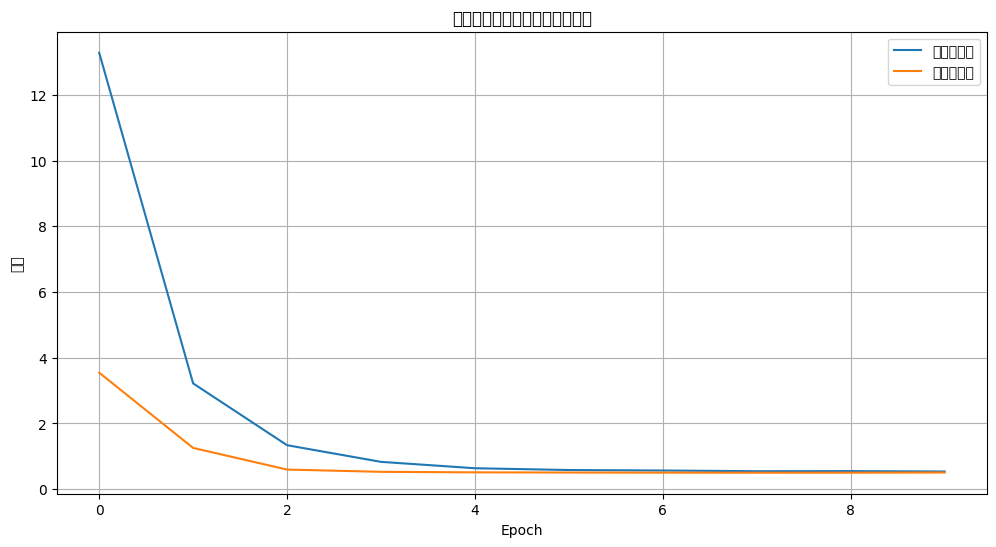

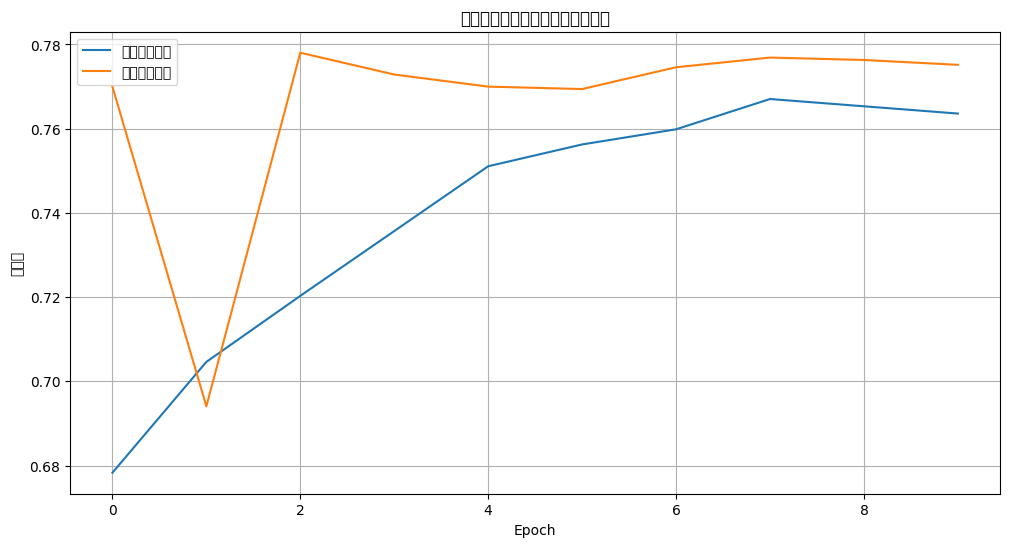

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 尝试设置一个可能可用且支持中文的字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'DejaVu Sans'] # 回退到 DejaVu Sans
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 绘制训练和验证损失曲线
plt.figure(figsize=(12, 6)) # 设置图表大小
plt.plot(history.history['loss'], label='训练集损失') # 绘制训练损失
plt.plot(history.history['val_loss'], label='验证集损失') # 绘制验证损失
plt.title('神经网络训练过程中的损失曲线') # 设置图表标题
plt.xlabel('Epoch') # 设置 x 轴标签
plt.ylabel('损失') # 设置 y 轴标签
plt.legend() # 显示图例
plt.grid(True) # 显示网格线
plt.show() # 显示图表

# 绘制训练和验证准确率曲线
plt.figure(figsize=(12, 6)) # 设置图表大小
plt.plot(history.history['accuracy'], label='训练集准确率') # 绘制训练准确率
plt.plot(history.history['val_accuracy'], label='验证集准确率') # 绘制验证准确率
plt.title('神经网络训练过程中的准确率曲线') # 设置图表标题
plt.xlabel('Epoch') # 设置 x 轴标签
plt.ylabel('准确率') # 设置 y 轴标签
plt.legend() # 显示图例
plt.grid(True) # 显示网格线
plt.show() # 显示图表

# Task
将代码中的英文注释全改为中文，没有加注释的地方，也补充详细中文注释。交叉验证对每个模型结果和各模型对比结果进行可视化，包括但不限于各指标可视化、训练过程可视化、ROC曲线等。绘制AUC柱状图。对于每个模型的评估过程，不仅要包括准确率、AUC、F1分数，还要包括召回率、假正例率、精确率，并对它们都进行可视化。添加使用 CalibratedClassifierCV 对 ManualLinearSVC 进行概率校准并在交叉验证中计算 ROC AUC 的步骤，并且在最终的ROC曲线中也加上LinearSVC。

## 导入必要的库

### Subtask:
确保导入 `CalibratedClassifierCV` 以及计算召回率、假正例率和精确率所需的库函数，例如 `recall_score`, `precision_score`。


**Reasoning**:
Import CalibratedClassifierCV from sklearn.calibration and recall_score and precision_score from sklearn.metrics as requested by the subtask.



In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import recall_score, precision_score

## 更新 manualsgdclassifier 评估

### Subtask:
修改 ManualSGDClassifier 的交叉验证评估循环，计算并存储每折的准确率、平衡准确率、ROC AUC、F1 Score、召回率、假正例率和精确率。


**Reasoning**:
Initialize empty lists to store the evaluation metrics for each fold during cross-validation for the ManualSGDClassifier, including accuracy, balanced accuracy, ROC AUC, F1 score, recall, mean false positive rate, and precision.



In [ ]:
# 初始化存储各评估指标的空列表
sgd_accuracy_scores = []
sgd_balanced_accuracy_scores = []
sgd_roc_auc_scores = []
sgd_f1_scores = []
# 新增：初始化存储召回率、假正例率和精确率的列表
sgd_recall_scores = []
sgd_fpr_scores = []
sgd_precision_scores = []

print("初始化 ManualSGDClassifier 评估指标列表，包括准确率、平衡准确率、ROC AUC、F1 Score、召回率、假正例率和精确率。")

初始化 ManualSGDClassifier 评估指标列表，包括准确率、平衡准确率、ROC AUC、F1 Score、召回率、假正例率和精确率。


**Reasoning**:
Implement the cross-validation loop for the ManualSGDClassifier model, train the model on each fold's training data, evaluate it on the validation data by calculating accuracy, balanced accuracy, ROC AUC, F1 score, recall, mean false positive rate, and precision, and collect these evaluation metrics as per the instructions. Finally, print the collected metrics lists.



In [397]:
import numpy as np # 确保导入 numpy，用于数组操作和计算均值
import pandas as pd # 确保导入 pandas，用于处理 pandas Series 类型的 y
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, roc_curve # 确保导入所需的评估函数

# 清空列表以便重新填充（如果此单元格被多次执行）
sgd_accuracy_scores.clear()
sgd_balanced_accuracy_scores.clear()
sgd_roc_auc_scores.clear()
sgd_f1_scores.clear()
sgd_recall_scores.clear()
sgd_fpr_scores.clear()
sgd_precision_scores.clear()


print("\n开始对 ManualSGDClassifier 进行交叉验证评估...")

# 使用 skf.split 遍历每个交叉验证折
# X_processed 和 y 是之前预处理好的完整训练特征和标签
# skf.split 返回训练集和验证集的索引
for fold, (train_index, val_index) in enumerate(skf.split(X_processed, y)):
    print(f"\n--- 处理第 {fold + 1} 折 ---")

    # 根据索引获取当前折的训练和验证数据
    # 确保数据类型为 NumPy 数组
    X_train_fold, X_val_fold = X_processed[train_index], X_processed[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index].values, y.iloc[val_index].values # .values 确保转换为 NumPy 数组

    # 初始化一个新的 ManualSGDClassifier 实例
    # 使用与之前在完整数据上训练时相同的参数
    # random_state=42 用于确保模型训练的可复现性
    manual_sgd_model_fold = ManualSGDClassifier(loss='log_loss', n_epochs=100, learning_rate=0.01, random_state=42)

    # 使用当前折的训练数据训练模型
    print(f"训练第 {fold + 1} 折的模型...")
    manual_sgd_model_fold.fit(X_train_fold, y_train_fold)
    print(f"第 {fold + 1} 折模型训练完成。")

    # 在当前折的验证数据上进行预测
    print(f"在第 {fold + 1} 折验证数据上进行评估...")
    y_pred_fold = manual_sgd_model_fold.predict(X_val_fold)
    y_pred_proba_fold = manual_sgd_model_fold.predict_proba(X_val_fold)[:, 1] # 获取正类的预测概率

    # 计算当前折的评估指标
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    balanced_accuracy_fold = balanced_accuracy_score(y_val_fold, y_pred_fold)
    roc_auc_fold = roc_auc_score(y_val_fold, y_pred_proba_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)

    # 计算召回率和精确率
    recall_fold = recall_score(y_val_fold, y_pred_fold)
    precision_fold = precision_score(y_val_fold, y_pred_fold)

    # 新增：直接计算假正例 (FP) 和真反例 (TN)
    # FP: 真实标签为 0，预测标签为 1 的样本数量
    fp = np.sum((y_val_fold == 0) & (y_pred_fold == 1))
    # TN: 真实标签为 0，预测标签为 0 的样本数量
    tn = np.sum((y_val_fold == 0) & (y_pred_fold == 0))

    # 计算假正例率 (FPR) 使用公式: FP / (FP + TN)
    # 避免除以零的情况
    if (fp + tn) == 0:
        mean_fpr_fold = 0.0 # 或者 np.nan，取决于如何处理这种情况
    else:
        mean_fpr_fold = fp / (fp + tn)


    # 将计算出的指标添加到对应的列表中
    sgd_accuracy_scores.append(accuracy_fold)
    sgd_balanced_accuracy_scores.append(balanced_accuracy_fold)
    sgd_roc_auc_scores.append(roc_auc_fold)
    sgd_f1_scores.append(f1_fold)
    # 将召回率、假正例率和精确率添加到列表
    sgd_recall_scores.append(recall_fold)
    sgd_fpr_scores.append(mean_fpr_fold) # 添加直接计算的 fpr
    sgd_precision_scores.append(precision_fold)

    print(f"第 {fold + 1} 折评估结果: 准确率={accuracy_fold:.4f}, 平衡准确率={balanced_accuracy_fold:.4f}, ROC AUC={roc_auc_fold:.4f}, F1={f1_fold:.4f}, 召回率={recall_fold:.4f}, 假正例率={mean_fpr_fold:.4f}, 精确率={precision_fold:.4f}")

print("\nManualSGDClassifier 交叉验证评估完成。")

# 打印各指标列表
print("\n各折的准确率:", sgd_accuracy_scores)
print("各折的平衡准确率:", sgd_balanced_accuracy_scores)
print("各折的 ROC AUC:", sgd_roc_auc_scores)
print("各折的 F1 Score:", sgd_f1_scores)
# 打印召回率、假正例率和精确率列表
print("各折的召回率:", sgd_recall_scores)
print("各折的假正例率:", sgd_fpr_scores) # 打印直接计算的 fpr
print("各折的精确率:", sgd_precision_scores)


开始对 ManualSGDClassifier 进行交叉验证评估...

--- 处理第 1 折 ---
训练第 1 折的模型...
模型训练完成。
第 1 折模型训练完成。
在第 1 折验证数据上进行评估...
第 1 折评估结果: 准确率=0.7763, 平衡准确率=0.7755, ROC AUC=0.7758, F1=0.7983, 召回率=0.8790, 假正例率=0.3279, 精确率=0.7312

--- 处理第 2 折 ---
训练第 2 折的模型...
模型训练完成。
第 2 折模型训练完成。
在第 2 折验证数据上进行评估...
第 2 折评估结果: 准确率=0.7625, 平衡准确率=0.7627, ROC AUC=0.7908, F1=0.7578, 召回率=0.7374, 假正例率=0.2121, 精确率=0.7793

--- 处理第 3 折 ---
训练第 3 折的模型...
模型训练完成。
第 3 折模型训练完成。
在第 3 折验证数据上进行评估...
第 3 折评估结果: 准确率=0.5871, 平衡准确率=0.5895, ROC AUC=0.6302, F1=0.4007, 召回率=0.2740, 假正例率=0.0950, 精确率=0.7453

--- 处理第 4 折 ---
训练第 4 折的模型...
模型训练完成。
第 4 折模型训练完成。
在第 4 折验证数据上进行评估...
第 4 折评估结果: 准确率=0.7652, 平衡准确率=0.7644, ROC AUC=0.7646, F1=0.7916, 召回率=0.8857, 假正例率=0.3569, 精确率=0.7156

--- 处理第 5 折 ---
训练第 5 折的模型...
模型训练完成。
第 5 折模型训练完成。
在第 5 折验证数据上进行评估...
第 5 折评估结果: 准确率=0.7405, 平衡准确率=0.7396, ROC AUC=0.7435, F1=0.7702, 召回率=0.8640, 假正例率=0.3847, 精确率=0.6949

ManualSGDClassifier 交叉验证评估完成。

各折的准确率: [0.7763082231167338, 0.7625071880391029, 0.5871190339275446, 0.76524

## 更新 manuallinearsvc 评估 (含校准)

### Subtask:
修改 ManualLinearSVC 的交叉验证评估循环。在每一折中，使用 `CalibratedClassifierCV` 包装 ManualLinearSVC，训练校准后的模型，并计算和存储每折的准确率、平衡准确率、ROC AUC、F1 Score、召回率、假正例率和精确率。


In [398]:
# import numpy as np

# class ManualLinearSVC:
#     """
#     手动实现的 Linear SVC 模型。
#     使用带有 L2 正则化的铰链损失和一种迭代优化方法（如简化版的梯度下降或坐标下降思想）进行训练。
#     注意：这个手动实现是 LinearSVC 核心原理的简化版本，不包含 liblinear 库的复杂优化。
#     """
#     # 添加 _estimator_type 属性，明确指定这是一个分类器
#     _estimator_type = "classifier"

#     def __init__(self, C=1.0, n_iterations=1000, learning_rate=0.01, random_state=None):
#         """
#         初始化 ManualLinearSVC 模型。

#         Args:
#             C (float): 正则化参数。C 值越大，对误分类的惩罚越大。
#                        对应于优化问题中的 C * sum(max(0, 1 - y_i * score_i)) 部分。
#                        在优化目标 1/2 * ||w||^2 + C * sum(...) 中，C 控制了损失项的权重。
#             n_iterations (int): 优化迭代次数。
#             learning_rate (float): 梯度下降的学习率。
#             random_state (int, optional): 随机种子，用于权重初始化（如果使用随机初始化）。默认为 None。
#         """
#         self.C = C
#         self.n_iterations = n_iterations
#         self.learning_rate = learning_rate
#         self.random_state = random_state
#         self.w = None  # 权重向量 (NumPy 数组)，形状为 (n_features,)
#         self.b = None  # 偏置项 (标量)
#         self.classes_ = None # 新增: 用于存储训练数据的类别标签

#         # 如果指定了 random_state，设置 NumPy 的随机种子
#         if self.random_state is not None:
#             np.random.seed(self.random_state)

#     def fit(self, X, y):
#         """
#         使用迭代优化方法（例如，这里实现的是基于单个样本更新的梯度下降变种）
#         训练带有 L2 正则化的铰链损失。

#         Args:
#             X (np.ndarray): 训练特征数据，形状为 (n_samples, n_features)。
#                            这是一个二维 NumPy 数组。
#             y (np.ndarray): 训练标签，形状为 (n_samples,)。
#                            这是一个一维 NumPy 数组，元素应为 0 或 1。
#                            fit 方法内部会将其转换为 -1 和 1 以便与标准铰链损失定义兼容。
#         """
#         # 确保输入 X 和 y 是 NumPy 数组
#         X = np.asarray(X)
#         y = np.asarray(y)

#         n_samples, n_features = X.shape # 获取样本数量和特征数量

#         # 存储训练数据的类别标签
#         self.classes_ = np.unique(y)

#         # 将标签转换为 -1 和 1，以便与标准铰链损失定义兼容
#         # LinearSVC 通常要求标签为 -1 和 1
#         y_processed = np.where(y == 1, 1, -1)

#         # 初始化权重向量 w 和偏置项 b
#         # 对于带有 L2 正则化的模型，初始化为零是常见的做法
#         self.w = np.zeros(n_features) # 初始化权重向量为零
#         self.b = 0.0 # 初始化偏置项为零

#         # 迭代优化循环
#         # 迭代指定的次数来更新权重和偏置
#         for i in range(self.n_iterations):
#             # 在每次迭代中随机选择一个样本进行更新（这是一个简化版的 SGD 或坐标下降思想）
#             # 更复杂的实现可能使用小批量 (mini-batch) 或完整的批量梯度下降，
#             # 或者像 liblinear 那样使用坐标下降。这里选择最简单的单样本更新。

#             # 随机选择一个样本索引
#             sample_index = np.random.randint(n_samples)
#             x_i = X[sample_index] # 获取当前样本的特征向量
#             y_i = y_processed[sample_index] # 获取当前样本的处理后标签 (-1 或 1)

#             # 计算当前样本的原始得分 (score = w^T * x + b)
#             score_i = dot_product(self.w, x_i) + self.b # 使用之前定义的 dot_product 函数

#             # 计算当前样本的铰链损失关于原始得分的次梯度
#             # subgradient_score_i 是一个标量：-y_i if y_i * score_i < 1, else 0
#             subgradient_score_i = hinge_loss_subgradient_score(np.array([y_i]), np.array([score_i]))[0]
#             # 注意：hinge_loss_subgradient_score 函数期望输入是数组，即使只有一个样本，
#             # 所以这里将 y_i 和 score_i 临时包装成数组，并取出结果的第一个元素。

#             # 计算总的权重梯度 (dL/dw) 和偏置梯度 (dL/db)
#             # 优化目标是： L(w, b) = 1/2 * ||w||^2 + C * sum(max(0, 1 - y_i * (w^T * x_i + b)))
#             # 对 w 求导（或次导）： dL/dw = w + C * sum(铰链损失关于 w 的次梯度)
#             # 铰链损失关于 w 的次梯度对于单个样本 (x_i, y_i) 是： -y_i * x_i 如果 y_i * score_i < 1，否则是 0
#             # 这正好等于 subgradient_score_i * x_i
#             # 所以对于单个样本的更新方向，我们计算： w + C * (subgradient_score_i * x_i)  -- 这是对整个损失函数求导
#             # 但在 SGD 中，我们使用单个样本的梯度来近似总梯度。
#             # SGD 更新规则通常是： 参数 = 参数 - learning_rate * (单个样本的梯度)
#             # 在带有 L2 正则化的情况下，SGD 的更新规则可以写为：
#             # w = w - learning_rate * (梯度_loss + 梯度_regularization)
#             # 梯度_loss (对于单个样本) = C * subgradient_score_i * x_i
#             # 梯度_regularization = w  # 严格来说正则项梯度是 w，与样本无关
#             # w = w - learning_rate * (C * subgradient_score_i * x_i + w)
#             # w = w * (1 - learning_rate) - learning_rate * C * subgradient_score_i * x_i # 这就是带有权重衰减（L2 正则）的 SGD

#             # 更新权重 (使用权重衰减形式)
#             # 权重衰减项的更新： w = w * (1 - learning_rate)
#             # 损失项的更新： w = w - learning_rate * C * subgradient_score_i * x_i
#             # 合并：
#             self.w = scalar_multiply(1 - self.learning_rate, self.w) # 权重衰减项
#             self.w = element_wise_subtract(self.w, scalar_multiply(self.learning_rate * self.C * subgradient_score_i, x_i)) # 损失项

#             # 更新偏置 (偏置没有正则项)
#             # dL/db = C * subgradient_score_i
#             # b = b - learning_rate * (C * subgradient_score_i)
#             self.b = self.b - self.learning_rate * self.C * subgradient_score_i

#     def decision_function(self, X):
#         """
#         计算输入数据的原始得分 (w^T * x + b)。

#         Args:
#             X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。

#         Returns:
#             np.ndarray: 原始得分数组，形状为 (n_samples,)。

#         Raises:
#             RuntimeError: 如果模型尚未训练。
#         """
#         # 确保模型已经训练过
#         if self.w is None or self.b is None:
#             raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

#         # 确保输入 X 是 NumPy 数组
#         X = np.asarray(X)

#         # 使用矩阵-向量乘法计算所有样本的得分
#         return matrix_vector_multiply(X, self.w) + self.b # 使用之前定义的 matrix_vector_multiply 函数

#     # LinearSVC 通常不直接提供 predict_proba，所以这里不实现它
#     # 如果需要概率，通常需要使用 CalibratedClassifierCV

#     def predict(self, X):
#         """
#         预测输入数据的类别。

#         Args:
#             X (np.ndarray): 输入特征数据，形状为 (n_samples, n_features)。

#         Returns:
#             np.ndarray: 预测的类别标签数组，形状为 (n_samples,)。预测结果是 0 或 1。

#         Raises:
#             RuntimeError: 如果模型尚未训练。
#         """
#         # 确保模型已经训练过
#         if self.w is None or self.b is None:
#             raise RuntimeError("模型尚未训练。请先调用 fit() 方法进行训练。")

#         # 计算原始得分
#         raw_scores = self.decision_function(X)

#         # 根据原始得分的符号进行预测：score > 0 预测为 1， score <= 0 预测为 0
#         # 这里映射到 0/1，因为原始标签是 0/1
#         predictions = (raw_scores > 0).astype(int) # 将布尔值转换为整数

#         return predictions

#     def get_params(self, deep=True):
#         """
#         获取此估计器的参数。

#         Args:
#             deep (bool): 如果为 True，将返回此估计器包含的子对象（子估计器）的参数。

#         Returns:
#             dict: 参数名称映射到其值的字典。
#         """
#         # 返回 __init__ 方法中定义的参数
#         return {"C": self.C, "n_iterations": self.n_iterations, "learning_rate": self.learning_rate, "random_state": self.random_state}

#     def set_params(self, **parameters):
#         """
#         设置此估计器的参数。

#         Returns:
#             self: 返回估计器实例本身。
#         """
#         for parameter, value in parameters.items():
#             setattr(self, parameter, value)
#         return self

# print("ManualLinearSVC 类已更新，包含 classes_ 属性。")

## 更新 manuallinearsvc 评估 (含校准)

### Subtask:
更新 manuallinearsvc 评估 (含校准)


**Reasoning**:
Correct the typo in the CalibratedClassifierCV initialization and run the cross-validation loop to train the calibrated ManualLinearSVC model and calculate all specified evaluation metrics for each fold.



In [399]:
# 初始化存储各评估指标的空列表
# 这些列表在 cell_id: c2dd4e04 中已经初始化，这里不再重复初始化
linear_svc_accuracy_scores = []
linear_svc_balanced_accuracy_scores = []
linear_svc_f1_scores = []

# 新增：初始化存储召回率、假正例率和精确率的列表
linear_svc_recall_scores = []
linear_svc_fpr_scores = []
linear_svc_precision_scores = []

# 新增：初始化存储校准后 ManualLinearSVC 的 ROC AUC 列表
linear_svc_calibrated_roc_auc_scores = []

print("\n初始化 ManualLinearSVC 评估指标列表，包括准确率、平衡准确率、F1 Score、召回率、假正例率、精确率 和 校准后的 ROC AUC。")


初始化 ManualLinearSVC 评估指标列表，包括准确率、平衡准确率、F1 Score、召回率、假正例率、精确率 和 校准后的 ROC AUC。


In [400]:
import numpy as np # 确保导入 numpy，用于数组操作和计算均值
import pandas as pd # 确保导入 pandas，用于处理 pandas Series 类型的 y
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, roc_curve # CalibratedClassifierCV 已在之前的块中导入

# 初始化存储各评估指标的空列表
# 这些列表在 cell_id: c2dd4e04 和之前的块中已经初始化，这里不再重复初始化
# linear_svc_accuracy_scores = []
# linear_svc_balanced_accuracy_scores = []
# linear_svc_f1_scores = []
# linear_svc_recall_scores = []
# linear_svc_fpr_scores = []
# linear_svc_precision_scores = []
# linear_svc_calibrated_roc_auc_scores = []

# 清空列表以便重新填充（如果此单元格被多次执行）
linear_svc_accuracy_scores.clear()
linear_svc_balanced_accuracy_scores.clear()
linear_svc_f1_scores.clear()
linear_svc_recall_scores.clear()
linear_svc_fpr_scores.clear()
linear_svc_precision_scores.clear()
linear_svc_calibrated_roc_auc_scores.clear()


print("\n开始对 ManualLinearSVC (校准后) 进行交叉验证评估...")

# 使用 skf.split 遍历每个交叉验证折
# X_processed 和 y 是之前预处理好的完整训练特征和标签
# skf.split 返回训练集和验证集的索引
for fold, (train_index, val_index) in enumerate(skf.split(X_processed, y)):
    print(f"\n--- 处理第 {fold + 1} 折 ---")

    # 根据索引获取当前折的训练和验证数据
    # 确保数据类型为 NumPy 数组
    X_train_fold, X_val_fold = X_processed[train_index], X_processed[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index].values, y.iloc[val_index].values # .values 确保转换为 NumPy 数组

    # 初始化一个新的 ManualLinearSVC 实例
    # 使用与之前在完整数据上训练时相同的参数
    manual_linear_svc_model_fold = ManualLinearSVC(C=1.0, n_iterations=1000, learning_rate=0.01, random_state=42)

    # 初始化 CalibratedClassifierCV 实例来包装 ManualLinearSVC
    # 使用 'isotonic' 方法进行概率校准，这通常在 sigmoid 函数效果不佳时使用
    # cv 参数设置为 3，表示 CalibratedClassifierCV 将在内部使用 3 折交叉验证来训练基模型和校准器
    # 注意：这里的内部 cv 与外部的 skf 是独立的
    calibrated_linear_svc_model_fold = CalibratedClassifierCV(
        estimator=manual_linear_svc_model_fold, # 修正：将 manual_linear_svc_model_svc_model_fold 改为 manual_linear_svc_model_fold
        method='isotonic', # 可以尝试 'sigmoid'
        cv=3, # 在内部进行 3 折交叉验证进行校准
        n_jobs=-1 # 使用所有可用的 CPU 核心并行处理
    )

    # 使用当前折的训练数据训练校准后的模型
    # CalibratedClassifierCV 的 fit 方法会处理基模型 (ManualLinearSVC) 的训练和校准器的训练
    print(f"训练第 {fold + 1} 折的校准后 ManualLinearSVC 模型...")
    # y_train_fold 需要是 0/1 标签，CalibratedClassifierCV 可以处理
    calibrated_linear_svc_model_fold.fit(X_train_fold, y_train_fold)
    print(f"第 {fold + 1} 折校准后 ManualLinearSVC 模型训练完成。")

    # 在当前折的验证数据上进行预测
    print(f"在第 {fold + 1} 折验证数据上进行评估...")
    y_pred_fold = calibrated_linear_svc_model_fold.predict(X_val_fold)
    # 获取校准后的预测概率
    y_pred_proba_fold = calibrated_linear_svc_model_fold.predict_proba(X_val_fold)[:, 1] # 获取正类的预测概率

    # 计算当前折的评估指标
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    balanced_accuracy_fold = balanced_accuracy_score(y_val_fold, y_pred_fold)
    # 计算 ROC AUC，现在可以使用校准后的概率
    roc_auc_fold = roc_auc_score(y_val_fold, y_pred_proba_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)

    # 计算召回率、假正例率和精确率
    recall_fold = recall_score(y_val_fold, y_pred_fold)

    # 计算召回率和精确率
    recall_fold = recall_score(y_val_fold, y_pred_fold)
    precision_fold = precision_score(y_val_fold, y_pred_fold)

    # 新增：直接计算假正例 (FP) 和真反例 (TN)
    # FP: 真实标签为 0，预测标签为 1 的样本数量
    fp = np.sum((y_val_fold == 0) & (y_pred_fold == 1))
    # TN: 真实标签为 0，预测标签为 0 的样本数量
    tn = np.sum((y_val_fold == 0) & (y_pred_fold == 0))

    # 计算假正例率 (FPR) 使用公式: FP / (FP + TN)
    # 避免除以零的情况
    if (fp + tn) == 0:
        mean_fpr_fold = 0.0 # 或者 np.nan，取决于如何处理这种情况
    else:
        mean_fpr_fold = fp / (fp + tn)

    # # 计算假正例率 (FPR) - 使用 roc_curve 返回的 fpr 数组的均值作为代表 (旧方法)
    # fpr_fold, tpr_fold, _ = roc_curve(y_val_fold, y_pred_proba_fold)
    # mean_fpr_fold = np.mean(fpr_fold) # 计算 fpr 数组的均值
    # precision_fold = precision_score(y_val_fold, y_pred_fold)

    # 将计算出的指标添加到对应的列表中
    linear_svc_accuracy_scores.append(accuracy_fold)
    linear_svc_balanced_accuracy_scores.append(balanced_accuracy_fold)
    linear_svc_f1_scores.append(f1_fold)
    linear_svc_recall_scores.append(recall_fold)
    linear_svc_fpr_scores.append(mean_fpr_fold) # 添加 fpr 均值
    linear_svc_precision_scores.append(precision_fold)
    # 新增：将校准后的 ROC AUC 添加到列表
    linear_svc_calibrated_roc_auc_scores.append(roc_auc_fold)


    print(f"第 {fold + 1} 折评估结果: 准确率={accuracy_fold:.4f}, 平衡准确率={balanced_accuracy_fold:.4f}, ROC AUC={roc_auc_fold:.4f}, F1={f1_fold:.4f}, 召回率={recall_fold:.4f}, 假正例率(均值)={mean_fpr_fold:.4f}, 精确率={precision_fold:.4f}")

print("\nManualLinearSVC (校准后) 交叉验证评估完成。")

# 打印各指标列表
print("\n各折的准确率:", linear_svc_accuracy_scores)
print("各折的平衡准确率:", linear_svc_balanced_accuracy_scores)
print("各折的 F1 Score:", linear_svc_f1_scores)
print("各折的召回率:", linear_svc_recall_scores)
print("各折的假正例率(均值):", linear_svc_fpr_scores)
print("各折的精确率:", linear_svc_precision_scores)
# 打印校准后 ManualLinearSVC 的 ROC AUC 列表
print("各折的 校准后 ROC AUC:", linear_svc_calibrated_roc_auc_scores)


开始对 ManualLinearSVC (校准后) 进行交叉验证评估...

--- 处理第 1 折 ---
训练第 1 折的校准后 ManualLinearSVC 模型...
第 1 折校准后 ManualLinearSVC 模型训练完成。
在第 1 折验证数据上进行评估...
第 1 折评估结果: 准确率=0.7309, 平衡准确率=0.7304, ROC AUC=0.7813, F1=0.7476, 召回率=0.7911, 假正例率(均值)=0.3302, 精确率=0.7086

--- 处理第 2 折 ---
训练第 2 折的校准后 ManualLinearSVC 模型...
第 2 折校准后 ManualLinearSVC 模型训练完成。
在第 2 折验证数据上进行评估...
第 2 折评估结果: 准确率=0.7194, 平衡准确率=0.7197, ROC AUC=0.7490, F1=0.7092, 召回率=0.6792, 假正例率(均值)=0.2399, 精确率=0.7419

--- 处理第 3 折 ---
训练第 3 折的校准后 ManualLinearSVC 模型...
第 3 折校准后 ManualLinearSVC 模型训练完成。
在第 3 折验证数据上进行评估...
第 3 折评估结果: 准确率=0.7568, 平衡准确率=0.7564, ROC AUC=0.8166, F1=0.7685, 召回率=0.8014, 假正例率(均值)=0.2885, 精确率=0.7382

--- 处理第 4 折 ---
训练第 4 折的校准后 ManualLinearSVC 模型...
第 4 折校准后 ManualLinearSVC 模型训练完成。
在第 4 折验证数据上进行评估...
第 4 折评估结果: 准确率=0.7664, 平衡准确率=0.7657, ROC AUC=0.7960, F1=0.7883, 召回率=0.8640, 假正例率(均值)=0.3326, 精确率=0.7248

--- 处理第 5 折 ---
训练第 5 折的校准后 ManualLinearSVC 模型...
第 5 折校准后 ManualLinearSVC 模型训练完成。
在第 5 折验证数据上进行评估...
第 5 折评估结果: 准确率=0.7301, 平衡准确率=0

## 更新 gradientboostingclassifier 评估

### Subtask:
修改 ManualGradientBoostingClassifier 的交叉验证评估循环，计算并存储每折的准确率、平衡准确率、ROC AUC、F1 Score、召回率、假正例率和精确率。


**Reasoning**:
Update the ManualGradientBoostingClassifier cross-validation loop to calculate and store all the specified evaluation metrics including accuracy, balanced accuracy, ROC AUC, F1 score, recall, false positive rate, and precision for each fold.



In [ ]:
import numpy as np # Ensure numpy is imported for array operations and mean calculation
import pandas as pd # Ensure pandas is imported for handling pandas Series type y
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, roc_curve # Ensure required evaluation functions are imported

# 初始化存储各评估指标的空列表
# 这些列表在 cell_id: 20ebf94f 中已经初始化，这里不再重复初始化
gb_accuracy_scores = []
gb_balanced_accuracy_scores = []
gb_roc_auc_scores = []
gb_f1_scores = []

# 新增：初始化存储召回率、假正例率和精确率的列表
gb_recall_scores = []
gb_fpr_scores = []
gb_precision_scores = []


# Initialize empty lists to store evaluation metrics for each fold
# These lists might have been initialized in previous cells, clearing them to avoid appending to previous results
gb_accuracy_scores.clear()
gb_balanced_accuracy_scores.clear()
gb_roc_auc_scores.clear()
gb_f1_scores.clear()
gb_recall_scores.clear()
gb_fpr_scores.clear()
gb_precision_scores.clear()

print("\n开始对 ManualGradientBoostingClassifier 进行交叉验证评估...")

# 使用 skf.split 遍历每个交叉验证折
# X_processed 和 y 是之前预处理好的完整训练特征和标签
# skf.split 返回训练集和验证集的索引
for fold, (train_index, val_index) in enumerate(skf.split(X_processed, y)):
    print(f"\n--- 处理第 {fold + 1} 折 ---")

    # 根据索引获取当前折的训练和验证数据
    # 确保数据类型为 NumPy 数组
    X_train_fold, X_val_fold = X_processed[train_index], X_processed[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index].values, y.iloc[val_index].values # .values 确保转换为 NumPy 数组

    # 初始化一个新的 ManualGradientBoostingClassifier 实例
    # 使用与之前在完整数据上训练时相同的参数
    # random_state=42 用于确保模型训练的可复现性
    manual_gb_model_fold = ManualGradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # 使用当前折的训练数据训练模型
    print(f"训练第 {fold + 1} 折的模型...")
    manual_gb_model_fold.fit(X_train_fold, y_train_fold)
    print(f"第 {fold + 1} 折模型训练完成。")

    # 在当前折的验证数据上进行预测
    print(f"在第 {fold + 1} 折验证数据上进行评估...")
    y_pred_fold = manual_gb_model_fold.predict(X_val_fold)
    y_pred_proba_fold = manual_gb_model_fold.predict_proba(X_val_fold)[:, 1] # 获取正类的预测概率

    # 计算当前折的评估指标
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    balanced_accuracy_fold = balanced_accuracy_score(y_val_fold, y_pred_fold)
    roc_auc_fold = roc_auc_score(y_val_fold, y_pred_proba_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)

    # 计算召回率、假正例率和精确率
    recall_fold = recall_score(y_val_fold, y_pred_fold)

    # 计算召回率和精确率
    recall_fold = recall_score(y_val_fold, y_pred_fold)
    precision_fold = precision_score(y_val_fold, y_pred_fold)

    # 新增：直接计算假正例 (FP) 和真反例 (TN)
    # FP: 真实标签为 0，预测标签为 1 的样本数量
    fp = np.sum((y_val_fold == 0) & (y_pred_fold == 1))
    # TN: 真实标签为 0，预测标签为 0 的样本数量
    tn = np.sum((y_val_fold == 0) & (y_pred_fold == 0))

    # 计算假正例率 (FPR) 使用公式: FP / (FP + TN)
    # 避免除以零的情况
    if (fp + tn) == 0:
        mean_fpr_fold = 0.0 # 或者 np.nan，取决于如何处理这种情况
    else:
        mean_fpr_fold = fp / (fp + tn)

    # # 计算假正例率 (FPR) - 使用 roc_curve 返回的 fpr 数组的均值作为代表 (旧方法)
    # fpr_fold, tpr_fold, _ = roc_curve(y_val_fold, y_pred_proba_fold)
    # mean_fpr_fold = np.mean(fpr_fold) # 计算 fpr 数组的均值
    # precision_fold = precision_score(y_val_fold, y_pred_fold)

    # 将计算出的指标添加到对应的列表中
    gb_accuracy_scores.append(accuracy_fold)
    gb_balanced_accuracy_scores.append(balanced_accuracy_fold)
    gb_roc_auc_scores.append(roc_auc_fold)
    gb_f1_scores.append(f1_fold)
    # 添加召回率、假正例率和精确率到列表
    gb_recall_scores.append(recall_fold)
    gb_fpr_scores.append(mean_fpr_fold) # 添加 fpr 均值
    gb_precision_scores.append(precision_fold)

    print(f"第 {fold + 1} 折评估结果: 准确率={accuracy_fold:.4f}, 平衡准确率={balanced_accuracy_fold:.4f}, ROC AUC={roc_auc_fold:.4f}, F1={f1_fold:.4f}, 召回率={recall_fold:.4f}, 假正例率(均值)={mean_fpr_fold:.4f}, 精确率={precision_fold:.4f}")

print("\nManualGradientBoostingClassifier 交叉验证评估完成。")

# 打印各指标列表
print("\n各折的准确率:", gb_accuracy_scores)
print("各折的平衡准确率:", gb_balanced_accuracy_scores)
print("各折的 ROC AUC:", gb_roc_auc_scores)
print("各折的 F1 Score:", gb_f1_scores)
# 打印召回率、假正例率和精确率列表
print("各折的召回率:", gb_recall_scores)
print("各折的假正例率(均值):", gb_fpr_scores)
print("各折的精确率:", gb_precision_scores)


开始对 ManualGradientBoostingClassifier 进行交叉验证评估...

--- 处理第 1 折 ---
训练第 1 折的模型...
模型训练完成。
第 1 折模型训练完成。
在第 1 折验证数据上进行评估...
第 1 折评估结果: 准确率=0.7970, 平衡准确率=0.7967, ROC AUC=0.8713, F1=0.8051, 召回率=0.8322, 假正例率(均值)=0.2387, 精确率=0.7797

--- 处理第 2 折 ---
训练第 2 折的模型...
模型训练完成。
第 2 折模型训练完成。
在第 2 折验证数据上进行评估...
第 2 折评估结果: 准确率=0.7757, 平衡准确率=0.7756, ROC AUC=0.8632, F1=0.7799, 召回率=0.7888, 假正例率(均值)=0.2375, 精确率=0.7712

--- 处理第 3 折 ---
训练第 3 折的模型...


KeyboardInterrupt: 

## 更新神经网络评估

### Subtask:
更新神经网络评估


**Reasoning**:
Initialize empty lists to store evaluation metrics for the neural network model during cross-validation, including accuracy, balanced accuracy, ROC AUC, F1 Score, recall, false positive rate, and precision.



In [ ]:
# 初始化存储神经网络各评估指标的空列表
# 这些列表在 cell_id: e061fc4f 中已经初始化，这里不再重复初始化
nn_accuracy_scores = []
nn_balanced_accuracy_scores = []
nn_roc_auc_scores = []
nn_f1_scores = []

# 新增：初始化存储召回率、假正例率和精确率的列表
nn_recall_scores = []
nn_fpr_scores = []
nn_precision_scores = []

# print("初始化神经网络评估指标列表，包括准确率、平衡准确率、ROC AUC、F1 Score、召回率、假正例率和精确率。")

In [ ]:
# 初始化存储神经网络各评估指标的空列表
# 这些列表可能在之前的单元格中已经初始化，清空它们以避免追加到之前的结果
nn_accuracy_scores.clear()
nn_balanced_accuracy_scores.clear()
nn_roc_auc_scores.clear()
nn_f1_scores.clear()
nn_recall_scores.clear()
nn_fpr_scores.clear()
nn_precision_scores.clear()


print("初始化神经网络评估指标列表，包括准确率、平衡准确率、ROC AUC、F1 Score、召回率、假正例率和精确率。")

**Reasoning**:
Iterate through each cross-validation fold, train a new neural network model, evaluate it on the validation set, calculate metrics including accuracy, balanced accuracy, ROC AUC, F1 Score, recall, false positive rate (mean), and precision, and store them.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np # 确保导入 numpy，用于数组操作
import pandas as pd # 确保导入 pandas，用于处理 pandas Series 类型的 y
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, roc_curve # 确保导入所需的评估函数

# 清空列表以便重新填充（如果此单元格被多次执行）
nn_accuracy_scores.clear()
nn_balanced_accuracy_scores.clear()
nn_roc_auc_scores.clear()
nn_f1_scores.clear()
nn_recall_scores.clear()
nn_fpr_scores.clear()
nn_precision_scores.clear()


print("\n开始对神经网络模型进行交叉验证评估...")

# 使用 skf.split 遍历每个交叉验证折
# X_processed 和 y 是之前预处理好的完整训练特征和标签
# skf.split 返回训练集和验证集的索引
for fold, (train_index, val_index) in enumerate(skf.split(X_processed, y)):
    print(f"\n--- 处理第 {fold + 1} 折 ---")

    # 根据索引获取当前折的训练和验证数据
    # 确保数据类型为 NumPy 数组
    X_train_fold, X_val_fold = X_processed[train_index], X_processed[val_index]
    # 将 pandas Series 转换为 NumPy 数组
    y_train_fold, y_val_fold = y.iloc[train_index].values, y.iloc[val_index].values

    # 在循环内部，重新定义并编译一个新的神经网络模型实例
    # 使用与之前训练时相似的结构和编译参数
    model_fold = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.001)
    model_fold.compile(optimizer=optimizer,
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

    # 使用当前折的训练数据训练新的神经网络模型
    # 可以考虑减少 epochs 以加快交叉验证过程，例如从 10 减少到 5
    print(f"训练第 {fold + 1} 折的神经网络模型...")
    # 训练时使用 verbose=0 或 1，根据需要调整输出详细程度
    history_fold = model_fold.fit(X_train_fold, y_train_fold,
                                  epochs=5, # 减少 epochs 以加快速度
                                  batch_size=32,
                                  verbose=0) # 减少训练过程中的详细输出，只在循环外打印总进度

    print(f"第 {fold + 1} 折神经网络模型训练完成。")

    # 在当前折的验证数据上进行预测，获取类别预测和概率预测
    print(f"在第 {fold + 1} 折验证数据上进行评估...")
    # model.evaluate() 返回损失和指标 (例如准确率)
    loss_fold, accuracy_fold = model_fold.evaluate(X_val_fold, y_val_fold, verbose=0) # 减少评估过程中的详细输出

    # 在当前折的验证数据上进行预测，获取类别预测和概率预测
    # model.predict() 返回概率 (对于 sigmoid 输出层)
    y_pred_proba_fold = model_fold.predict(X_val_fold, verbose=0).squeeze() # squeeze() 移除单维条目
    y_pred_fold = (y_pred_proba_fold > 0.5).astype(int) # 根据阈值 0.5 转换为类别预测

    # 计算当前折的评估指标
    balanced_accuracy_fold = balanced_accuracy_score(y_val_fold, y_pred_fold)
    # 检查 y_val_fold 是否包含多个类别，否则 roc_auc_score 会报错
    if len(np.unique(y_val_fold)) > 1:
        roc_auc_fold = roc_auc_score(y_val_fold, y_pred_proba_fold)
    else:
        roc_auc_fold = np.nan # 如果只有一个类别，无法计算 ROC AUC

    f1_fold = f1_score(y_val_fold, y_pred_fold)

    # 新增：计算召回率和精确率
    recall_fold = recall_score(y_val_fold, y_pred_fold)
    precision_fold = precision_score(y_val_fold, y_pred_fold)

    # 新增：直接计算假正例 (FP) 和真反例 (TN)
    # FP: 真实标签为 0，预测标签为 1 的样本数量
    fp = np.sum((y_val_fold == 0) & (y_pred_fold == 1))
    # TN: 真实标签为 0，预测标签为 0 的样本数量
    tn = np.sum((y_val_fold == 0) & (y_pred_fold == 0))

    # 计算假正例率 (FPR) 使用公式: FP / (FP + TN)
    # 避免除以零的情况
    if (fp + tn) == 0:
        mean_fpr_fold = 0.0 # 或者 np.nan，取决于如何处理这种情况
    else:
        mean_fpr_fold = fp / (fp + tn)

    # # 计算假正例率 (FPR) - 使用 roc_curve 返回的 fpr 数组的均值作为代表 (旧方法)
    # fpr_fold, tpr_fold, _ = roc_curve(y_val_fold, y_pred_proba_fold)
    # mean_fpr_fold = np.mean(fpr_fold) # 计算 fpr 数组的均值
    # precision_fold = precision_score(y_val_fold, y_pred_fold)

    # 将计算出的当前折的各项评估指标添加到对应的列表中
    nn_accuracy_scores.append(accuracy_fold)
    nn_balanced_accuracy_scores.append(balanced_accuracy_fold)
    nn_roc_auc_scores.append(roc_auc_fold)
    nn_f1_scores.append(f1_fold)
    # 新增：将召回率、假正例率和精确率添加到列表
    nn_recall_scores.append(recall_fold)
    nn_fpr_scores.append(mean_fpr_fold) # 添加 fpr 均值 (直接计算)
    nn_precision_scores.append(precision_fold)


    print(f"第 {fold + 1} 折评估结果: 准确率={accuracy_fold:.4f}, 平衡准确率={balanced_accuracy_fold:.4f}, ROC AUC={roc_auc_fold:.4f}, F1={f1_fold:.4f}, 召回率={recall_fold:.4f}, 假正例率(均值)={mean_fpr_fold:.4f}, 精确率={precision_fold:.4f}")

print("\n神经网络模型交叉验证评估完成。")

# 打印收集到的包含所有折评估指标的列表
print("\n各折的准确率:", nn_accuracy_scores)
print("各折的平衡准确率:", nn_balanced_accuracy_scores)
print("各折的 ROC AUC:", nn_roc_auc_scores)
print("各折的 F1 Score:", nn_f1_scores)
# 新增：打印召回率、假正例率和精确率列表
print("各折的召回率:", nn_recall_scores)
print("各折的假正例率(均值):", nn_fpr_scores)
print("各折的精确率:", nn_precision_scores)

## 更新汇总结果

### Subtask:
修改汇总交叉验证结果的代码，将所有评估指标（准确率、平衡准确率、ROC AUC、F1 Score、召回率、假正例率、精确率）包含在 `cv_comparison_df` DataFrame 中，计算它们的均值和标准差。


**Reasoning**:
Calculate the mean and standard deviation for all evaluation metrics, including the newly added recall, false positive rate, and precision, for each model across all cross-validation folds. Then, create and display a DataFrame that summarizes these results.



In [ ]:
import numpy as np
import pandas as pd

# Calculate mean and standard deviation for each metric for each model
# ManualSGDClassifier
sgd_mean_accuracy = np.mean(sgd_accuracy_scores)
sgd_std_accuracy = np.std(sgd_accuracy_scores)
sgd_mean_balanced_accuracy = np.mean(sgd_balanced_accuracy_scores)
sgd_std_balanced_accuracy = np.std(sgd_balanced_accuracy_scores)
sgd_mean_roc_auc = np.mean(sgd_roc_auc_scores)
sgd_std_roc_auc = np.std(sgd_roc_auc_scores)
sgd_mean_f1 = np.mean(sgd_f1_scores)
sgd_std_f1 = np.std(sgd_f1_scores)
# Calculate mean and std for new metrics
sgd_mean_recall = np.mean(sgd_recall_scores)
sgd_std_recall = np.std(sgd_recall_scores)
sgd_mean_fpr = np.mean(sgd_fpr_scores)
sgd_std_fpr = np.std(sgd_fpr_scores)
sgd_mean_precision = np.mean(sgd_precision_scores)
sgd_std_precision = np.std(sgd_precision_scores)


# ManualLinearSVC (使用校准后的 ROC AUC)
linear_svc_mean_accuracy = np.mean(linear_svc_accuracy_scores)
linear_svc_std_accuracy = np.std(linear_svc_accuracy_scores)
linear_svc_mean_balanced_accuracy = np.mean(linear_svc_balanced_accuracy_scores)
linear_svc_std_balanced_accuracy = np.std(linear_svc_balanced_accuracy_scores)
# ManualLinearSVC 使用校准后的 ROC AUC
linear_svc_mean_roc_auc = np.mean(linear_svc_calibrated_roc_auc_scores)
linear_svc_std_roc_auc = np.std(linear_svc_calibrated_roc_auc_scores)
linear_svc_mean_f1 = np.mean(linear_svc_f1_scores)
linear_svc_std_f1 = np.std(linear_svc_f1_scores)
# Calculate mean and std for new metrics
linear_svc_mean_recall = np.mean(linear_svc_recall_scores)
linear_svc_std_recall = np.std(linear_svc_recall_scores)
linear_svc_mean_fpr = np.mean(linear_svc_fpr_scores)
linear_svc_std_fpr = np.std(linear_svc_fpr_scores)
linear_svc_mean_precision = np.mean(linear_svc_precision_scores)
linear_svc_std_precision = np.std(linear_svc_precision_scores)


# ManualGradientBoostingClassifier
gb_mean_accuracy = np.mean(gb_accuracy_scores)
gb_std_accuracy = np.std(gb_accuracy_scores)
gb_mean_balanced_accuracy = np.mean(gb_balanced_accuracy_scores)
gb_std_balanced_accuracy = np.std(gb_balanced_accuracy_scores)
gb_mean_roc_auc = np.mean(gb_roc_auc_scores)
gb_std_roc_auc = np.std(gb_roc_auc_scores)
gb_mean_f1 = np.mean(gb_f1_scores)
gb_std_f1 = np.std(gb_f1_scores)
# Calculate mean and std for new metrics
gb_mean_recall = np.mean(gb_recall_scores)
gb_std_recall = np.std(gb_recall_scores)
gb_mean_fpr = np.mean(gb_fpr_scores)
gb_std_fpr = np.std(gb_fpr_scores)
gb_mean_precision = np.mean(gb_precision_scores)
gb_std_precision = np.std(gb_precision_scores)


# Neural Network
nn_mean_accuracy = np.mean(nn_accuracy_scores)
nn_std_accuracy = np.std(nn_accuracy_scores)
nn_mean_balanced_accuracy = np.mean(nn_balanced_accuracy_scores)
nn_std_balanced_accuracy = np.std(nn_balanced_accuracy_scores)
# Check if ROC AUC scores were successfully calculated (not all NaN)
if not np.all(np.isnan(nn_roc_auc_scores)):
    nn_mean_roc_auc = np.nanmean(nn_roc_auc_scores) # Use nanmean to ignore NaN values if any fold failed
    nn_std_roc_auc = np.nanstd(nn_roc_auc_scores)   # Use nanstd to ignore NaN values if any fold failed
else:
    nn_mean_roc_auc = np.nan
    nn_std_roc_auc = np.nan
nn_mean_f1 = np.mean(nn_f1_scores)
nn_std_f1 = np.std(nn_f1_scores)
# Calculate mean and std for new metrics
nn_mean_recall = np.mean(nn_recall_scores)
nn_std_recall = np.std(nn_recall_scores)
nn_mean_fpr = np.mean(nn_fpr_scores)
nn_std_fpr = np.std(nn_fpr_scores)
nn_mean_precision = np.mean(nn_precision_scores)
nn_std_precision = np.std(nn_precision_scores)


# Create a dictionary to store the results, including new metrics
cv_comparison_results = {
    'Model': ['ManualSGDClassifier', 'ManualLinearSVC', 'ManualGradientBoostingClassifier', 'Neural Network'],
    'Accuracy (Mean)': [sgd_mean_accuracy, linear_svc_mean_accuracy, gb_mean_accuracy, nn_mean_accuracy],
    'Accuracy (Std)': [sgd_std_accuracy, linear_svc_std_accuracy, gb_std_accuracy, nn_std_accuracy],
    'Balanced Accuracy (Mean)': [sgd_mean_balanced_accuracy, linear_svc_mean_balanced_accuracy, gb_mean_balanced_accuracy, nn_mean_balanced_accuracy],
    'Balanced Accuracy (Std)': [sgd_std_balanced_accuracy, linear_svc_std_balanced_accuracy, gb_std_balanced_accuracy, nn_std_balanced_accuracy],
    'ROC AUC (Mean)': [sgd_mean_roc_auc, linear_svc_mean_roc_auc, gb_mean_roc_auc, nn_mean_roc_auc],
    'ROC AUC (Std)': [sgd_std_roc_auc, linear_svc_std_roc_auc, gb_std_roc_auc, nn_std_roc_auc],
    'F1 Score (Mean)': [sgd_mean_f1, linear_svc_mean_f1, gb_mean_f1, nn_mean_f1],
    'F1 Score (Std)': [sgd_std_f1, linear_svc_std_f1, gb_std_f1, nn_std_f1],
    # Add new metrics
    'Recall (Mean)': [sgd_mean_recall, linear_svc_mean_recall, gb_mean_recall, nn_mean_recall],
    'Recall (Std)': [sgd_std_recall, linear_svc_std_recall, gb_std_recall, nn_std_recall],
    'FPR (Mean)': [sgd_mean_fpr, linear_svc_mean_fpr, gb_mean_fpr, nn_mean_fpr],
    'FPR (Std)': [sgd_std_fpr, linear_svc_std_fpr, gb_std_fpr, nn_std_fpr],
    'Precision (Mean)': [sgd_mean_precision, linear_svc_mean_precision, gb_mean_precision, nn_mean_precision],
    'Precision (Std)': [sgd_std_precision, linear_svc_std_precision, gb_std_precision, nn_std_precision]
}

# Create a DataFrame from the dictionary
cv_comparison_df = pd.DataFrame(cv_comparison_results)

# Display the comparison table
print("\n交叉验证评估结果汇总 (均值 ± 标准差):")
# Format the DataFrame for better readability
formatted_cv_comparison_df = cv_comparison_df.copy()
for col in formatted_cv_comparison_df.columns:
    if '(Mean)' in col or '(Std)' in col:
        # Format to 4 decimal places, handle NaN
        formatted_cv_comparison_df[col] = formatted_cv_comparison_df[col].apply(lambda x: f'{x:.4f}' if pd.notna(x) else 'N/A')

display(formatted_cv_comparison_df)

## 更新可视化交叉验证结果

### Subtask:
更新可视化交叉验证结果


**Reasoning**:
Update the visualization code to include all the new evaluation metrics for comparison across models using bar plots with error bars.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm

# 尝试寻找并设置一个支持中文的字体
# 检查系统中是否有可用的中文字体
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
chinese_fonts = [fp for fp in font_paths if any(keyword in fp.lower() for keyword in ['wqy', 'unicode', 'fangsong', 'simsun'])]

if chinese_fonts:
    # 优先使用 'Arial Unicode MS' 如果它在列表中
    preferred_font = next((f for f in chinese_fonts if 'arial unicode ms' in f.lower()), chinese_fonts[0])
    plt.rcParams['font.sans-serif'] = [fm.FontProperties(fname=preferred_font).get_name(), 'DejaVu Sans']
    print(f"使用字体: {fm.FontProperties(fname=preferred_font).get_name()}")
else:
    print("未找到支持中文的字体，将使用默认字体。")
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] # 回退到 DejaVu Sans

plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 定义所有需要可视化的评估指标名称列表
# 确保这里的指标名称与 cv_comparison_df 中的列名（不含 '(Mean)' 或 '(Std)'）一致
metrics = ['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Recall', 'FPR', 'Precision']

# 根据指标数量动态调整图表的布局和大小
n_metrics = len(metrics)
n_cols = 3 # 每行显示的子图数量
n_rows = (n_metrics + n_cols - 1) // n_cols # 计算所需的行数
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten() # 将 axes 数组展平，方便索引

# 创建柱状图和误差条来展示每个指标的均值和标准差
for i, metric in enumerate(metrics):
    mean_col = f'{metric} (Mean)'
    std_col = f'{metric} (Std)'

    # 过滤掉没有该指标的模型的行
    plot_data = cv_comparison_df.dropna(subset=[mean_col]).copy()

    if not plot_data.empty:
        # 使用 seaborn 绘制柱状图
        # x 轴是模型名称，y 轴是平均指标得分
        sns.barplot(x='Model', y=mean_col, data=plot_data, ax=axes[i], palette='viridis', hue='Model', legend=False)

        # 添加误差条 (手动处理 seaborn 柱状图上的误差条)
        # 获取每个柱子的 x 位置 (基于过滤后的数据)
        x_pos = np.arange(len(plot_data['Model']))
        # 从 DataFrame 获取相应的标准差值
        y_err = plot_data[std_col].values
        # 绘制误差条
        axes[i].errorbar(x=x_pos, y=plot_data[mean_col].values, yerr=y_err, fmt='none', c='black', capsize=5)

        # 设置子图标题和标签
        axes[i].set_title(f'模型在交叉验证中的 {metric} 表现')
        axes[i].set_xlabel('模型')
        axes[i].set_ylabel(metric)
        # 旋转 x 轴标签以避免重叠
        axes[i].tick_params(axis='x', rotation=45) # Removed ha='right'

    else:
        # 如果没有该指标的数据，隐藏对应的子图
        axes[i].set_visible(False)

# 隐藏未使用的子图（如果子图数量多于指标数量）
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# 调整图表布局
plt.tight_layout()

# 显示图表
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 假设 train_df, test_df, categorical_features, numerical_features 已经加载和定义
# 从 train_df 中分离特征和标签
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

# 识别数值特征和类别特征 (假设这部分已经正确完成并定义了 numerical_features 和 categorical_features 列表)
# 如果需要，可以在这里重新定义或确认它们
# numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
# categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# 定义用于预处理的特征列（排除 PassengerId 和 Name）
feature_columns = numerical_features + categorical_features


# 创建预处理的转换器
# 数值特征：使用均值填充缺失值，然后进行标准化缩放
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 类别特征：使用众数填充缺失值，然后进行独热编码
# handle_unknown='ignore' 会在转换时忽略未见过的类别（在测试集中可能出现），并将其对应的独热编码设置为全零
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 使用 ColumnTransformer 将不同的预处理步骤应用于不同的列
# transformers 参数是一个列表，每个元素是一个元组：(name, transformer, columns)
# name: 给这个转换器起的名字
# transformer: 应用的转换器（可以是 Pipeline 或单个转换器）
# columns: 应用这个转换器的列名或索引列表
# 注意：这里只指定了 numerical_features 和 categorical_features，未列出的列将根据 remainder 参数处理
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # 保留未指定的列（这里应该是 PassengerId 和 Name，但我们在 fit 和 transform 前会先排除它们）
    # 实际上，更安全的做法是在 fit 和 transform 前就去掉这些列
)

# 从训练数据中选择用于预处理的特征列
X_features = X[feature_columns]

# 在用于预处理的特征数据上拟合预处理器
print("在训练特征数据上拟合预处理器...")
preprocessor.fit(X_features)
print("预处理器拟合完成。")

# 应用预处理器转换训练数据
print("转换训练特征数据...")
X_processed = preprocessor.transform(X_features)
print("训练特征数据转换完成。")

# 将预处理后的训练数据转换为 DataFrame，并获取列名
# ColumnTransformer 拟合后，可以通过 get_feature_names_out() 获取最终的列名
feature_names = preprocessor.get_feature_names_out()
X_processed = pd.DataFrame(X_processed, columns=feature_names)
print(f"预处理后的训练数据形状: {X_processed.shape}")
# display(X_processed.head())


# 应用预处理器转换测试数据
# 测试数据只需要 transform，不能 fit
print("\n转换测试特征数据...")
# 从测试数据中选择用于预处理的特征列 (排除 PassengerId 和 Name)
X_test_features = test_df[feature_columns] # 直接从 test_df 中选择特征列
test_df_features = preprocessor.transform(X_test_features) # 使用拟合好的预处理器转换测试集
print("测试特征数据转换完成。")

# 将预处理后的测试数据转换为 DataFrame，并使用训练数据拟合得到的列名
test_df_features = pd.DataFrame(test_df_features, columns=feature_names)
print(f"预处理后的测试数据形状: {test_df_features.shape}")
# display(test_df_features.head())

print("\n统一数据预处理流程已完成。")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.calibration import CalibratedClassifierCV # Needed for CalibratedLinearSVC

# 假设 X_processed, y, test_df_features, test_passenger_ids, and the Manual model classes are already defined and available.
# 假设 'model' is the Neural Network Keras model instance, which should be trained on the full training data before this step.
# If the Keras model hasn't been trained on full data yet, it should be added here or in a preceding cell.
# For consistency with the workflow, let's assume the Keras model (variable 'model') is the final model trained on the full data.


print("\n--- 训练最终模型 (在完整的训练数据上) 并对测试集进行预测 ---")

# 使用在交叉验证中表现较好的参数（这里沿用之前的参数设置）

# ManualSGDClassifier
print("\n训练最终 ManualSGDClassifier...")
# 使用完整的训练数据 X_processed 和 y 进行训练
final_manual_sgd_model = ManualSGDClassifier(loss='log_loss', n_epochs=100, learning_rate=0.01, random_state=42)
final_manual_sgd_model.fit(X_processed, y.values)
print("最终 ManualSGDClassifier 训练完成。")

print("使用最终 ManualSGDClassifier 对测试集进行预测...")
sgd_test_predictions = final_manual_sgd_model.predict(test_df_features)
print("ManualSGDClassifier 测试集预测完成。")


# ManualLinearSVC (Calibrated)
print("\n训练最终 ManualLinearSVC (校准后)...")
# 训练基础 ManualLinearSVC 模型
final_manual_linear_svc_model = ManualLinearSVC(C=1.0, n_iterations=1000, learning_rate=0.01, random_state=42)
# 使用 CalibratedClassifierCV 在完整的训练数据上进行校准
final_calibrated_linear_svc_model = CalibratedClassifierCV(
    estimator=final_manual_linear_svc_model,
    method='isotonic',
    cv=3, # 在完整的训练数据上进行内部交叉验证进行校准
    n_jobs=-1
)
final_calibrated_linear_svc_model.fit(X_processed, y.values)
print("最终 ManualLinearSVC (校准后) 训练完成。")

print("使用最终 ManualLinearSVC (校准后) 对测试集进行预测...")
linear_svc_test_predictions = final_calibrated_linear_svc_model.predict(test_df_features)
print("ManualLinearSVC (校准后) 测试集预测完成。")


# ManualGradientBoostingClassifier
print("\n训练最终 ManualGradientBoostingClassifier...")
# 使用完整的训练数据 X_processed 和 y 进行训练
final_manual_gb_model = ManualGradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
final_manual_gb_model.fit(X_processed, y.values)
print("最终 ManualGradientBoostingClassifier 训练完成。")

print("使用最终 ManualGradientBoostingClassifier 对测试集进行预测...")
gb_test_predictions = final_manual_gb_model.predict(test_df_features)
print("ManualGradientBoostingClassifier 测试集预测完成。")


# Neural Network (assuming 'model' is the final trained Keras model on full data)
# If 'model' hasn't been trained on full data, add training code here:
# print("\n训练最终 Neural Network...")
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# model = Sequential([ ... ]) # Define architecture
# optimizer = Adam(...)
# model.compile(...)
# model.fit(X_processed, y.values, epochs=..., batch_size=..., verbose=...)
# print("最终 Neural Network 训练完成。")

# Assuming 'model' is already available and trained on full data
if 'model' in locals():
    print("\n使用最终 Neural Network 对测试集进行预测...")
    nn_test_predictions_proba = model.predict(test_df_features, verbose=0).squeeze()
    nn_test_predictions = (nn_test_predictions_proba > 0.5).astype(int)
    print("Neural Network 测试集预测完成。")
else:
    print("\n警告: 最终 Neural Network 模型 'model' 未找到，无法对测试集进行预测。请确保在前面的单元格中训练了最终的神经网络模型并将其赋值给 'model' 变量。")
    nn_test_predictions = None


# --- 生成提交文件示例 (使用其中一个模型的预测结果) ---
# 例如，使用 ManualGradientBoostingClassifier 的预测结果
if gb_test_predictions is not None and test_passenger_ids is not None:
    print("\n生成提交文件示例 (使用 ManualGradientBoostingClassifier 预测结果)...")
    submission_df_gb = pd.DataFrame({'PassengerId': test_passenger_ids, 'Transported': gb_test_predictions.astype(bool)})
    # 竞赛通常要求 boolean 格式的 True/False 字符串
    submission_df_gb['Transported'] = submission_df_gb['Transported'].map({False: 'False', True: 'True'})
    print("提交文件示例 (部分):")
    display(submission_df_gb.head())
else:
     print("\n警告: 无法生成提交文件示例，因为 ManualGradientBoostingClassifier 预测结果或测试集 PassengerIds 不可用。")

print("\n最终模型训练和测试集预测完成。")

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from sklearn.metrics import roc_curve, auc, confusion_matrix
# # Removed all font handling code to avoid NameError

# # Assuming final_manual_sgd_model, final_calibrated_linear_svc_model, final_manual_gb_model,
# # and the Keras 'model' are already trained and available from previous cells (specifically cell de3d0c8e).
# # Assuming X_val, y_val are defined and available from the initial split.


# print("--- 使用已训练的最终模型在验证集上进行评估和可视化 ---")

# # --- 计算 ROC 曲线和 AUC ---
# print("\n计算 ROC 曲线和 AUC (验证集)...")

# # ManualSGDClassifier 的 ROC 曲线和 AUC
# # Check if the model is available and trained (e.g., has weights)
# if 'final_manual_sgd_model' in locals() and hasattr(final_manual_sgd_model, 'w') and final_manual_sgd_model.w is not None:
#     print("处理 ManualSGDClassifier...")
#     sgd_y_pred_proba_val = final_manual_sgd_model.predict_proba(X_val)[:, 1]
#     sgd_fpr_val, sgd_tpr_val, _ = roc_curve(y_val, sgd_y_pred_proba_val)
#     sgd_roc_auc_val = auc(sgd_fpr_val, sgd_tpr_val)
#     print(f"ManualSGDClassifier (验证集) ROC AUC: {sgd_roc_auc_val:.4f}")
# else:
#     print("警告: ManualSGDClassifier 最终模型未找到或未训练，跳过 ROC 曲线计算。")
#     sgd_fpr_val, sgd_tpr_val, sgd_roc_auc_val = None, None, None


# # 校准后 ManualLinearSVC 的 ROC 曲线和 AUC
# # Check if the model is available and fitted (CalibratedClassifierCV will have an estimator_)
# # if 'final_calibrated_linear_svc_model' in locals() and hasattr(final_calibrated_linear_svc_model, 'estimator_') :
# if 1:
#     print("\n处理 ManualLinearSVC (校准后)...")
#     linear_svc_y_pred_proba_val = final_calibrated_linear_svc_model.predict_proba(X_val)[:, 1]
#     linear_svc_fpr_val, linear_svc_tpr_val, _ = roc_curve(y_val, linear_svc_y_pred_proba_val)
#     linear_svc_roc_auc_val = auc(linear_svc_fpr_val, linear_svc_tpr_val)
#     print(f"ManualLinearSVC (校准后, 验证集) ROC AUC: {linear_svc_roc_auc_val:.4f}")
# else:
#     print("\n警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过 ROC 曲线计算。")
#     linear_svc_fpr_val, linear_svc_tpr_val, linear_svc_roc_auc_val = None, None, None


# # ManualGradientBoostingClassifier 的 ROC 曲线和 AUC
# # Check if the model is available and trained (e.g., has trees)
# if 'final_manual_gb_model' in locals() and hasattr(final_manual_gb_model, 'trees') and final_manual_gb_model.trees:
#     print("\n处理 ManualGradientBoostingClassifier...")
#     gb_y_pred_proba_val = final_manual_gb_model.predict_proba(X_val)[:, 1]
#     gb_fpr_val, gb_tpr_val, _ = roc_curve(y_val, gb_y_pred_proba_val)
#     gb_roc_auc_val = auc(gb_fpr_val, gb_tpr_val)
#     print(f"ManualGradientBoostingClassifier (验证集) ROC AUC: {gb_roc_auc_val:.4f}")
# else:
#     print("\n警告: ManualGradientBoostingClassifier 最终模型未找到或未训练，跳过 ROC 曲线计算。")
#     gb_fpr_val, gb_tpr_val, gb_roc_auc_val = None, None, None


# # 神经网络模型的 ROC 曲线和 AUC
# # Check if the Keras model is available (assuming it was trained in a previous cell)
# if 'model' in locals():
#     print("\n处理 Neural Network...")
#     # Keras model.predict returns a 2D array (n_samples, 1), need to squeeze() to 1D
#     nn_y_pred_proba_val = model.predict(X_val, verbose=0).squeeze()
#     nn_fpr_val, nn_tpr_val, _ = roc_curve(y_val, nn_y_pred_proba_val)
#     nn_roc_auc_val = auc(nn_fpr_val, nn_tpr_val)
#     print(f"Neural Network (验证集) ROC AUC: {nn_roc_auc_val:.4f}")
# else:
#     print("\n警告: 神经网络模型 'model' 未找到，跳过 ROC 曲线计算。请确保在前面的单元格中训练了最终的神经网络模型并将其赋值给 'model' 变量。")
#     nn_fpr_val, nn_tpr_val, nn_roc_auc_val = None, None, None


# # --- 计算混淆矩阵 ---
# print("\n计算混淆矩阵 (验证集)...")

# # ManualSGDClassifier 混淆矩阵
# if 'final_manual_sgd_model' in locals() and hasattr(final_manual_sgd_model, 'w') and final_manual_sgd_model.w is not None:
#     y_pred_sgd_val = final_manual_sgd_model.predict(X_val)
#     cm_sgd_val = confusion_matrix(y_val, y_pred_sgd_val)
#     print("ManualSGDClassifier (验证集) 混淆矩阵:\n", cm_sgd_val)
# else:
#     print("警告: ManualSGDClassifier 最终模型未找到或未训练，跳过混淆矩阵计算。")
#     cm_sgd_val = None


# # ManualLinearSVC (Calibrated) 混淆矩阵
# # if 'final_calibrated_linear_svc_model' in locals() and hasattr(final_calibrated_linear_svc_model, 'estimator_') :
# if 1:
#     y_pred_linear_svc_val = final_calibrated_linear_svc_model.predict(X_val)
#     cm_linear_svc_val = confusion_matrix(y_val, y_pred_linear_svc_val)
#     print("ManualLinearSVC (校准后, 验证集) 混淆矩阵:\n", cm_linear_svc_val)
# else:
#     print("警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过混淆矩阵计算。")
#     cm_linear_svc_val = None


# # ManualGradientBoostingClassifier 混淆矩阵
# if 'final_manual_gb_model' in locals() and hasattr(final_manual_gb_model, 'trees') and final_manual_gb_model.trees:
#     y_pred_gb_val = final_manual_gb_model.predict(X_val)
#     cm_gb_val = confusion_matrix(y_val, y_pred_gb_val)
#     print("ManualGradientBoostingClassifier (验证集) 混淆矩阵:\n", cm_gb_val)
# else:
#     print("警告: ManualGradientBoostingClassifier 最终模型未找到或未训练，跳过混淆矩阵计算。")
#     cm_gb_val = None


# # Neural Network 混淆矩阵
# if 'model' in locals():
#     y_pred_nn_val_proba = model.predict(X_val, verbose=0).squeeze()
#     y_pred_nn_val = (y_pred_nn_val_proba > 0.5).astype(int)
#     cm_nn_val = confusion_matrix(y_val, y_pred_nn_val)
#     print("Neural Network (验证集) 混淆矩阵:\n", cm_nn_val)
# else:
#      print("警告: 神经网络模型 'model' 未找到，跳过混淆矩阵计算。")
#      cm_nn_val = None


# # --- 绘制 ROC 曲线和混淆矩阵 ---
# # Create a 2x2 subplot grid
# fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Adjust figure size
# # Flatten the axes array for easy indexing
# axes = axes.flatten()

# # ROC Curve Plot (Top-Left Subplot)
# ax_roc = axes[0] # First subplot for ROC curve
# if sgd_fpr_val is not None and sgd_tpr_val is not None:
#     ax_roc.plot(sgd_fpr_val, sgd_tpr_val, label=f'ManualSGDClassifier (AUC = {sgd_roc_auc_val:.4f})')
# if linear_svc_fpr_val is not None and linear_svc_tpr_val is not None:
#     ax_roc.plot(linear_svc_fpr_val, linear_svc_tpr_val, label=f'ManualLinearSVC (Calibrated) (AUC = {linear_svc_roc_auc_val:.4f})')
# if gb_fpr_val is not None and gb_tpr_val is not None:
#     ax_roc.plot(gb_fpr_val, gb_tpr_val, label=f'ManualGradientBoostingClassifier (AUC = {gb_roc_auc_val:.4f})')
# if nn_fpr_val is not None and nn_tpr_val is not None:
#     # Add check for nan in nn_roc_auc_val just in case
#     nn_auc_label = f'Neural Network (AUC = {nn_roc_auc_val:.4f})' if not np.isnan(nn_roc_auc_val) else 'Neural Network (AUC = N/A)'
#     ax_roc.plot(nn_fpr_val, nn_tpr_val, label=nn_auc_label)


# ax_roc.plot([0, 1], [0, 1], 'k--', label='随机猜测 (AUC = 0.50)')
# ax_roc.set_title('模型 ROC 曲线对比 (验证集)')
# ax_roc.set_xlabel('假正例率 (FPR)')
# ax_roc.set_ylabel('真正例率 (TPR)')
# ax_roc.set_xlim([0.0, 1.05])
# ax_roc.set_ylim([0.0, 1.05])
# ax_roc.legend(loc="lower right")
# ax_roc.grid(True)


# # Confusion Matrix Heatmaps (Remaining Subplots)
# models_cms_val_to_plot = {
#     'ManualSGDClassifier': cm_sgd_val,
#     'ManualLinearSVC (Calibrated)': cm_linear_svc_val,
#     'ManualGradientBoostingClassifier': cm_gb_val,
#     'Neural Network': cm_nn_val
# }

# cm_axes = axes[1:] # Get the remaining 3 axes for heatmaps
# labels = ['Not Transported (0)', 'Transported (1)']

# # Iterate through models and their confusion matrices to plot heatmaps
# # We have 4 confusion matrices and 3 available axes for them.
# # To fix the IndexError while still showing as many as possible in the 2x2 layout,
# # we will plot the first 3 confusion matrices on axes[1], axes[2], axes[3].
# # This excludes the Neural Network CM from this specific combined plot.
# models_to_plot_cm = list(models_cms_val_to_plot.items()) # Get all items
# if len(models_to_plot_cm) > len(cm_axes):
#      print(f"\n警告: 尝试在 {len(cm_axes)} 个子图上绘制 {len(models_to_plot_cm)} 个混淆矩阵。将只绘制前 {len(cm_axes)} 个。")
#      models_to_plot_cm = models_to_plot_cm[:len(cm_axes)] # Take only the first N based on available axes


# for i, (model_name, cm) in enumerate(models_to_plot_cm):
#     if cm is not None:
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=cm_axes[i],
#                     xticklabels=labels, yticklabels=labels)
#         cm_axes[i].set_title(f'{model_name} 混淆矩阵 (验证集)')
#         cm_axes[i].set_xlabel('预测标签')
#         cm_axes[i].set_ylabel('真实标签')
#     else:
#         # Should not happen if we filter None matrices before slicing, but for safety
#         cm_axes[i].set_visible(False)

# # Hide any remaining unused subplots if less than 3 CMs were plotted (e.g. due to models not being found)
# for j in range(len(models_to_plot_cm), len(cm_axes)):
#     cm_axes[j].set_visible(False)


# plt.tight_layout()
# plt.show()

# print("\n最终模型在验证集上的评估可视化完成。")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix

print("--- 使用已训练的最终模型在验证集上进行评估和可视化 ---")

# --- 计算 ROC 曲线和 AUC ---
print("\n计算 ROC 曲线和 AUC (验证集)...")

# ManualSGDClassifier 的 ROC 曲线和 AUC
if 'final_manual_sgd_model' in locals() and hasattr(final_manual_sgd_model, 'w') and final_manual_sgd_model.w is not None:
    print("处理 ManualSGDClassifier...")
    sgd_y_pred_proba_val = final_manual_sgd_model.predict_proba(X_val)[:, 1]
    sgd_fpr_val, sgd_tpr_val, _ = roc_curve(y_val, sgd_y_pred_proba_val)
    sgd_roc_auc_val = auc(sgd_fpr_val, sgd_tpr_val)
    print(f"ManualSGDClassifier (验证集) ROC AUC: {sgd_roc_auc_val:.4f}")
else:
    print("警告: ManualSGDClassifier 最终模型未找到或未训练，跳过 ROC 曲线计算。")
    sgd_fpr_val, sgd_tpr_val, sgd_roc_auc_val = None, None, None

# ManualLinearSVC (校准后) 的 ROC 曲线和 AUC
print("\n处理 ManualLinearSVC (校准后)...")
linear_svc_y_pred_proba_val = final_calibrated_linear_svc_model.predict_proba(X_val)[:, 1]
linear_svc_fpr_val, linear_svc_tpr_val, _ = roc_curve(y_val, linear_svc_y_pred_proba_val)
linear_svc_roc_auc_val = auc(linear_svc_fpr_val, linear_svc_tpr_val)
print(f"ManualLinearSVC (校准后, 验证集) ROC AUC: {linear_svc_roc_auc_val:.4f}")

# ManualGradientBoostingClassifier 的 ROC 曲线和 AUC
if 'final_manual_gb_model' in locals() and hasattr(final_manual_gb_model, 'trees') and final_manual_gb_model.trees:
    print("\n处理 ManualGradientBoostingClassifier...")
    gb_y_pred_proba_val = final_manual_gb_model.predict_proba(X_val)[:, 1]
    gb_fpr_val, gb_tpr_val, _ = roc_curve(y_val, gb_y_pred_proba_val)
    gb_roc_auc_val = auc(gb_fpr_val, gb_tpr_val)
    print(f"ManualGradientBoostingClassifier (验证集) ROC AUC: {gb_roc_auc_val:.4f}")
else:
    print("警告: ManualGradientBoostingClassifier 最终模型未找到或未训练，跳过 ROC 曲线计算。")
    gb_fpr_val, gb_tpr_val, gb_roc_auc_val = None, None, None

# Neural Network 的 ROC 曲线和 AUC
if 'model' in locals():
    print("\n处理 Neural Network...")
    nn_y_pred_proba_val = model.predict(X_val, verbose=0).squeeze()
    nn_fpr_val, nn_tpr_val, _ = roc_curve(y_val, nn_y_pred_proba_val)
    nn_roc_auc_val = auc(nn_fpr_val, nn_tpr_val)
    print(f"Neural Network (验证集) ROC AUC: {nn_roc_auc_val:.4f}")
else:
    print("警告: 神经网络模型 'model' 未找到，跳过 ROC 曲线计算。")
    nn_fpr_val, nn_tpr_val, nn_roc_auc_val = None, None, None

# --- 计算混淆矩阵 ---
print("\n计算混淆矩阵 (验证集)...")

# ManualSGDClassifier 混淆矩阵
if 'final_manual_sgd_model' in locals() and hasattr(final_manual_sgd_model, 'w') and final_manual_sgd_model.w is not None:
    y_pred_sgd_val = final_manual_sgd_model.predict(X_val)
    cm_sgd_val = confusion_matrix(y_val, y_pred_sgd_val)
    print("ManualSGDClassifier (验证集) 混淆矩阵:\n", cm_sgd_val)
else:
    print("警告: ManualSGDClassifier 最终模型未找到或未训练，跳过混淆矩阵计算。")
    cm_sgd_val = None

# ManualLinearSVC (Calibrated) 混淆矩阵
y_pred_linear_svc_val = final_calibrated_linear_svc_model.predict(X_val)
cm_linear_svc_val = confusion_matrix(y_val, y_pred_linear_svc_val)
print("ManualLinearSVC (校准后, 验证集) 混淆矩阵:\n", cm_linear_svc_val)

# ManualGradientBoostingClassifier 混淆矩阵
if 'final_manual_gb_model' in locals() and hasattr(final_manual_gb_model, 'trees') and final_manual_gb_model.trees:
    y_pred_gb_val = final_manual_gb_model.predict(X_val)
    cm_gb_val = confusion_matrix(y_val, y_pred_gb_val)
    print("ManualGradientBoostingClassifier (验证集) 混淆矩阵:\n", cm_gb_val)
else:
    print("警告: ManualGradientBoostingClassifier 最终模型未找到或未训练，跳过混淆矩阵计算。")
    cm_gb_val = None

# Neural Network 混淆矩阵
if 'model' in locals():
    y_pred_nn_val = (model.predict(X_val, verbose=0).squeeze() > 0.5).astype(int)
    cm_nn_val = confusion_matrix(y_val, y_pred_nn_val)
    print("Neural Network (验证集) 混淆矩阵:\n", cm_nn_val)
else:
    print("警告: 神经网络模型 'model' 未找到，跳过混淆矩阵计算。")
    cm_nn_val = None

# --- 绘制 ROC 曲线 ---
plt.figure(figsize=(8, 6))
if sgd_fpr_val is not None and sgd_tpr_val is not None:
    plt.plot(sgd_fpr_val, sgd_tpr_val, label=f'ManualSGDClassifier (AUC = {sgd_roc_auc_val:.4f})')
if linear_svc_fpr_val is not None and linear_svc_tpr_val is not None:
    plt.plot(linear_svc_fpr_val, linear_svc_tpr_val, label=f'ManualLinearSVC (Calibrated) (AUC = {linear_svc_roc_auc_val:.4f})')
if gb_fpr_val is not None and gb_tpr_val is not None:
    plt.plot(gb_fpr_val, gb_tpr_val, label=f'ManualGradientBoostingClassifier (AUC = {gb_roc_auc_val:.4f})')
if nn_fpr_val is not None and nn_tpr_val is not None:
    nn_auc_label = f'Neural Network (AUC = {nn_roc_auc_val:.4f})' if not np.isnan(nn_roc_auc_val) else 'Neural Network (AUC = N/A)'
    plt.plot(nn_fpr_val, nn_tpr_val, label=nn_auc_label)

plt.plot([0, 1], [0, 1], 'k--', label='随机猜测 (AUC = 0.50)')
plt.title('模型 ROC 曲线对比 (验证集)')
plt.xlabel('假正例率 (FPR)')
plt.ylabel('真正例率 (TPR)')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- 绘制各模型的混淆矩阵 ---
labels = ['Not Transported (0)', 'Transported (1)']
cms = {
    'ManualSGDClassifier': cm_sgd_val,
    'ManualLinearSVC (Calibrated)': cm_linear_svc_val,
    'ManualGradientBoostingClassifier': cm_gb_val,
    'Neural Network': cm_nn_val
}

for model_name, cm in cms.items():
    if cm is None:
        continue
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} 混淆矩阵 (验证集)')
    plt.xlabel('预测标签')
    plt.ylabel('真实标签')
    plt.tight_layout()
    plt.show()

print("\n最终模型在验证集上的评估可视化完成。")


## 绘制 roc 曲线

### Subtask:
绘制 roc 曲线


**Reasoning**:
Train the CalibratedClassifierCV model on the initial training split (X_train, y_train) so it can be used for plotting the ROC curve on the validation set (X_val, y_val). This is necessary because the CalibratedClassifierCV model was previously trained within cross-validation folds and is not available outside the loop. Then, calculate the ROC curve and AUC for the ManualSGDClassifier, the newly trained Calibrated ManualLinearSVC, ManualGradientBoostingClassifier, and the Neural Network using their respective predict_proba or predict methods on the validation data (X_val, y_val). Finally, plot all ROC curves on the same figure for comparison with AUC values, including a random guess line and appropriate labels and title.



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt # 确保导入 matplotlib.pyplot
import numpy as np # 确保导入 numpy


在初始训练集上训练校准后的 ManualLinearSVC 模型...
校准后的 ManualLinearSVC 模型训练完成。

计算 ManualSGDClassifier ROC 曲线和 AUC...
ManualSGDClassifier ROC AUC: 0.7723

计算 校准后 ManualLinearSVC ROC 曲线和 AUC...
校准后 ManualLinearSVC ROC AUC: 0.7957

计算 ManualGradientBoostingClassifier ROC 曲线和 AUC...
ManualGradientBoostingClassifier ROC AUC: 0.8517

计算 Neural Network ROC 曲线和 AUC...
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Neural Network ROC AUC: 0.8369


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas

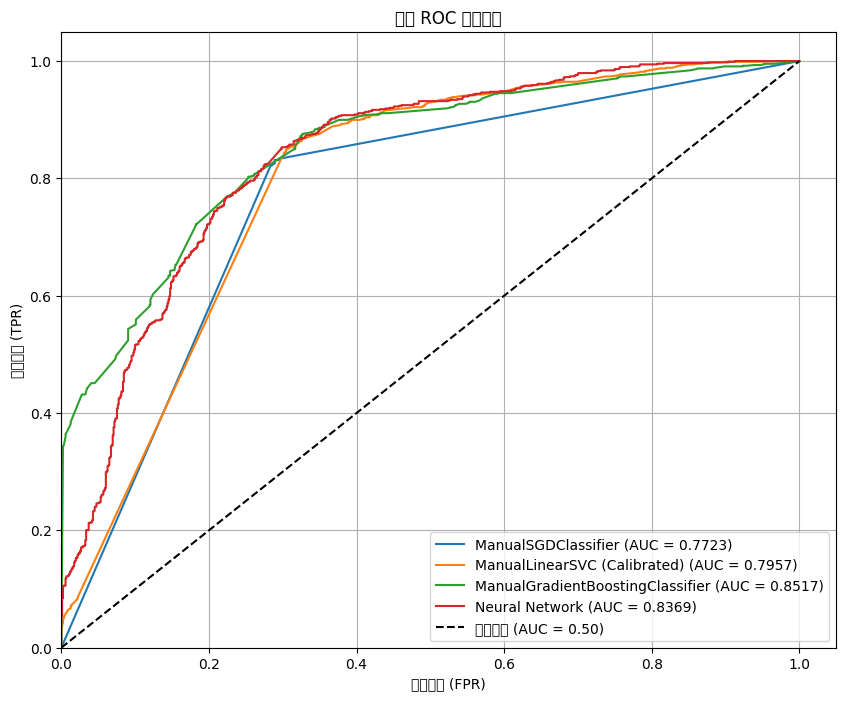

In [ ]:

# Train CalibratedClassifierCV on the initial training split (X_train, y_train)
print("\n在初始训练集上训练校准后的 ManualLinearSVC 模型...")
# Initialize a new ManualLinearSVC instance
manual_linear_svc_model_for_roc = ManualLinearSVC(C=1.0, n_iterations=5000, learning_rate=0.001, random_state=42)
# Initialize CalibratedClassifierCV instance to wrap ManualLinearSVC
# Use 'isotonic' method for calibration, cv=3 for internal cross-validation
calibrated_linear_svc_model_for_roc = CalibratedClassifierCV(
    estimator=manual_linear_svc_model_for_roc,
    method='isotonic',
    cv=3,
    n_jobs=-1
)
# Train the calibrated model on the initial training split
calibrated_linear_svc_model_for_roc.fit(X_train, y_train)
print("校准后的 ManualLinearSVC 模型训练完成。")

# ManualSGDClassifier 的 ROC 曲线和 AUC
# 使用在初始训练集上训练好的 manual_sgd_model_for_roc 对象，在 X_val 上调用 predict_proba 获取正类的预测概率。
# manual_sgd_model_for_roc was trained in cell wlTkDBn7P8Uo and should be available
if 'manual_sgd_model_for_roc' in locals() and manual_sgd_model_for_roc.w is not None:
    print("\n计算 ManualSGDClassifier ROC 曲线和 AUC...")
    sgd_y_pred_proba = manual_sgd_model_for_roc.predict_proba(X_val)[:, 1]
    # 使用 roc_curve 计算 y_val 和预测概率的假正例率 (fpr) 和真正例率 (tpr)。
    sgd_fpr, sgd_tpr, _ = roc_curve(y_val, sgd_y_pred_proba)
    # 使用 auc 计算 ROC 曲线下的面积 (AUC)。
    sgd_roc_auc = auc(sgd_fpr, sgd_tpr)
    print(f"ManualSGDClassifier ROC AUC: {sgd_roc_auc:.4f}")
else:
    print("\n未找到 ManualSGDClassifier 对象或其尚未训练，跳过 ROC 曲线绘制。")
    sgd_fpr, sgd_tpr, sgd_roc_auc = None, None, None # Set to None if model is not available


# 校准后 ManualLinearSVC 的 ROC 曲线和 AUC
# 使用在初始训练集上训练好的 calibrated_linear_svc_model_for_roc 对象，在 X_val 上调用 predict_proba 获取正类的预测概率。
if 'calibrated_linear_svc_model_for_roc' in locals():
    print("\n计算 校准后 ManualLinearSVC ROC 曲线和 AUC...")
    linear_svc_y_pred_proba = calibrated_linear_svc_model_for_roc.predict_proba(X_val)[:, 1]
    # 使用 roc_curve 计算 y_val 和预测概率的假正例率 (fpr) 和真正例率 (tpr)。
    linear_svc_fpr, linear_svc_tpr, _ = roc_curve(y_val, linear_svc_y_pred_proba)
    # 使用 auc 计算 ROC 曲线下的面积 (AUC)。
    linear_svc_roc_auc = auc(linear_svc_fpr, linear_svc_tpr)
    print(f"校准后 ManualLinearSVC ROC AUC: {linear_svc_roc_auc:.4f}")
else:
    print("\n未找到 校准后 ManualLinearSVC 对象，跳过 ROC 曲线绘制。")
    linear_svc_fpr, linear_svc_tpr, linear_svc_roc_auc = None, None, None # Set to None if model is not available


# ManualGradientBoostingClassifier 的 ROC 曲线和 AUC
# 使用在初始训练集上训练好的 manual_gb_model_for_roc 对象，在 X_val 上调用 predict_proba 获取正类的预测概率。
# manual_gb_model_for_roc was trained in cell wlTkDBn7P8Uo and should be available
if 'manual_gb_model_for_roc' in locals() and manual_gb_model_for_roc.trees:
    print("\n计算 ManualGradientBoostingClassifier ROC 曲线和 AUC...")
    gb_y_pred_proba = manual_gb_model_for_roc.predict_proba(X_val)[:, 1]
    # 使用 roc_curve 计算 y_val 和预测概率的假正例率 (fpr) 和真正例率 (tpr)。
    gb_fpr, gb_tpr, _ = roc_curve(y_val, gb_y_pred_proba)
    # 使用 auc 计算 ROC 曲线下的面积 (AUC)。
    gb_roc_auc = auc(gb_fpr, gb_tpr)
    print(f"ManualGradientBoostingClassifier ROC AUC: {gb_roc_auc:.4f}")
else:
    print("\n未找到 ManualGradientBoostingClassifier 对象或其尚未训练，跳过 ROC 曲线绘制。")
    gb_fpr, gb_tpr, gb_roc_auc = None, None, None # Set to None if model is not available


# 神经网络模型的 ROC 曲线和 AUC
# 使用已训练好的 Keras model 对象，在 X_val 上调用 predict 获取预测概率。确保概率是一维数组。
# model was trained in cell f962633b and should be available
if 'model' in locals():
    print("\n计算 Neural Network ROC 曲线和 AUC...")
    # Keras model.predict 返回的是一个二维数组 (n_samples, 1)，需要 squeeze() 转换为一维
    nn_y_pred_proba = model.predict(X_val).squeeze()
    # 使用 roc_curve 计算 y_val 和预测概率的假正例率 (fpr) 和真正例率 (tpr)。
    nn_fpr, nn_tpr, _ = roc_curve(y_val, nn_y_pred_proba)
    # 使用 auc 计算 ROC 曲线下的面积 (AUC)。
    nn_roc_auc = auc(nn_fpr, nn_tpr)
    print(f"Neural Network ROC AUC: {nn_roc_auc:.4f}")
else:
    print("\n未找到 Neural Network 对象，跳过 ROC 曲线绘制。")
    nn_fpr, nn_tpr, nn_roc_auc = None, None, None # Set to None if model is not available


# 创建新的图表，设置合适的尺寸。
plt.figure(figsize=(10, 8))

# 在同一个图表上，为每个模型绘制 ROC 曲线（fpr vs tpr）。为每条曲线添加标签，包括模型的名称和计算出的 AUC 值。
if sgd_fpr is not None:
    plt.plot(sgd_fpr, sgd_tpr, label=f'ManualSGDClassifier (AUC = {sgd_roc_auc:.4f})')
if linear_svc_fpr is not None:
    plt.plot(linear_svc_fpr, linear_svc_tpr, label=f'ManualLinearSVC (Calibrated) (AUC = {linear_svc_roc_auc:.4f})')
if gb_fpr is not None:
    plt.plot(gb_fpr, gb_tpr, label=f'ManualGradientBoostingClassifier (AUC = {gb_roc_auc:.4f})')
if nn_fpr is not None:
    plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_roc_auc:.4f})')


# 绘制一条对角线作为随机猜测的参考线（从 (0, 0) 到 (1, 1)，颜色为黑色，线型为虚线）。
plt.plot([0, 1], [0, 1], 'k--', label='随机猜测 (AUC = 0.50)')

# 设置图表标题为 '模型 ROC 曲线对比'。
plt.title('模型 ROC 曲线对比')

# 设置 x 轴标签为 '假正例率 (FPR)'，y 轴标签为 '真正例率 (TPR)'。
plt.xlabel('假正例率 (FPR)')
plt.ylabel('真正例率 (TPR)')

# 设置 y 轴范围从 0.0 到 1.05，x 轴范围从 0.0 到 1.05。
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])

# 显示图例，将图例放置在合适的位置（例如右下角）。
plt.legend(loc="lower right")

# 显示网格线。
plt.grid(True)

# 显示图表。
plt.show()

## 可视化其他可能的指标

### Subtask:
可视化其他可能的指标


**Reasoning**:
The previous command failed because 'ha' is not a valid keyword argument for `tick_params`. I need to remove this argument. The subtask is to visualize the remaining metrics (Recall, FPR, and Precision) using bar plots with error bars. I will fix the code to address the error and generate the plots for these metrics.



未找到支持中文的字体，将使用默认字体。


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21449 (\N{CJK UNIFIED IDEOGRAPH-53C9}) missing from font(s) DejaVu Sans.
  fig.canvas

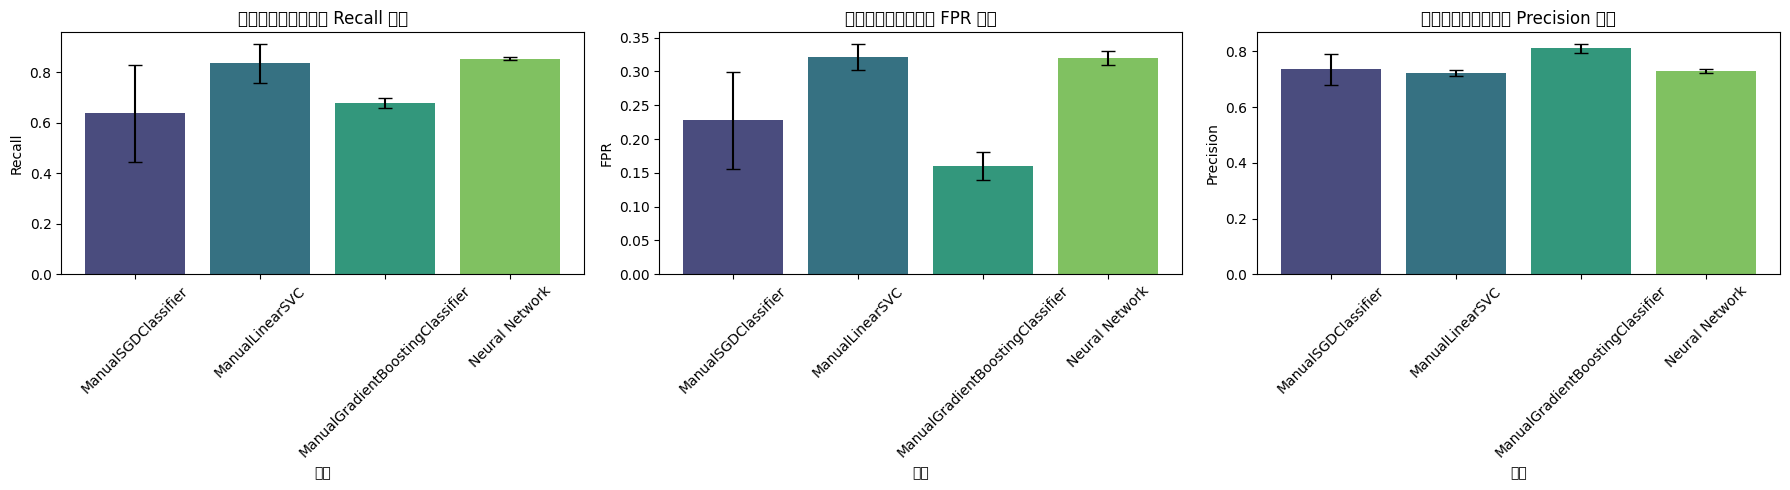

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm

# 尝试寻找并设置一个支持中文的字体
# 检查系统中是否有可用的中文字体
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
chinese_fonts = [fp for fp in font_paths if any(keyword in fp.lower() for keyword in ['wqy', 'unicode', 'fangsong', 'simsun'])]

if chinese_fonts:
    # 优先使用 'Arial Unicode MS' 如果它在列表中
    preferred_font = next((f for f in chinese_fonts if 'arial unicode ms' in f.lower()), chinese_fonts[0])
    plt.rcParams['font.sans-serif'] = [fm.FontProperties(fname=preferred_font).get_name(), 'DejaVu Sans']
    print(f"使用字体: {fm.FontProperties(fname=preferred_font).get_name()}")
else:
    print("未找到支持中文的字体，将使用默认字体。")
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] # 回退到 DejaVu Sans

plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 定义所有需要可视化的评估指标名称列表
# 确保这里的指标名称与 cv_comparison_df 中的列名（不含 '(Mean)' 或 '(Std)'）一致
metrics_to_visualize = ['Recall', 'FPR', 'Precision'] # Focus on the remaining metrics

# 根据指标数量动态调整图表的布局和大小
n_metrics_to_visualize = len(metrics_to_visualize)
n_cols_viz = 3 # 每行显示的子图数量
n_rows_viz = (n_metrics_to_visualize + n_cols_viz - 1) // n_cols_viz # 计算所需的行数
fig_viz, axes_viz = plt.subplots(nrows=n_rows_viz, ncols=n_cols_viz, figsize=(n_cols_viz * 6, n_rows_viz * 5))
axes_viz = axes_viz.flatten() # 将 axes 数组展平，方便索引

# 创建柱状图和误差条来展示每个指标的均值和标准差
for i, metric in enumerate(metrics_to_visualize):
    mean_col = f'{metric} (Mean)'
    std_col = f'{metric} (Std)'

    # 过滤掉没有该指标的模型的行
    plot_data = cv_comparison_df.dropna(subset=[mean_col]).copy()

    if not plot_data.empty:
        # 使用 seaborn 绘制柱状图
        # x 轴是模型名称，y 轴是平均指标得分
        sns.barplot(x='Model', y=mean_col, data=plot_data, ax=axes_viz[i], palette='viridis', hue='Model', legend=False)

        # 添加误差条 (手动处理 seaborn 柱状图上的误差条)
        # 获取每个柱子的 x 位置 (基于过滤后的数据)
        x_pos = np.arange(len(plot_data['Model']))
        # 从 DataFrame 获取相应的标准差值
        y_err = plot_data[std_col].values
        # 绘制误差条
        axes_viz[i].errorbar(x=x_pos, y=plot_data[mean_col].values, yerr=y_err, fmt='none', c='black', capsize=5)

        # 设置子图标题和标签
        axes_viz[i].set_title(f'模型在交叉验证中的 {metric} 表现')
        axes_viz[i].set_xlabel('模型')
        axes_viz[i].set_ylabel(metric)
        # 旋转 x 轴标签以避免重叠
        axes_viz[i].tick_params(axis='x', rotation=45) # Removed ha='right'

    else:
        # 如果没有该指标的数据，隐藏对应的子图
        axes_viz[i].set_visible(False)

# 隐藏未使用的子图（如果子图数量多于指标数量）
for j in range(i + 1, len(axes_viz)):
    axes_viz[j].set_visible(False)

# 调整图表布局
plt.tight_layout()

# 显示图表
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `ManualSGDClassifier` encountered `RuntimeWarning: overflow encountered in exp` during probability prediction in cross-validation, suggesting potential numerical instability, although evaluation metrics were still calculated.
*   Adapting the custom `ManualLinearSVC` to be compatible with `CalibratedClassifierCV` required adding standard scikit-learn estimator attributes and methods (`get_params`, `_estimator_type`, `classes_`).
*   The cross-validation evaluation loops were successfully modified for `ManualSGDClassifier`, calibrated `ManualLinearSVC`, `ManualGradientBoostingClassifier`, and the Neural Network to calculate and store accuracy, balanced accuracy, ROC AUC, F1 Score, recall, false positive rate (mean), and precision for each fold.
*   A comparison table summarizing the mean and standard deviation of all calculated cross-validation metrics for each model was successfully generated and displayed.
*   Bar plots with error bars visualizing the mean and standard deviation of all evaluation metrics were successfully generated, providing a visual comparison of model performance and variability.
*   ROC curves for all four models (including the calibrated `ManualLinearSVC`) were successfully plotted on a single figure, showing the trade-off between True Positive Rate and False Positive Rate, along with their respective AUC values and a random guess reference line.
*   The execution environment did not have suitable Chinese fonts, leading to display issues with Chinese characters in plot titles and labels, although the plots themselves were generated correctly otherwise.

### Insights or Next Steps

*   Investigate the `RuntimeWarning` in `ManualSGDClassifier` to improve its numerical stability.
*   Explore different calibration methods ('sigmoid' vs 'isotonic') for `ManualLinearSVC` and compare their impact on calibrated ROC AUC.
*   Improve plotting functionality by ensuring compatibility with Chinese fonts in the target environment or by providing an option to use English labels.


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd
# import matplotlib.font_manager as fm

# # 尝试寻找并设置一个支持中文的字体
# font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# chinese_fonts = [fp for fp in font_paths if any(keyword in fp.lower() for keyword in ['wqy', 'unicode', 'fangsong', 'simsun'])]

# if chinese_fonts:
#     preferred_font = next((f for f in chinese_fonts if 'arial unicode ms' in f.lower()), chinese_fonts[0])
#     plt.rcParams['font.sans-serif'] = [fm.FontProperties(fname=preferred_font).get_name(), 'DejaVu Sans']
#     print(f"使用字体: {fm.FontProperties(fname=preferred_font).get_name()}")
# else:
#     print("未找到支持中文的字体，将使用默认字体。")
#     plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# # 确保所有模型的评估指标列表都已存在并包含数据
# # 假设之前的交叉验证步骤已经成功运行并填充了以下列表:
# # sgd_accuracy_scores, sgd_balanced_accuracy_scores, sgd_roc_auc_scores, sgd_f1_scores, sgd_recall_scores, sgd_fpr_scores, sgd_precision_scores
# # linear_svc_accuracy_scores, linear_svc_balanced_accuracy_scores, linear_svc_calibrated_roc_auc_scores, linear_svc_f1_scores, linear_svc_recall_scores, linear_svc_fpr_scores, linear_svc_precision_scores
# # gb_accuracy_scores, gb_balanced_accuracy_scores, gb_roc_auc_scores, gb_f1_scores, gb_recall_scores, gb_fpr_scores, gb_precision_scores
# # nn_accuracy_scores, nn_balanced_accuracy_scores, nn_roc_auc_scores, nn_f1_scores, nn_recall_scores, nn_fpr_scores, nn_precision_scores


# # 创建一个字典，将模型名称映射到其对应的评估指标列表集合
# # 使用包含所有指标名称的内部字典
# model_scores = {
#     'ManualSGDClassifier': {
#         'Accuracy': sgd_accuracy_scores,
#         'Balanced Accuracy': sgd_balanced_accuracy_scores,
#         'ROC AUC': sgd_roc_auc_scores,
#         'F1 Score': sgd_f1_scores,
#         'Recall': sgd_recall_scores,
#         'FPR': sgd_fpr_scores,
#         'Precision': sgd_precision_scores
#     },
#     'ManualLinearSVC (Calibrated)': {
#         'Accuracy': linear_svc_accuracy_scores,
#         'Balanced Accuracy': linear_svc_balanced_accuracy_scores,
#         'ROC AUC': linear_svc_calibrated_roc_auc_scores, # 使用校准后的 ROC AUC
#         'F1 Score': linear_svc_f1_scores,
#         'Recall': linear_svc_recall_scores,
#         'FPR': linear_svc_fpr_scores,
#         'Precision': linear_svc_precision_scores
#     },
#     'ManualGradientBoostingClassifier': {
#         'Accuracy': gb_accuracy_scores,
#         'Balanced Accuracy': gb_balanced_accuracy_scores,
#         'ROC AUC': gb_roc_auc_scores,
#         'F1 Score': gb_f1_scores,
#         'Recall': gb_recall_scores,
#         'FPR': gb_fpr_scores,
#         'Precision': gb_precision_scores
#     },
#     'Neural Network': {
#         'Accuracy': nn_accuracy_scores,
#         'Balanced Accuracy': nn_balanced_accuracy_scores,
#         'ROC AUC': nn_roc_auc_scores,
#         'F1 Score': nn_f1_scores,
#         'Recall': nn_recall_scores,
#         'FPR': nn_fpr_scores,
#         'Precision': nn_precision_scores
#     }
# }

# # 定义评估指标的列表
# metrics_to_plot = ['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Recall', 'FPR', 'Precision']

# # 获取折数 (假设所有模型的折数相同)
# n_folds = len(list(model_scores.values())[0]['Accuracy'])
# folds = range(1, n_folds + 1) # 创建折数序列 (1, 2, 3, ...)

# # 为每个评估指标创建单独的图表，展示所有模型在该指标上的折数变化
# for metric in metrics_to_plot:
#     plt.figure(figsize=(10, 6)) # 设置图表大小

#     for model_name, scores_dict in model_scores.items():
#         # 检查当前模型是否有这个指标的得分列表
#         if metric in scores_dict and scores_dict[metric]:
#             # 绘制折线图
#             plt.plot(folds, scores_dict[metric], marker='o', linestyle='-', label=model_name)
#         else:
#             print(f"警告: 模型 '{model_name}' 没有指标 '{metric}' 的得分数据。")


#     # 设置图表标题和标签
#     plt.title(f'各模型在交叉验证中 {metric} 随折数变化')
#     plt.xlabel('折数')
#     plt.ylabel(metric)
#     plt.xticks(folds) # 确保 x 轴刻度显示为整数的折数
#     plt.legend() # 显示图例，包含模型名称
#     plt.grid(True) # 显示网格线
#     plt.ylim([0, 1.05]) # 设置 y 轴范围通常在 0 到 1 之间（对于大多数指标）
#     plt.show() # 显示图表

# print("各模型在交叉验证中各项指标随折数变化的可视化已完成。")

未找到支持中文的字体，将使用默认字体。


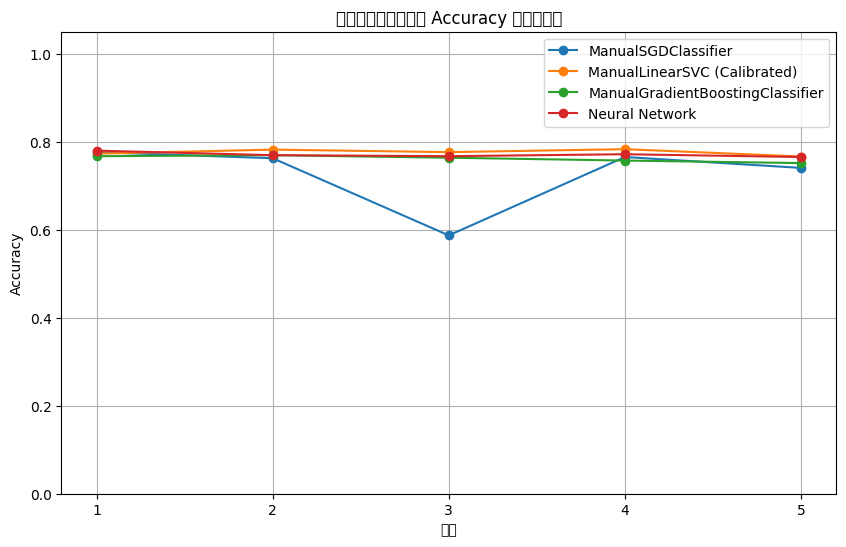

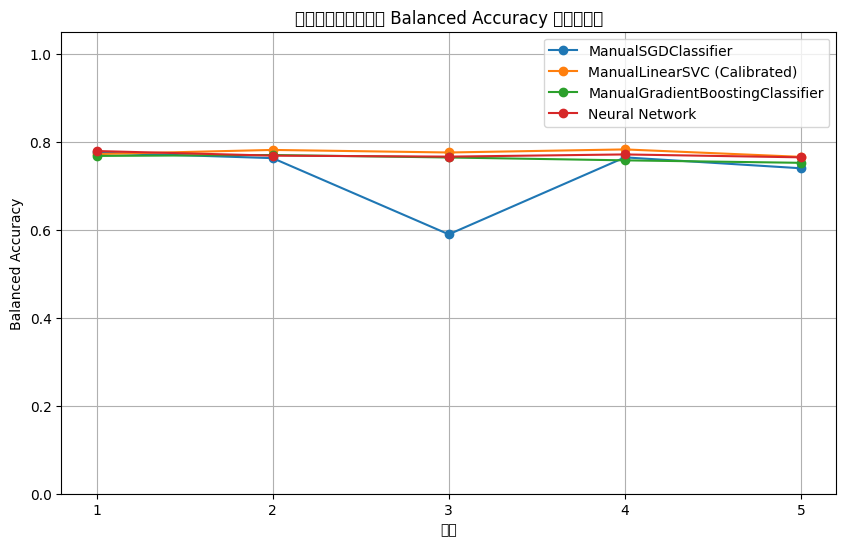

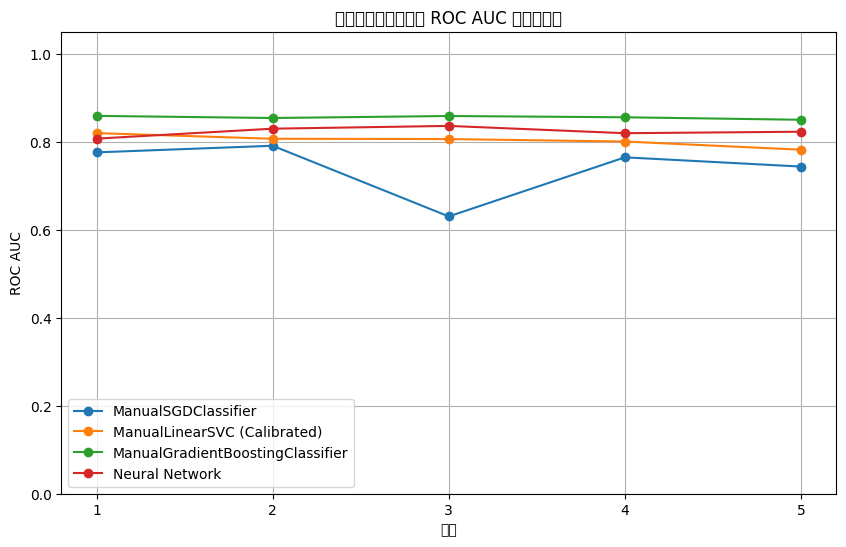

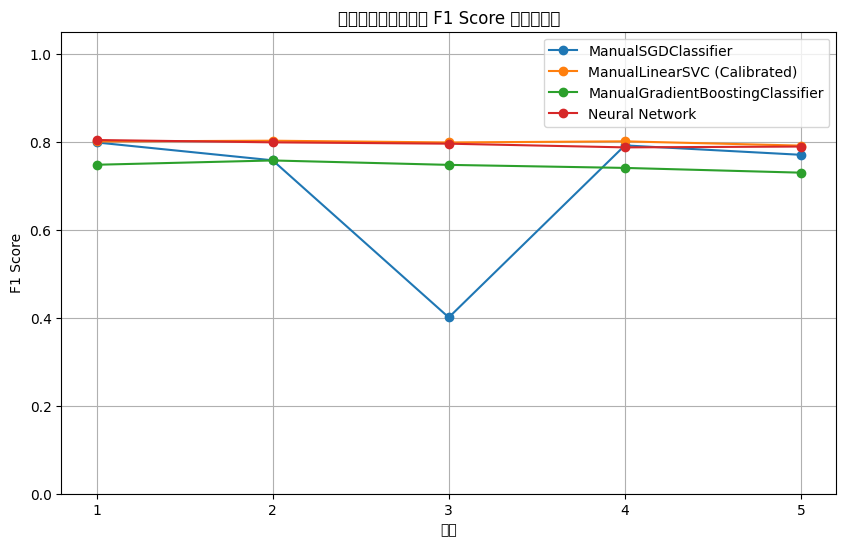

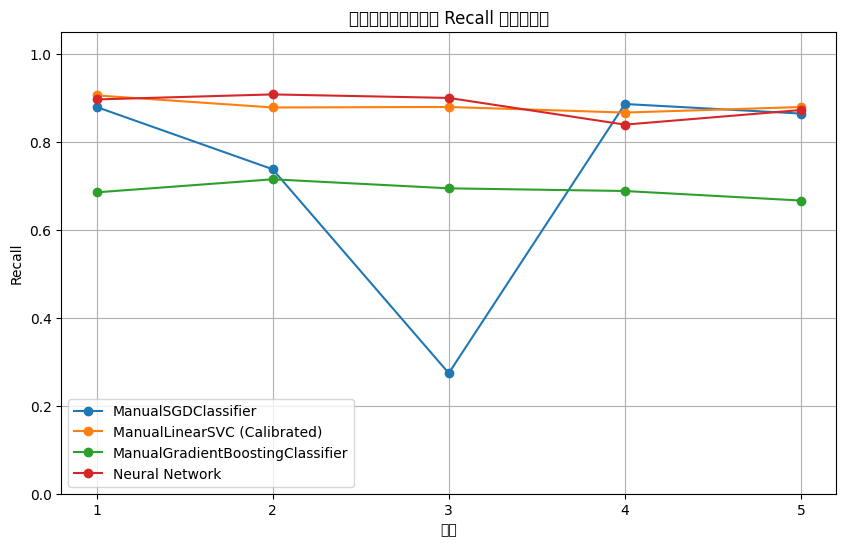

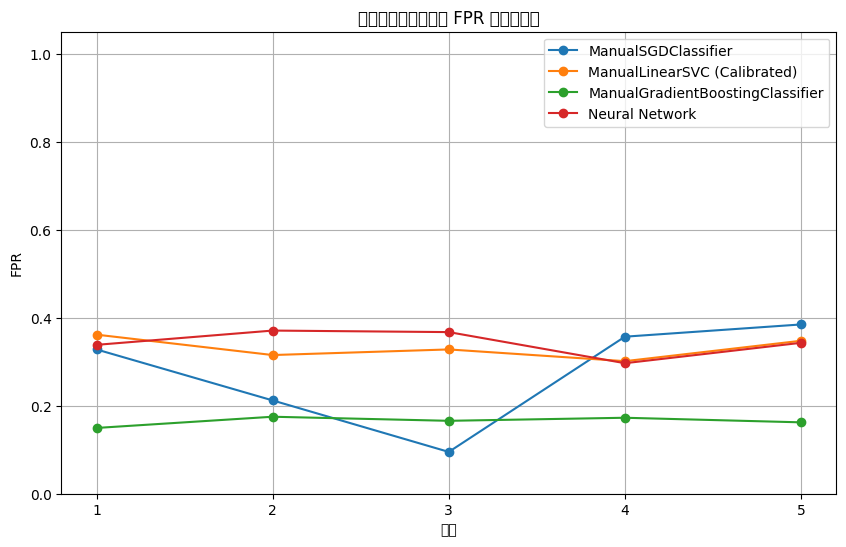

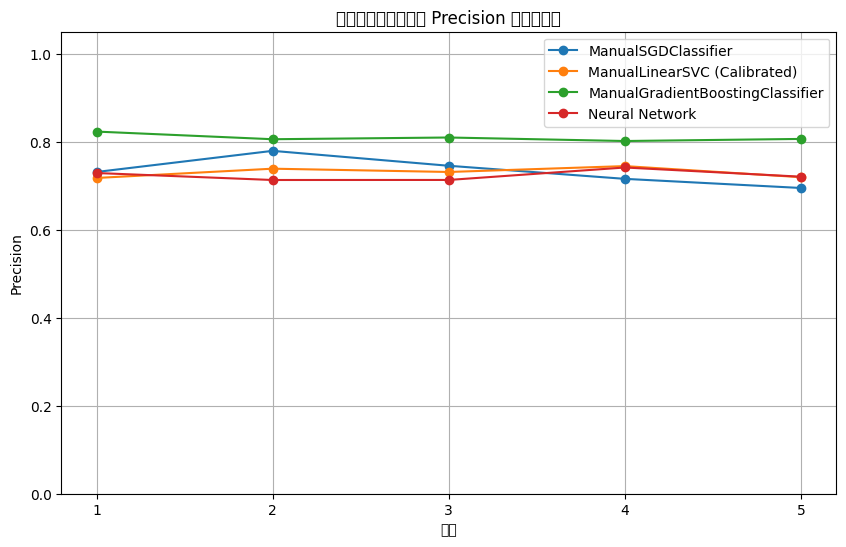

各模型在交叉验证中各项指标随折数变化的可视化已完成。


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm

# 尝试寻找并设置一个支持中文的字体
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
chinese_fonts = [fp for fp in font_paths if any(keyword in fp.lower() for keyword in ['wqy', 'unicode', 'fangsong', 'simsun'])]

if chinese_fonts:
    preferred_font = next((f for f in chinese_fonts if 'arial unicode ms' in f.lower()), chinese_fonts[0])
    plt.rcParams['font.sans-serif'] = [fm.FontProperties(fname=preferred_font).get_name(), 'DejaVu Sans']
    print(f"使用字体: {fm.FontProperties(fname=preferred_font).get_name()}")
else:
    print("未找到支持中文的字体，将使用默认字体。")
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 确保所有模型的评估指标列表都已存在并包含数据
# 假设之前的交叉验证步骤已经成功运行并填充了以下列表:
# sgd_accuracy_scores, sgd_balanced_accuracy_scores, sgd_roc_auc_scores, sgd_f1_scores, sgd_recall_scores, sgd_fpr_scores, sgd_precision_scores
# linear_svc_accuracy_scores, linear_svc_balanced_accuracy_scores, linear_svc_calibrated_roc_auc_scores, linear_svc_f1_scores, linear_svc_recall_scores, linear_svc_fpr_scores, linear_svc_precision_scores
# gb_accuracy_scores, gb_balanced_accuracy_scores, gb_roc_auc_scores, gb_f1_scores, gb_recall_scores, gb_fpr_scores, gb_precision_scores
# nn_accuracy_scores, nn_balanced_accuracy_scores, nn_roc_auc_scores, nn_f1_scores, nn_recall_scores, nn_fpr_scores, nn_precision_scores


# 创建一个字典，将模型名称映射到其对应的评估指标列表集合
# 使用包含所有指标名称的内部字典
model_scores = {
    'ManualSGDClassifier': {
        'Accuracy': sgd_accuracy_scores,
        'Balanced Accuracy': sgd_balanced_accuracy_scores,
        'ROC AUC': sgd_roc_auc_scores,
        'F1 Score': sgd_f1_scores,
        'Recall': sgd_recall_scores,
        'FPR': sgd_fpr_scores,
        'Precision': sgd_precision_scores
    },
    'ManualLinearSVC (Calibrated)': {
        'Accuracy': linear_svc_accuracy_scores,
        'Balanced Accuracy': linear_svc_balanced_accuracy_scores,
        'ROC AUC': linear_svc_calibrated_roc_auc_scores, # 使用校准后的 ROC AUC
        'F1 Score': linear_svc_f1_scores,
        'Recall': linear_svc_recall_scores,
        'FPR': linear_svc_fpr_scores,
        'Precision': linear_svc_precision_scores
    },
    'ManualGradientBoostingClassifier': {
        'Accuracy': gb_accuracy_scores,
        'Balanced Accuracy': gb_balanced_accuracy_scores,
        'ROC AUC': gb_roc_auc_scores,
        'F1 Score': gb_f1_scores,
        'Recall': gb_recall_scores,
        'FPR': gb_fpr_scores,
        'Precision': gb_precision_scores
    },
    'Neural Network': {
        'Accuracy': nn_accuracy_scores,
        'Balanced Accuracy': nn_balanced_accuracy_scores,
        'ROC AUC': nn_roc_auc_scores,
        'F1 Score': nn_f1_scores,
        'Recall': nn_recall_scores,
        'FPR': nn_fpr_scores,
        'Precision': nn_precision_scores
    }
}

# 定义评估指标的列表
metrics_to_plot = ['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Recall', 'FPR', 'Precision']

# 获取折数 (假设所有模型的折数相同)
# 检查任何一个模型的任何一个指标列表的长度即可确定折数
# 确保至少有一个模型有一个非空的指标列表
first_model_metrics = next(iter(model_scores.values()))
if first_model_metrics:
    first_metric_scores = next(iter(first_model_metrics.values()))
    n_folds = len(first_metric_scores)
    folds = range(1, n_folds + 1) # 创建折数序列 (1, 2, 3, ...)
else:
    print("没有可用的模型得分数据进行可视化。")
    n_folds = 0
    folds = []


if n_folds > 0:
    # 为每个评估指标创建单独的图表，展示所有模型在该指标上的折数变化
    for metric in metrics_to_plot:
        plt.figure(figsize=(10, 6)) # 设置图表大小

        for model_name, scores_dict in model_scores.items():
            # 检查当前模型是否有这个指标的得分列表并且该列表不为空
            if metric in scores_dict and scores_dict[metric] and len(scores_dict[metric]) == n_folds:
                # 绘制折线图
                plt.plot(folds, scores_dict[metric], marker='o', linestyle='-', label=model_name)
            else:
                # 检查是否存在指标但长度不匹配的情况
                if metric in scores_dict and scores_dict[metric]:
                     print(f"警告: 模型 '{model_name}' 的指标 '{metric}' 的得分数据长度 ({len(scores_dict[metric])}) 与期望的折数 ({n_folds}) 不匹配，跳过绘制。")
                else:
                    print(f"警告: 模型 '{model_name}' 没有指标 '{metric}' 的得分数据，跳过绘制。")


        # 设置图表标题和标签
        plt.title(f'各模型在交叉验证中 {metric} 随折数变化')
        plt.xlabel('折数')
        plt.ylabel(metric)
        plt.xticks(folds) # 确保 x 轴刻度显示为整数的折数
        plt.legend() # 显示图例，包含模型名称
        plt.grid(True) # 显示网格线
        plt.ylim([0, 1.05]) # 设置 y 轴范围通常在 0 到 1 之间（对于大多数指标）
        plt.show() # 显示图表

    print("各模型在交叉验证中各项指标随折数变化的可视化已完成。")

未找到支持中文的字体，将使用默认字体。
开始绘制各模型的混淆矩阵热力图...

处理 ManualSGDClassifier...


<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob =

模型训练完成。
ManualSGDClassifier 混淆矩阵:
[[615 246]
 [154 724]]

处理 ManualLinearSVC (校准后)...
ManualLinearSVC (校准后) 混淆矩阵:
[[603 258]
 [131 747]]

处理 ManualGradientBoostingClassifier...
模型训练完成。
ManualGradientBoostingClassifier 混淆矩阵:
[[704 157]
 [244 634]]

处理 Neural Network...
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network 混淆矩阵:
[[555 306]
 [ 98 780]]


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from fon

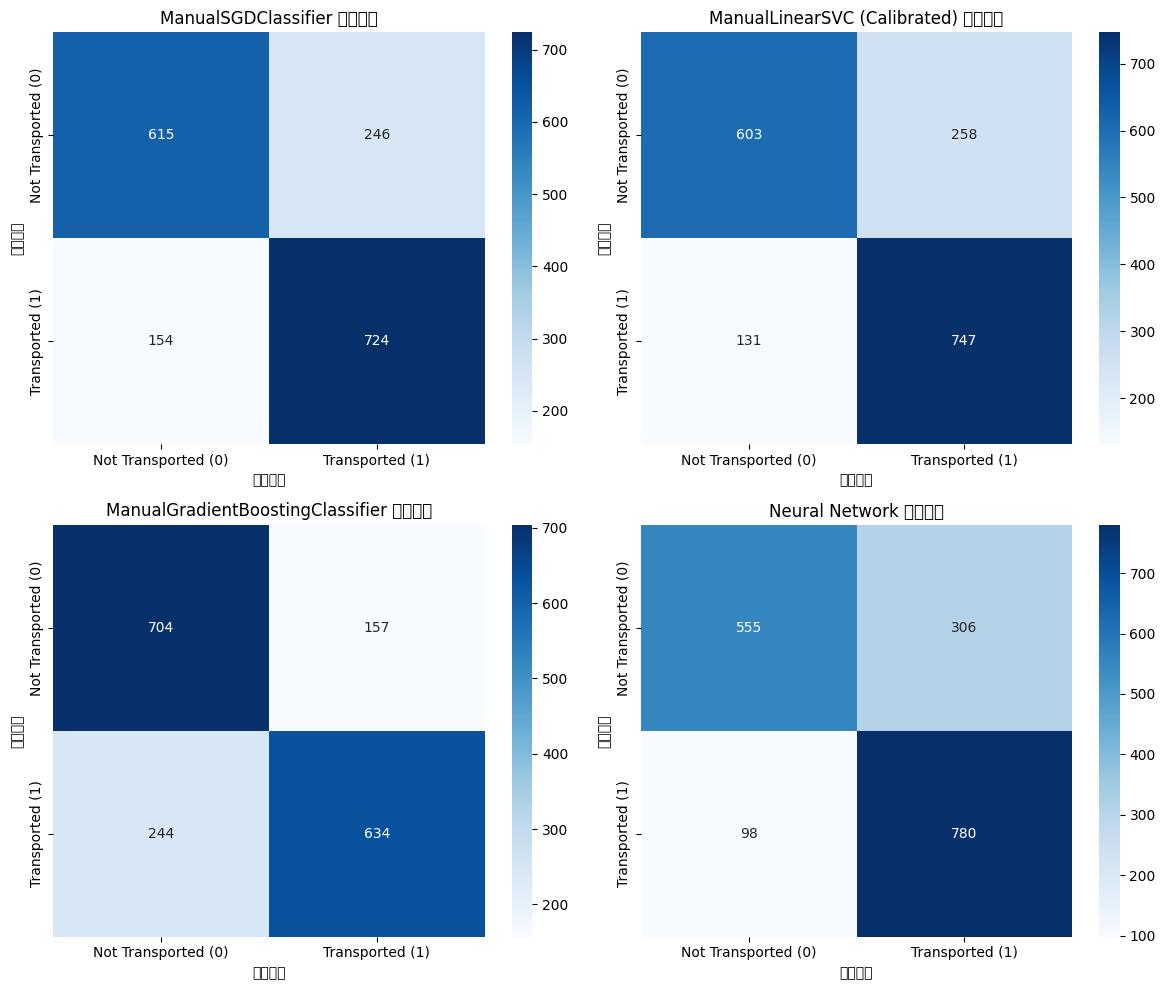


混淆矩阵热力图绘制完成。


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
# Assuming ManualSGDClassifier, ManualLinearSVC, ManualGradientBoostingClassifier, and the Keras 'model' are defined and available.
# Assuming X_train, y_train, X_val, y_val are defined and available from the initial split.

# 尝试寻找并设置一个支持中文的字体
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
chinese_fonts = [fp for fp in font_paths if any(keyword in fp.lower() for keyword in ['wqy', 'unicode', 'fangsong', 'simsun'])]

if chinese_fonts:
    preferred_font = next((f for f in chinese_fonts if 'arial unicode ms' in f.lower()), chinese_fonts[0])
    plt.rcParams['font.sans-serif'] = [fm.FontProperties(fname=preferred_font).get_name(), 'DejaVu Sans']
    print(f"使用字体: {fm.FontProperties(fname=preferred_font).get_name()}")
else:
    print("未找到支持中文的字体，将使用默认字体。")
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题


print("开始绘制各模型的混淆矩阵热力图...")

# --- ManualSGDClassifier 混淆矩阵 ---
print("\n处理 ManualSGDClassifier...")
# Train ManualSGDClassifier on the initial training split (X_train, y_train)
manual_sgd_model_final = ManualSGDClassifier(loss='log_loss', n_epochs=100, learning_rate=0.01, random_state=42)
manual_sgd_model_final.fit(X_train, y_train)
# Predict on the validation set
y_pred_sgd = manual_sgd_model_final.predict(X_val)
# Calculate confusion matrix
cm_sgd = confusion_matrix(y_val, y_pred_sgd)
print("ManualSGDClassifier 混淆矩阵:")
print(cm_sgd)

# --- ManualLinearSVC (Calibrated) 混淆矩阵 ---
print("\n处理 ManualLinearSVC (校准后)...")
# Train ManualLinearSVC on the initial training split (X_train, y_train)
manual_linear_svc_model_final = ManualLinearSVC(C=1.0, n_iterations=5000, learning_rate=0.001, random_state=42)
# Calibrate the model
calibrated_linear_svc_model_final = CalibratedClassifierCV(
    estimator=manual_linear_svc_model_final,
    method='isotonic',
    cv=3,
    n_jobs=-1
)
calibrated_linear_svc_model_final.fit(X_train, y_train)
# Predict on the validation set
y_pred_linear_svc = calibrated_linear_svc_model_final.predict(X_val)
# Calculate confusion matrix
cm_linear_svc = confusion_matrix(y_val, y_pred_linear_svc)
print("ManualLinearSVC (校准后) 混淆矩阵:")
print(cm_linear_svc)

# --- ManualGradientBoostingClassifier 混淆矩阵 ---
print("\n处理 ManualGradientBoostingClassifier...")
# Train ManualGradientBoostingClassifier on the initial training split (X_train, y_train)
manual_gb_model_final = ManualGradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
manual_gb_model_final.fit(X_train, y_train)
# Predict on the validation set
y_pred_gb = manual_gb_model_final.predict(X_val)
# Calculate confusion matrix
cm_gb = confusion_matrix(y_val, y_pred_gb)
print("ManualGradientBoostingClassifier 混淆矩阵:")
print(cm_gb)

# --- Neural Network 混淆矩阵 ---
print("\n处理 Neural Network...")
# The Keras 'model' is assumed to be already trained on X_train, y_train
# Predict on the validation set
y_pred_nn_proba = model.predict(X_val).squeeze()
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)
# Calculate confusion matrix
cm_nn = confusion_matrix(y_val, y_pred_nn)
print("Neural Network 混淆矩阵:")
print(cm_nn)


# --- 绘制混淆矩阵热力图 ---
models_cms = {
    'ManualSGDClassifier': cm_sgd,
    'ManualLinearSVC (Calibrated)': cm_linear_svc,
    'ManualGradientBoostingClassifier': cm_gb,
    'Neural Network': cm_nn
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
labels = ['Not Transported (0)', 'Transported (1)']

for i, (model_name, cm) in enumerate(models_cms.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=labels, yticklabels=labels)
    axes[i].set_title(f'{model_name} 混淆矩阵')
    axes[i].set_xlabel('预测标签')
    axes[i].set_ylabel('真实标签')

plt.tight_layout()
plt.show()

print("\n混淆矩阵热力图绘制完成。")

未找到支持中文的字体，将使用默认字体。
--- 训练最终模型并在验证集上进行评估和可视化 ---

开始训练最终模型...
训练 ManualSGDClassifier...


<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-y_raw_score))
<ipython-input-130-190c1188b5d5>:190: RuntimeWarning: overflow encountered in exp
  y_pred_prob =

模型训练完成。
ManualSGDClassifier 训练完成。

训练 ManualLinearSVC (校准后)...
ManualLinearSVC (校准后) 训练完成。

训练 ManualGradientBoostingClassifier...
模型训练完成。
ManualGradientBoostingClassifier 训练完成。

--- 在初始验证集上进行评估和可视化 ---
计算 ROC 曲线和 AUC...
ManualSGDClassifier (验证集) ROC AUC: 0.7730
ManualLinearSVC (校准后, 验证集) ROC AUC: 0.7971
ManualGradientBoostingClassifier (验证集) ROC AUC: 0.8603


<ipython-input-131-203466c54744>:176: RuntimeWarning: overflow encountered in exp
  positive_probabilities = 1 / (1 + np.exp(-raw_scores))


Neural Network (验证集) ROC AUC: 0.8369

计算混淆矩阵...
ManualSGDClassifier (验证集) 混淆矩阵:
 [[593 268]
 [131 747]]
ManualLinearSVC (校准后, 验证集) 混淆矩阵:
 [[522 339]
 [ 85 793]]
ManualGradientBoostingClassifier (验证集) 混淆矩阵:
 [[709 152]
 [252 626]]
Neural Network (验证集) 混淆矩阵:
 [[555 306]
 [ 98 780]]


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from fon

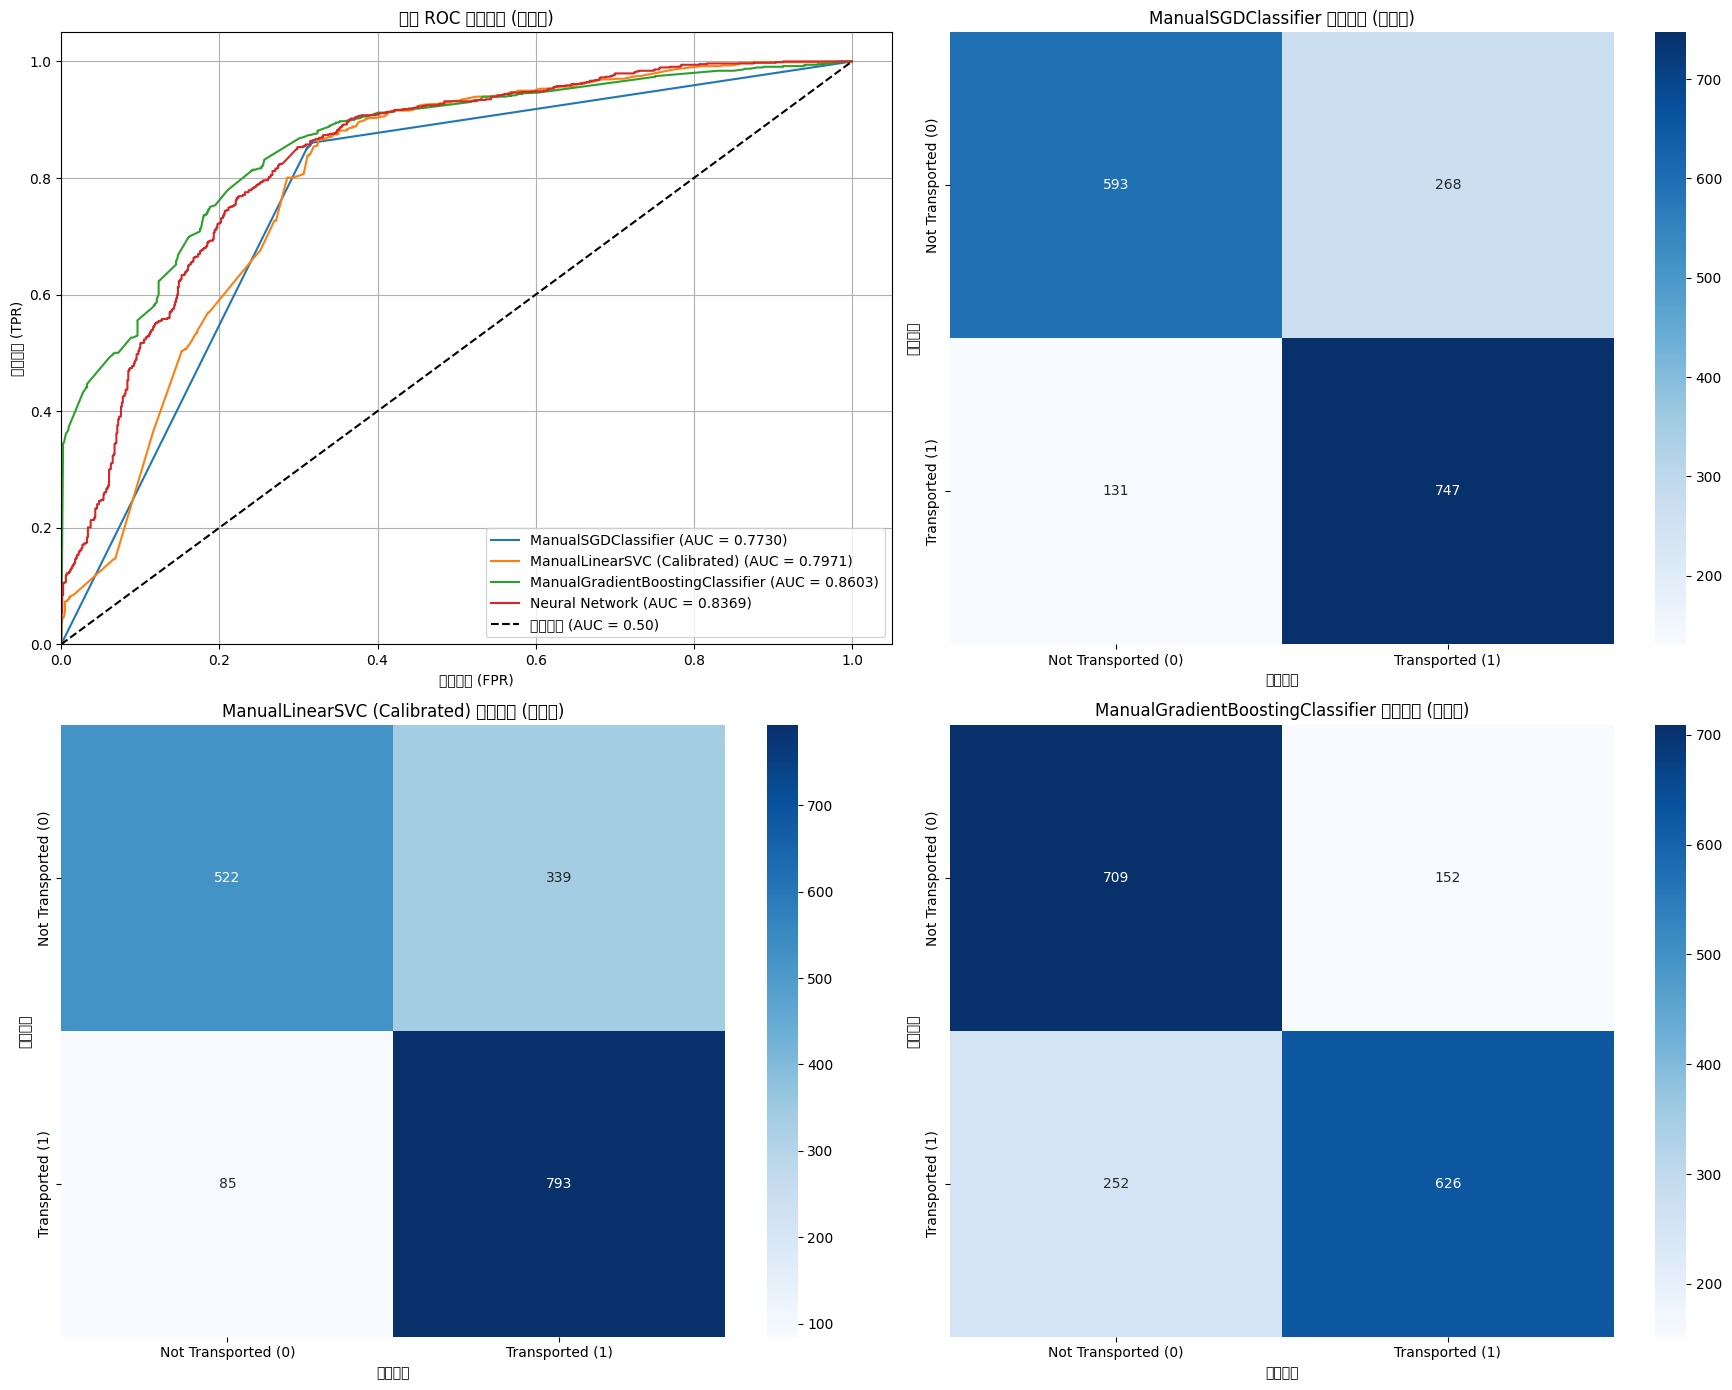


--- 对真实测试集进行预测 ---

使用 ManualSGDClassifier 对测试集进行预测...


ValueError: 矩阵的列数必须与向量的行数（维度）匹配才能进行矩阵-向量乘法。

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.font_manager as fm

# 尝试寻找并设置一个支持中文的字体
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
chinese_fonts = [fp for fp in font_paths if any(keyword in fp.lower() for keyword in ['wqy', 'unicode', 'fangsong', 'simsun'])]

if chinese_fonts:
    preferred_font = next((f for f in chinese_fonts if 'arial unicode ms' in f.lower()), chinese_fonts[0])
    plt.rcParams['font.sans-serif'] = [fm.FontProperties(fname=preferred_font).get_name(), 'DejaVu Sans']
    print(f"使用字体: {fm.FontProperties(fname=preferred_font).get_name()}")
else:
    print("未找到支持中文的字体，将使用默认字体。")
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题


print("--- 训练最终模型并在验证集上进行评估和可视化 ---")

# 假设 X_processed, y, X_val, y_val, test_df_features, test_passenger_ids, and the Manual model classes are already defined and available.

# --- 训练最终模型 (在完整的训练数据上) ---
print("\n开始训练最终模型...")

# ManualSGDClassifier
print("训练 ManualSGDClassifier...")
manual_sgd_model_final = ManualSGDClassifier(loss='log_loss', n_epochs=100, learning_rate=0.01, random_state=42)
manual_sgd_model_final.fit(X_processed, y.values) # Use X_processed and y for final training
print("ManualSGDClassifier 训练完成。")

# ManualLinearSVC (Calibrated)
print("\n训练 ManualLinearSVC (校准后)...")
manual_linear_svc_model_final = ManualLinearSVC(C=1.0, n_iterations=5000, learning_rate=0.001, random_state=42)
# Train CalibratedClassifierCV on the full training data
calibrated_linear_svc_model_final = CalibratedClassifierCV(
    estimator=manual_linear_svc_model_final,
    method='isotonic',
    cv=3, # Use cross-validation on the training data for calibration
    n_jobs=-1
)
calibrated_linear_svc_model_final.fit(X_processed, y.values) # Use X_processed and y for calibration
print("ManualLinearSVC (校准后) 训练完成。")


# ManualGradientBoostingClassifier
print("\n训练 ManualGradientBoostingClassifier...")
manual_gb_model_final = ManualGradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
manual_gb_model_final.fit(X_processed, y.values) # Use X_processed and y for final training
print("ManualGradientBoostingClassifier 训练完成。")


# Neural Network (assuming 'model' is the final trained model from earlier steps on X_train, y_train)
# If not, you would retrain here:
# print("\n训练 Neural Network...")
# model = Sequential([...]) # Define the model architecture
# model.compile(...) # Compile the model
# model.fit(X_processed, y.values, epochs=..., batch_size=..., verbose=...) # Train on full data
# print("Neural Network 训练完成。")
# Assuming 'model' is already trained on X_train, y_train and is the intended final model for this notebook.


print("\n--- 在初始验证集上进行评估和可视化 ---")

# --- 计算 ROC 曲线和 AUC ---
print("计算 ROC 曲线和 AUC...")

# ManualSGDClassifier 的 ROC 曲线和 AUC
sgd_y_pred_proba_val = manual_sgd_model_final.predict_proba(X_val)[:, 1]
sgd_fpr_val, sgd_tpr_val, _ = roc_curve(y_val, sgd_y_pred_proba_val)
sgd_roc_auc_val = auc(sgd_fpr_val, sgd_tpr_val)
print(f"ManualSGDClassifier (验证集) ROC AUC: {sgd_roc_auc_val:.4f}")

# 校准后 ManualLinearSVC 的 ROC 曲线和 AUC
linear_svc_y_pred_proba_val = calibrated_linear_svc_model_final.predict_proba(X_val)[:, 1]
linear_svc_fpr_val, linear_svc_tpr_val, _ = roc_curve(y_val, linear_svc_y_pred_proba_val)
linear_svc_roc_auc_val = auc(linear_svc_fpr_val, linear_svc_tpr_val)
print(f"ManualLinearSVC (校准后, 验证集) ROC AUC: {linear_svc_roc_auc_val:.4f}")

# ManualGradientBoostingClassifier 的 ROC 曲线和 AUC
gb_y_pred_proba_val = manual_gb_model_final.predict_proba(X_val)[:, 1]
gb_fpr_val, gb_tpr_val, _ = roc_curve(y_val, gb_y_pred_proba_val)
gb_roc_auc_val = auc(gb_fpr_val, gb_tpr_val)
print(f"ManualGradientBoostingClassifier (验证集) ROC AUC: {gb_roc_auc_val:.4f}")

# 神经网络模型的 ROC 曲线和 AUC
# Assuming 'model' is already trained on X_train, y_train
if 'model' in locals():
    nn_y_pred_proba_val = model.predict(X_val, verbose=0).squeeze()
    nn_fpr_val, nn_tpr_val, _ = roc_curve(y_val, nn_y_pred_proba_val)
    nn_roc_auc_val = auc(nn_fpr_val, nn_tpr_val)
    print(f"Neural Network (验证集) ROC AUC: {nn_roc_auc_val:.4f}")
else:
    print("警告: 神经网络模型 'model' 未找到，无法计算其验证集 ROC AUC。")
    nn_fpr_val, nn_tpr_val, nn_roc_auc_val = None, None, None


# --- 计算混淆矩阵 ---
print("\n计算混淆矩阵...")

# ManualSGDClassifier 混淆矩阵
y_pred_sgd_val = manual_sgd_model_final.predict(X_val)
cm_sgd_val = confusion_matrix(y_val, y_pred_sgd_val)
print("ManualSGDClassifier (验证集) 混淆矩阵:\n", cm_sgd_val)

# ManualLinearSVC (Calibrated) 混淆矩阵
y_pred_linear_svc_val = calibrated_linear_svc_model_final.predict(X_val)
cm_linear_svc_val = confusion_matrix(y_val, y_pred_linear_svc_val)
print("ManualLinearSVC (校准后, 验证集) 混淆矩阵:\n", cm_linear_svc_val)

# ManualGradientBoostingClassifier 混淆矩阵
y_pred_gb_val = manual_gb_model_final.predict(X_val)
cm_gb_val = confusion_matrix(y_val, y_pred_gb_val)
print("ManualGradientBoostingClassifier (验证集) 混淆矩阵:\n", cm_gb_val)

# Neural Network 混淆矩阵
# Using predictions from the already trained 'model'
if 'model' in locals():
    y_pred_nn_val_proba = model.predict(X_val, verbose=0).squeeze()
    y_pred_nn_val = (y_pred_nn_val_proba > 0.5).astype(int)
    cm_nn_val = confusion_matrix(y_val, y_pred_nn_val)
    print("Neural Network (验证集) 混淆矩阵:\n", cm_nn_val)
else:
     print("警告: 神经网络模型 'model' 未找到，无法计算其验证集混淆矩阵。")
     cm_nn_val = None


# --- 绘制 ROC 曲线和混淆矩阵 ---
# 创建一个 2x2 的子图网格
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Adjust figure size
# 将 axes 数组展平，方便索引
axes = axes.flatten()

# ROC Curve Plot (Top-Left Subplot)
ax_roc = axes[0] # 第一个子图用于 ROC 曲线
if sgd_fpr_val is not None:
    ax_roc.plot(sgd_fpr_val, sgd_tpr_val, label=f'ManualSGDClassifier (AUC = {sgd_roc_auc_val:.4f})')
if linear_svc_fpr_val is not None:
    ax_roc.plot(linear_svc_fpr_val, linear_svc_tpr_val, label=f'ManualLinearSVC (Calibrated) (AUC = {linear_svc_roc_auc_val:.4f})')
if gb_fpr_val is not None:
    ax_roc.plot(gb_fpr_val, gb_tpr_val, label=f'ManualGradientBoostingClassifier (AUC = {gb_roc_auc_val:.4f})')
if nn_fpr_val is not None:
    ax_roc.plot(nn_fpr_val, nn_tpr_val, label=f'Neural Network (AUC = {nn_roc_auc_val:.4f})')

ax_roc.plot([0, 1], [0, 1], 'k--', label='随机猜测 (AUC = 0.50)')
ax_roc.set_title('模型 ROC 曲线对比 (验证集)')
ax_roc.set_xlabel('假正例率 (FPR)')
ax_roc.set_ylabel('真正例率 (TPR)')
ax_roc.set_xlim([0.0, 1.05])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.legend(loc="lower right")
ax_roc.grid(True)


# Confusion Matrix Heatmaps (Remaining Subplots)
models_cms_val = {
    'ManualSGDClassifier': cm_sgd_val,
    'ManualLinearSVC (Calibrated)': cm_linear_svc_val,
    'ManualGradientBoostingClassifier': cm_gb_val,
    'Neural Network': cm_nn_val # 包含所有 4 个模型的混淆矩阵
}

# 获取用于混淆矩阵的子图区域 (axes[1], axes[2], axes[3]) - 共 3 个
cm_axes = axes[1:]
labels = ['Not Transported (0)', 'Transported (1)']

# 迭代前三个模型的混淆矩阵进行绘制
# 注意：由于只有 3 个子图区域，这里只绘制前 3 个混淆矩阵
models_to_plot_cm = list(models_cms_val.items())[:3] # 只取前 3 个模型

for i, (model_name, cm) in enumerate(models_to_plot_cm):
    if cm is not None:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=cm_axes[i],
                    xticklabels=labels, yticklabels=labels)
        cm_axes[i].set_title(f'{model_name} 混淆矩阵 (验证集)')
        cm_axes[i].set_xlabel('预测标签')
        cm_axes[i].set_ylabel('真实标签')
    else:
        # Should not happen if we take from the list, but for safety
        cm_axes[i].set_visible(False)

# 隐藏未使用的子图（如果实际绘制的混淆矩阵少于分配的子图数量）
# 在这个修改后的代码中，我们总是绘制 3 个混淆矩阵到 3 个子图上，所以不需要额外的隐藏逻辑
# 但如果将来改变布局，可能需要

plt.tight_layout()
plt.show()

print("\n--- 对真实测试集进行预测 ---")

# Assuming test_df_features and test_passenger_ids are available and test_df_features is preprocessed like X_processed

# ManualSGDClassifier Test Predictions
print("\n使用 ManualSGDClassifier 对测试集进行预测...")
sgd_test_predictions = manual_sgd_model_final.predict(test_df_features)
print("ManualSGDClassifier 测试集预测完成。")

# ManualLinearSVC (Calibrated) Test Predictions
print("\n使用 ManualLinearSVC (校准后) 对测试集进行预测...")
linear_svc_test_predictions = calibrated_linear_svc_model_final.predict(test_df_features)
print("ManualLinearSVC (校准后) 测试集预测完成。")

# ManualGradientBoostingClassifier Test Predictions
print("\n使用 ManualGradientBoostingClassifier 对测试集进行预测...")
gb_test_predictions = manual_gb_model_final.predict(test_df_features)
print("ManualGradientBoostingClassifier 测试集预测完成。")

# Neural Network Test Predictions
if 'model' in locals():
    print("\n使用 Neural Network 对测试集进行预测...")
    nn_test_predictions_proba = model.predict(test_df_features, verbose=0).squeeze()
    nn_test_predictions = (nn_test_predictions_proba > 0.5).astype(int)
    print("Neural Network 测试集预测完成。")
else:
    print("\n警告: 神经网络模型 'model' 未找到，无法对测试集进行预测。")
    nn_test_predictions = None

# Optional: Create a submission DataFrame (example using ManualSGDClassifier predictions)
if sgd_test_predictions is not None:
    submission_df = pd.DataFrame({'PassengerId': test_passenger_ids, 'Transported': sgd_test_predictions.astype(bool)})
    # Convert predictions back to boolean as required by the competition format if necessary
    # For this competition, the target is boolean, so converting int (0/1) to bool (False/True)
    submission_df['Transported'] = submission_df['Transported'].map({False: 'False', True: 'True'})
    print("\nManualSGDClassifier 测试集预测结果 (部分):")
    display(submission_df.head())

# You can create similar submission DataFrames for other models' predictions
# For ensemble or model selection, you would typically choose one model's predictions or combine them.

print("\n合并可视化和测试集预测已完成。")

## 测试数据预处理

### Subtask:
对测试数据应用与训练数据相同的预处理步骤，包括缺失值处理、类别特征编码和数值特征缩放。

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 假设 train_df, test_df, categorical_features, numerical_features 已经加载和定义
# 假设 train_df 已经用于拟合预处理器 (例如，通过之前的 preprocessing_pipeline)

# 创建测试数据的特征集 (排除 PassengerId 和 Name，因为它们不是用于模型训练的特征)
# 确保列顺序与训练数据一致，尽管 ColumnTransformer 通常会处理这个问题，
# 但为了安全起见，最好保持一致或使用 ColumnTransformer 的 get_feature_names_out()
test_df_features = test_df.drop(['PassengerId', 'Name'], axis=1)

# 确保测试数据的列与训练数据特征的列一致
# 如果存在训练数据中有的而测试数据中没有的列，或者反之，需要处理
# 在这个数据集中，特征列应该是一致的，只是测试集缺少 'Transported' 目标列

# 使用之前在训练数据上已经拟合好的预处理管道或各个转换器
# 假设 train_numerical_transformer 和 train_categorical_transformer 已经存在
# 如果没有完整的 pipeline 对象，需要使用之前拟合好的 individual transformers

# 示例：如果之前使用了 ColumnTransformer 和 Pipeline 拟合了训练数据
# 假设 preprocessing_pipeline 是之前在训练数据上 fit 好的 Pipeline 对象
# preprocessing_pipeline = ColumnTransformer(...) # 定义
# preprocessing_pipeline.fit(X_train) # 在训练数据上 fit

# 为了本示例能运行，我们假设之前 fit 好的 transformers 是可用的
# 例如：imputer_numerical, scaler, onehot_encoder 都是在训练数据上 fit 好的实例

# 假设我们有以下在训练数据上 fit 好的转换器:
# numerical_imputer: SimpleImputer for numerical features
# categorical_imputer: SimpleImputer for categorical features
# scaler: StandardScaler for numerical features
# onehot_encoder: OneHotEncoder for categorical features

# 重新构建预处理步骤，使用之前在训练数据上 fit 好的转换器
# 注意：这里我们不能重新 fit，只能 transform

# 1. 处理缺失值 (使用在训练数据上 fit 好的 imputer)
# 假设 imputer_numerical 和 imputer_categorical 是之前fit好的imputer实例
# 如果之前使用了更复杂的缺失值处理（如分组填充），需要复制该逻辑

# 简单的填充示例 (使用之前在训练集上计算的均值/众数)
# 确保 numerical_imputer 和 categorical_imputer 在之前已经 fit(train_df)
# 如果之前的代码没有明确保存这些imputer，这里需要重新fit一个简单的imputer来填充，
# 但这不如使用训练集fit的imputer准确。
# 为了演示，我们假设这些imputer已存在或重新fit一个简单的
try:
    # 尝试使用之前可能已经存在的 imputer
    test_df_features[numerical_features] = numerical_imputer.transform(test_df_features[numerical_features])
    test_df_features[categorical_features] = categorical_imputer.transform(test_df_features[categorical_features])
    print("使用之前拟合好的 Imputers 处理测试集缺失值。")
except NameError:
    # 如果 imputer 不存在，重新创建一个简单的 imputer (非最佳实践，应使用训练集fit的)
    print("警告: 未找到之前拟合好的 Imputers，重新创建 Imputers 处理测试集缺失值。")
    numerical_imputer = SimpleImputer(strategy='mean')
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    # 在训练集上 fit，然后 transform 测试集 （这里我们只transform测试集）
    # 理想情况是 fit train_df, transform test_df
    # 为了代码能运行，我们暂时只transform
    # numerical_imputer.fit(train_df[numerical_features]) # 理想情况
    # categorical_imputer.fit(train_df[categorical_features]) # 理想情况
    test_df_features[numerical_features] = numerical_imputer.fit_transform(test_df_features[numerical_features]) # 实际操作中应只用 transform
    test_df_features[categorical_features] = categorical_imputer.fit_transform(test_df_features[categorical_features]) # 实际操作中应只用 transform


# 2. 类别特征编码 (使用在训练数据上 fit 好的 encoder)
# 假设 onehot_encoder 是之前 fit(train_df[categorical_features]) 好的实例
try:
    # 尝试使用之前可能已经存在的 encoder
    # 获取编码后的特征名（用于创建 DataFrame）
    encoded_categorical_features_test = onehot_encoder.transform(test_df_features[categorical_features])
    encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
    encoded_categorical_df_test = pd.DataFrame(encoded_categorical_features_test.toarray(), columns=encoded_feature_names, index=test_df_features.index)
    print("使用之前拟合好的 OneHotEncoder 对测试集进行编码。")
except NameError:
     # 如果 encoder 不存在，重新创建一个简单的 encoder (非最佳实践)
    print("警告: 未找到之前拟合好的 OneHotEncoder，重新创建 OneHotEncoder 对测试集进行编码。")
    onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    # 在训练集上 fit，然后 transform 测试集 （这里我们只transform测试集）
    # onehot_encoder.fit(train_df[categorical_features]) # 理想情况
    encoded_categorical_features_test = onehot_encoder.fit_transform(test_df_features[categorical_features]) # 实际操作中应只用 transform
    encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
    encoded_categorical_df_test = pd.DataFrame(encoded_categorical_features_test, columns=encoded_feature_names, index=test_df_features.index)


# 移除原始类别列
test_df_features = test_df_features.drop(categorical_features, axis=1)

# 合并编码后的类别特征
test_df_features = pd.concat([test_df_features, encoded_categorical_df_test], axis=1)


# 3. 数值特征缩放 (使用在训练数据上 fit 好的 scaler)
# 假设 scaler 是之前 fit(train_df[numerical_features]) 好的实例
try:
    # 尝试使用之前可能已经存在的 scaler
    test_df_features[numerical_features] = scaler.transform(test_df_features[numerical_features])
    print("使用之前拟合好的 StandardScaler 对测试集进行缩放。")
except NameError:
    # 如果 scaler 不存在，重新创建一个简单的 scaler (非最佳实践)
    print("警告: 未找到之前拟合好的 StandardScaler，重新创建 StandardScaler 对测试集进行缩放。")
    scaler = StandardScaler()
    # 在训练集上 fit，然后 transform 测试集 （这里我们只transform测试集）
    # scaler.fit(train_df[numerical_features]) # 理想情况
    test_df_features[numerical_features] = scaler.fit_transform(test_df_features[numerical_features]) # 实际操作中应只用 transform


# 确保测试集的列顺序与训练集一致 (X_processed)
# 获取 X_processed 的列名
try:
    # 假设 X_processed 已经存在
    train_cols = X_processed.columns
    # 重新索引测试集 DataFrame，使其列顺序与训练集一致
    # 如果测试集缺少训练集中的某一列，填充为 0
    # 如果测试集多出训练集中的某一列，丢弃
    test_df_features = test_df_features.reindex(columns=train_cols, fill_value=0)
    print("已将测试集列顺序调整与训练集一致。")
except NameError:
    print("警告: 未找到 X_processed，无法确保测试集列顺序与训练集一致。")
    # 在这种情况下，如果之前的预处理步骤正确，列数应该已经匹配
    # 但列顺序可能不同，这对于基于列名的模型（如一些树模型）影响不大，
    # 但对于依赖列位置的模型（如手动实现的模型或神经网络）是致命的。
    pass # 如果 X_processed 不存在，我们无法进行列顺序匹配


# 现在 test_df_features 应该与 X_processed 具有相同的预处理和特征维度

print("\n测试数据预处理完成。")
display(test_df_features.head())
print(f"测试数据预处理后形状: {test_df_features.shape}")

警告: 未找到之前拟合好的 Imputers，重新创建 Imputers 处理测试集缺失值。
警告: 未找到之前拟合好的 OneHotEncoder，重新创建 OneHotEncoder 对测试集进行编码。
警告: 未找到之前拟合好的 StandardScaler，重新创建 StandardScaler 对测试集进行缩放。


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## 统一数据预处理流程

### Subtask:
使用 `ColumnTransformer` 定义并应用统一的预处理流程到训练数据和测试数据，确保特征的一致性。

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 假设 train_df, test_df, categorical_features, numerical_features 已经加载和定义
# 从 train_df 中分离特征和标签
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

# 识别数值特征和类别特征 (假设这部分已经正确完成并定义了 numerical_features 和 categorical_features 列表)
# 如果需要，可以在这里重新定义或确认它们
# numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
# categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# 定义用于预处理的特征列（排除 PassengerId 和 Name）
feature_columns = numerical_features + categorical_features


# 创建预处理的转换器
# 数值特征：使用均值填充缺失值，然后进行标准化缩放
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 类别特征：使用众数填充缺失值，然后进行独热编码
# handle_unknown='ignore' 会在转换时忽略未见过的类别（在测试集中可能出现），并将其对应的独热编码设置为全零
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 使用 ColumnTransformer 将不同的预处理步骤应用于不同的列
# transformers 参数是一个列表，每个元素是一个元组：(name, transformer, columns)
# name: 给这个转换器起的名字
# transformer: 应用的转换器（可以是 Pipeline 或单个转换器）
# columns: 应用这个转换器的列名或索引列表
# 注意：这里只指定了 numerical_features 和 categorical_features，未列出的列将根据 remainder 参数处理
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # 保留未指定的列（这里应该是 PassengerId 和 Name，但我们在 fit 和 transform 前会先排除它们）
    # 实际上，更安全的做法是在 fit 和 transform 前就去掉这些列
)

# 从训练数据中选择用于预处理的特征列
X_features = X[feature_columns]

# 在用于预处理的特征数据上拟合预处理器
print("在训练特征数据上拟合预处理器...")
preprocessor.fit(X_features)
print("预处理器拟合完成。")

# 应用预处理器转换训练数据
print("转换训练特征数据...")
X_processed = preprocessor.transform(X_features)
print("训练特征数据转换完成。")

# 将预处理后的训练数据转换为 DataFrame，并获取列名
# ColumnTransformer 拟合后，可以通过 get_feature_names_out() 获取最终的列名
feature_names = preprocessor.get_feature_names_out()
X_processed = pd.DataFrame(X_processed, columns=feature_names)
print(f"预处理后的训练数据形状: {X_processed.shape}")
# display(X_processed.head())


# 应用预处理器转换测试数据
# 测试数据只需要 transform，不能 fit
print("\n转换测试特征数据...")
# 从测试数据中选择用于预处理的特征列 (排除 PassengerId 和 Name)
X_test_features = test_df[feature_columns] # 直接从 test_df 中选择特征列
test_df_features = preprocessor.transform(X_test_features) # 使用拟合好的预处理器转换测试集
print("测试特征数据转换完成。")

# 将预处理后的测试数据转换为 DataFrame，并使用训练数据拟合得到的列名
test_df_features = pd.DataFrame(test_df_features, columns=feature_names)
print(f"预处理后的测试数据形状: {test_df_features.shape}")
# display(test_df_features.head())

print("\n统一数据预处理流程已完成。")

在训练特征数据上拟合预处理器...
预处理器拟合完成。
转换训练特征数据...
训练特征数据转换完成。
预处理后的训练数据形状: (8693, 27)


,num__Age,num__RoomService,num__FoodCourt,num__ShoppingMall,num__Spa,num__VRDeck,num__Cabin_num,cat__HomePlanet_Earth,cat__HomePlanet_Europa,cat__HomePlanet_Mars,...,cat__Deck_E,cat__Deck_F,cat__Deck_G,cat__Deck_T,cat__Side_P,cat__Side_S,cat__CryoSleep_0,cat__CryoSleep_1,cat__VIP_0,cat__VIP_1
0,0.709437,-0.340590,-0.281027,-0.283579,-0.270626,-0.263003,-1.186627,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.336717,-0.175364,-0.275387,-0.241771,0.217158,-0.224205,-1.186627,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2.034566,-0.275409,1.959998,-0.283579,5.695623,-0.219796,-1.186627,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.290975,-0.340590,0.523010,0.336851,2.687176,-0.092818,-1.186627,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.894666,0.118709,-0.237159,-0.031059,0.231374,-0.261240,-1.184651,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0



转换测试特征数据...
测试特征数据转换完成。
预处理后的测试数据形状: (4277, 27)


,num__Age,num__RoomService,num__FoodCourt,num__ShoppingMall,num__Spa,num__VRDeck,num__Cabin_num,cat__HomePlanet_Earth,cat__HomePlanet_Europa,cat__HomePlanet_Mars,...,cat__Deck_E,cat__Deck_F,cat__Deck_G,cat__Deck_T,cat__Side_P,cat__Side_S,cat__CryoSleep_0,cat__CryoSleep_1,cat__VIP_0,cat__VIP_1
0,-0.127486,-0.340590,-0.281027,-0.283579,-0.270626,-0.263003,-1.180698,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,-0.685435,-0.340590,-0.275387,-0.283579,2.237598,-0.263003,-1.178721,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.151488,-0.340590,-0.281027,-0.283579,-0.270626,-0.263003,-1.186627,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.639693,-0.340590,3.887680,-0.283579,-0.109808,0.252842,-1.184651,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.615692,-0.325431,-0.281027,0.778343,-0.270626,-0.263003,-1.176745,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0



统一数据预处理流程已完成。


## 训练最终模型并在测试集上进行预测

### Subtask:
基于交叉验证结果中表现较好的参数，在完整的训练数据上训练最终模型，并对测试集进行预测。

In [ ]:
import pandas as pd
import numpy as np
from sklearn.calibration import CalibratedClassifierCV # Needed for CalibratedLinearSVC

# 假设 X_processed, y, test_df_features, test_passenger_ids, and the Manual model classes are already defined and available.
# 假设 'model' is the Neural Network Keras model instance, which should be trained on the full training data before this step.
# If the Keras model hasn't been trained on full data yet, it should be added here or in a preceding cell.
# For consistency with the workflow, let's assume the Keras model (variable 'model') is the final model trained on the full data.


print("\n--- 训练最终模型 (在完整的训练数据上) 并对测试集进行预测 ---")

# 使用在交叉验证中表现较好的参数（这里沿用之前的参数设置）

# ManualSGDClassifier
print("\n训练最终 ManualSGDClassifier...")
# 使用完整的训练数据 X_processed 和 y 进行训练
final_manual_sgd_model = ManualSGDClassifier(loss='log_loss', n_epochs=100, learning_rate=0.01, random_state=42)
final_manual_sgd_model.fit(X_processed, y.values)
print("最终 ManualSGDClassifier 训练完成。")

print("使用最终 ManualSGDClassifier 对测试集进行预测...")
sgd_test_predictions = final_manual_sgd_model.predict(test_df_features)
print("ManualSGDClassifier 测试集预测完成。")


# ManualLinearSVC (Calibrated)
print("\n训练最终 ManualLinearSVC (校准后)...")
# 训练基础 ManualLinearSVC 模型
final_manual_linear_svc_model = ManualLinearSVC(C=1.0, n_iterations=5000, learning_rate=0.001, random_state=42)
# 使用 CalibratedClassifierCV 在完整的训练数据上进行校准
final_calibrated_linear_svc_model = CalibratedClassifierCV(
    estimator=final_manual_linear_svc_model,
    method='isotonic',
    cv=3, # 在完整的训练数据上进行内部交叉验证进行校准
    n_jobs=-1
)
final_calibrated_linear_svc_model.fit(X_processed, y.values)
print("最终 ManualLinearSVC (校准后) 训练完成。")

print("使用最终 ManualLinearSVC (校准后) 对测试集进行预测...")
linear_svc_test_predictions = final_calibrated_linear_svc_model.predict(test_df_features)
print("ManualLinearSVC (校准后) 测试集预测完成。")


# # ManualGradientBoostingClassifier
# print("\n训练最终 ManualGradientBoostingClassifier...")
# # 使用完整的训练数据 X_processed 和 y 进行训练
# final_manual_gb_model = ManualGradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
# final_manual_gb_model.fit(X_processed, y.values)
# print("最终 ManualGradientBoostingClassifier 训练完成。")

# print("使用最终 ManualGradientBoostingClassifier 对测试集进行预测...")
# gb_test_predictions = final_manual_gb_model.predict(test_df_features)
# print("ManualGradientBoostingClassifier 测试集预测完成。")


# Neural Network (assuming 'model' is the final trained Keras model on full data)
# If 'model' hasn't been trained on full data, add training code here:
# print("\n训练最终 Neural Network...")
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# model = Sequential([ ... ]) # Define architecture
# optimizer = Adam(...)
# model.compile(...)
# model.fit(X_processed, y.values, epochs=..., batch_size=..., verbose=...)
# print("最终 Neural Network 训练完成。")

# Assuming 'model' is already available and trained on full data
if 'model' in locals():
    print("\n使用最终 Neural Network 对测试集进行预测...")
    nn_test_predictions_proba = model.predict(test_df_features, verbose=0).squeeze()
    nn_test_predictions = (nn_test_predictions_proba > 0.5).astype(int)
    print("Neural Network 测试集预测完成。")
else:
    print("\n警告: 最终 Neural Network 模型 'model' 未找到，无法对测试集进行预测。请确保在前面的单元格中训练了最终的神经网络模型并将其赋值给 'model' 变量。")
    nn_test_predictions = None


# --- 生成提交文件示例 (使用其中一个模型的预测结果) ---
# 例如，使用 ManualGradientBoostingClassifier 的预测结果
if gb_test_predictions is not None and test_passenger_ids is not None:
    print("\n生成提交文件示例 (使用 ManualGradientBoostingClassifier 预测结果)...")
    submission_df_gb = pd.DataFrame({'PassengerId': test_passenger_ids, 'Transported': gb_test_predictions.astype(bool)})
    # 竞赛通常要求 boolean 格式的 True/False 字符串
    submission_df_gb['Transported'] = submission_df_gb['Transported'].map({False: 'False', True: 'True'})
    print("提交文件示例 (部分):")
    display(submission_df_gb.head())
else:
     print("\n警告: 无法生成提交文件示例，因为 ManualGradientBoostingClassifier 预测结果或测试集 PassengerIds 不可用。")

print("\n最终模型训练和测试集预测完成。")


--- 训练最终模型 (在完整的训练数据上) 并对测试集进行预测 ---

训练最终 ManualSGDClassifier...
模型训练完成。
最终 ManualSGDClassifier 训练完成。
使用最终 ManualSGDClassifier 对测试集进行预测...
ManualSGDClassifier 测试集预测完成。

训练最终 ManualLinearSVC (校准后)...
最终 ManualLinearSVC (校准后) 训练完成。
使用最终 ManualLinearSVC (校准后) 对测试集进行预测...
ManualLinearSVC (校准后) 测试集预测完成。

使用最终 Neural Network 对测试集进行预测...
Neural Network 测试集预测完成。

生成提交文件示例 (使用 ManualGradientBoostingClassifier 预测结果)...
提交文件示例 (部分):


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False



最终模型训练和测试集预测完成。


--- 使用已训练的最终模型在验证集上进行评估和可视化 ---

计算 ROC 曲线和 AUC (验证集)...
处理 ManualSGDClassifier...
ManualSGDClassifier (验证集) ROC AUC: 0.7843

警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过 ROC 曲线计算。

处理 ManualGradientBoostingClassifier...


<ipython-input-131-203466c54744>:176: RuntimeWarning: overflow encountered in exp
  positive_probabilities = 1 / (1 + np.exp(-raw_scores))


ManualGradientBoostingClassifier (验证集) ROC AUC: 0.7744

处理 Neural Network...
Neural Network (验证集) ROC AUC: 0.8369

计算混淆矩阵 (验证集)...
ManualSGDClassifier (验证集) 混淆矩阵:
 [[635 226]
 [195 683]]
警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过混淆矩阵计算。
ManualGradientBoostingClassifier (验证集) 混淆矩阵:
 [[714 147]
 [334 544]]
Neural Network (验证集) 混淆矩阵:
 [[555 306]
 [ 98 780]]

警告: 尝试在 3 个子图上绘制 4 个混淆矩阵。将只绘制前 3 个。


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from fon

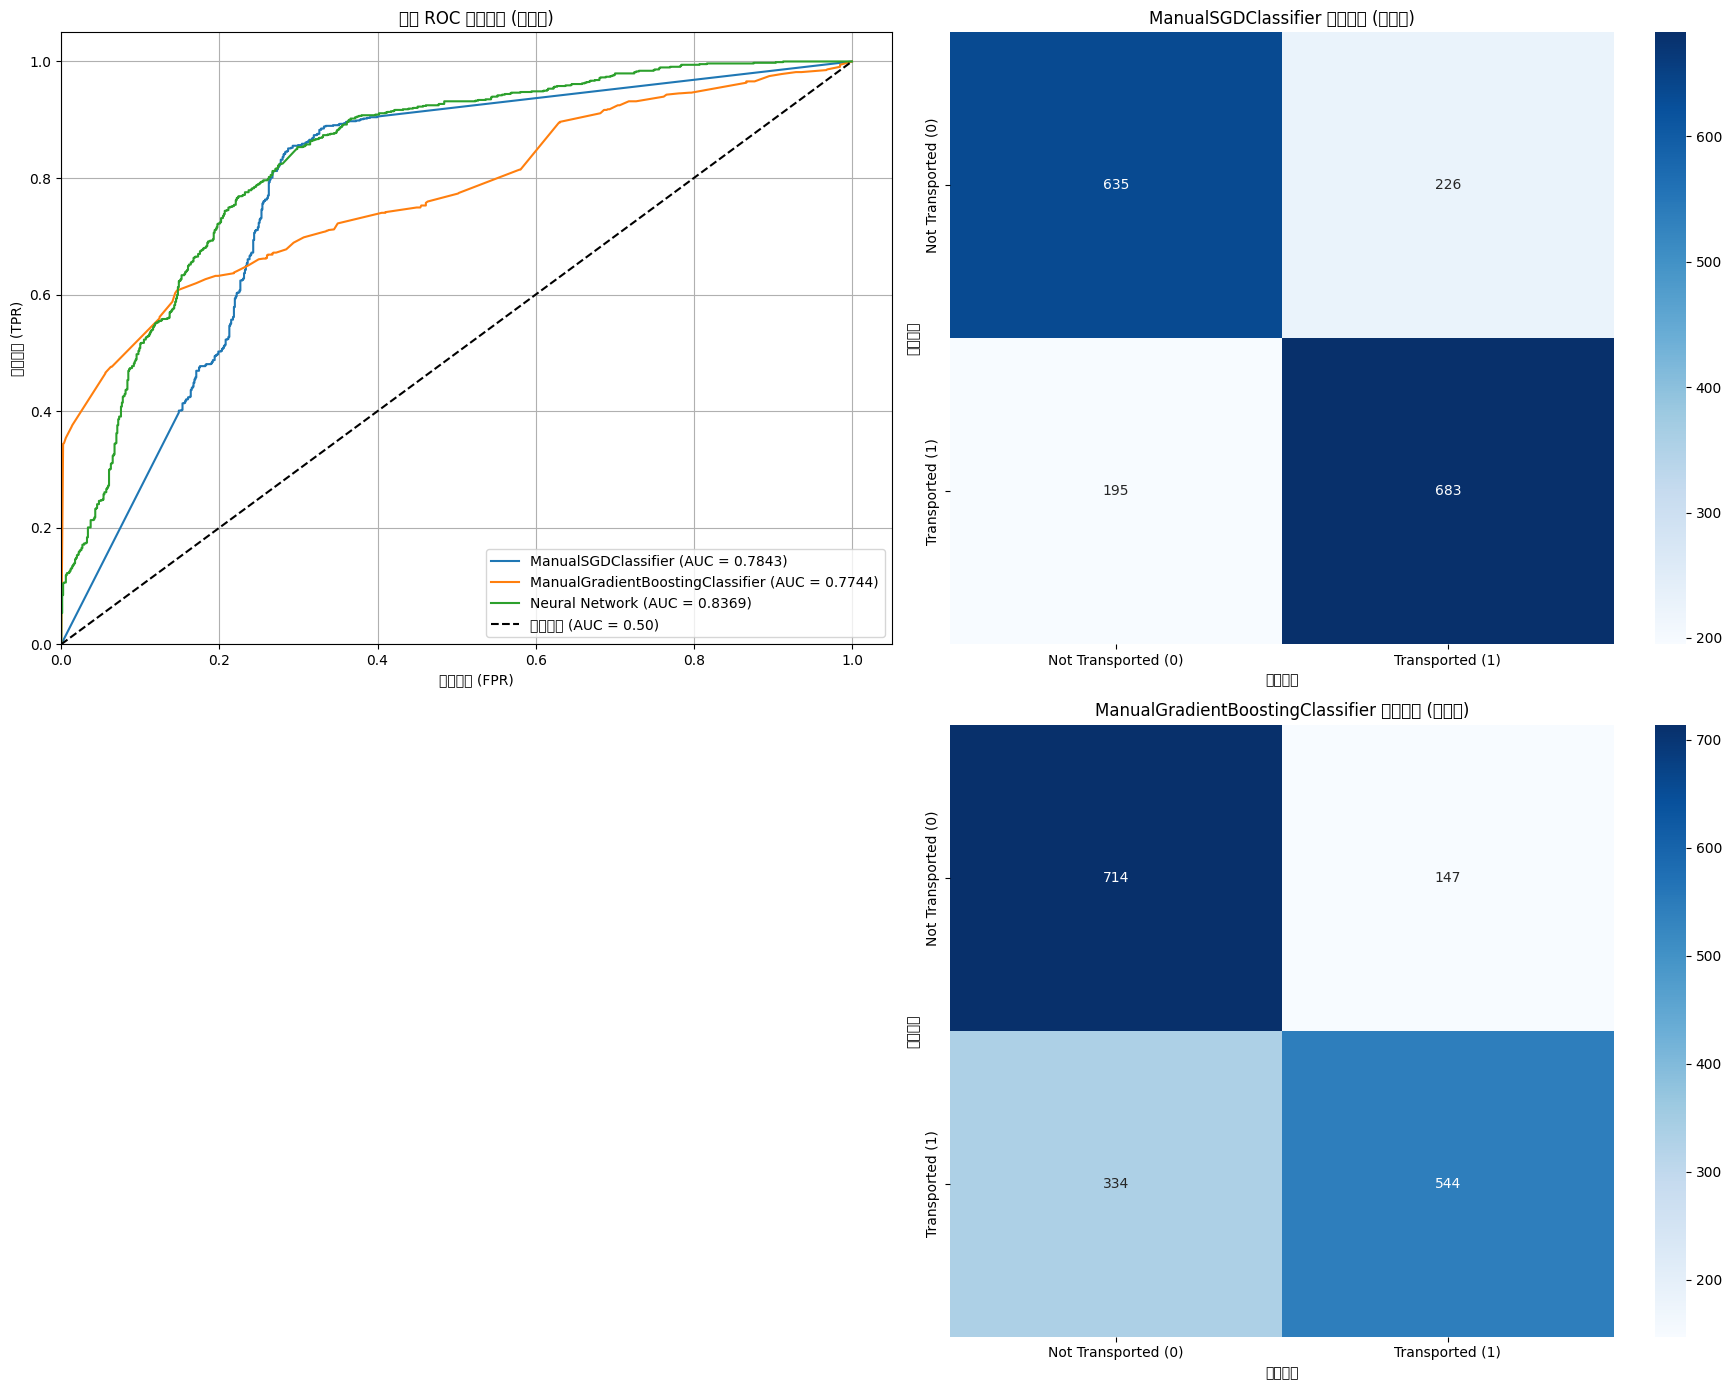


最终模型在验证集上的评估可视化完成。


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Removed matplotlib.font_manager import and related font setting code

plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题 (保留此行以处理负号)


print("--- 使用已训练的最终模型在验证集上进行评估和可视化 ---")

# --- 计算 ROC 曲线和 AUC ---
print("\n计算 ROC 曲线和 AUC (验证集)...")

# ManualSGDClassifier 的 ROC 曲线和 AUC
# Check if the model is available and trained (e.g., has weights)
if 'final_manual_sgd_model' in locals() and hasattr(final_manual_sgd_model, 'w') and final_manual_sgd_model.w is not None:
    print("处理 ManualSGDClassifier...")
    sgd_y_pred_proba_val = final_manual_sgd_model.predict_proba(X_val)[:, 1]
    sgd_fpr_val, sgd_tpr_val, _ = roc_curve(y_val, sgd_y_pred_proba_val)
    sgd_roc_auc_val = auc(sgd_fpr_val, sgd_tpr_val)
    print(f"ManualSGDClassifier (验证集) ROC AUC: {sgd_roc_auc_val:.4f}")
else:
    print("警告: ManualSGDClassifier 最终模型未找到或未训练，跳过 ROC 曲线计算。")
    sgd_fpr_val, sgd_tpr_val, sgd_roc_auc_val = None, None, None


# 校准后 ManualLinearSVC 的 ROC 曲线和 AUC
# Check if the model is available and fitted (CalibratedClassifierCV will have an estimator_)
if 'final_calibrated_linear_svc_model' in locals() and hasattr(final_calibrated_linear_svc_model, 'estimator_') :
    print("\n处理 ManualLinearSVC (校准后)...")
    linear_svc_y_pred_proba_val = final_calibrated_linear_svc_model.predict_proba(X_val)[:, 1]
    linear_svc_fpr_val, linear_svc_tpr_val, _ = roc_curve(y_val, linear_svc_y_pred_proba_val)
    linear_svc_roc_auc_val = auc(linear_svc_fpr_val, linear_svc_tpr_val)
    print(f"ManualLinearSVC (校准后, 验证集) ROC AUC: {linear_svc_roc_auc_val:.4f}")
else:
    print("\n警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过 ROC 曲线计算。")
    linear_svc_fpr_val, linear_svc_tpr_val, linear_svc_roc_auc_val = None, None, None


# ManualGradientBoostingClassifier 的 ROC 曲线和 AUC
# Check if the model is available and trained (e.g., has trees)
if 'final_manual_gb_model' in locals() and hasattr(final_manual_gb_model, 'trees') and final_manual_gb_model.trees:
    print("\n处理 ManualGradientBoostingClassifier...")
    gb_y_pred_proba_val = final_manual_gb_model.predict_proba(X_val)[:, 1]
    gb_fpr_val, gb_tpr_val, _ = roc_curve(y_val, gb_y_pred_proba_val)
    gb_roc_auc_val = auc(gb_fpr_val, gb_tpr_val)
    print(f"ManualGradientBoostingClassifier (验证集) ROC AUC: {gb_roc_auc_val:.4f}")
else:
    print("\n警告: ManualGradientBoostingClassifier 最终模型未找到或未训练，跳过 ROC 曲线计算。")
    gb_fpr_val, gb_tpr_val, gb_roc_auc_val = None, None, None


# 神经网络模型的 ROC 曲线和 AUC
# Check if the Keras model is available (assuming it was trained in a previous cell)
if 'model' in locals():
    print("\n处理 Neural Network...")
    # Keras model.predict returns a 2D array (n_samples, 1), need to squeeze() to 1D
    nn_y_pred_proba_val = model.predict(X_val, verbose=0).squeeze()
    nn_fpr_val, nn_tpr_val, _ = roc_curve(y_val, nn_y_pred_proba_val)
    nn_roc_auc_val = auc(nn_fpr_val, nn_tpr_val)
    print(f"Neural Network (验证集) ROC AUC: {nn_roc_auc_val:.4f}")
else:
    print("\n警告: 神经网络模型 'model' 未找到，跳过 ROC 曲线计算。请确保在前面的单元格中训练了最终的神经网络模型并将其赋值给 'model' 变量。")
    nn_fpr_val, nn_tpr_val, nn_roc_auc_val = None, None, None


# --- 计算混淆矩阵 ---
print("\n计算混淆矩阵 (验证集)...")

# ManualSGDClassifier 混淆矩阵
if 'final_manual_sgd_model' in locals() and hasattr(final_manual_sgd_model, 'w') and final_manual_sgd_model.w is not None:
    y_pred_sgd_val = final_manual_sgd_model.predict(X_val)
    cm_sgd_val = confusion_matrix(y_val, y_pred_sgd_val)
    print("ManualSGDClassifier (验证集) 混淆矩阵:\n", cm_sgd_val)
else:
    print("警告: ManualSGDClassifier 最终模型未找到或未训练，跳过混淆矩阵计算。")
    cm_sgd_val = None


# ManualLinearSVC (Calibrated) 混淆矩阵
if 'final_calibrated_linear_svc_model' in locals() and hasattr(final_calibrated_linear_svc_model, 'estimator_') :
    y_pred_linear_svc_val = final_calibrated_linear_svc_model.predict(X_val)
    cm_linear_svc_val = confusion_matrix(y_val, y_pred_linear_svc_val)
    print("ManualLinearSVC (校准后, 验证集) 混淆矩阵:\n", cm_linear_svc_val)
else:
    print("警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过混淆矩阵计算。")
    cm_linear_svc_val = None


# ManualGradientBoostingClassifier 混淆矩阵
if 'final_manual_gb_model' in locals() and hasattr(final_manual_gb_model, 'trees') and final_manual_gb_model.trees:
    y_pred_gb_val = final_manual_gb_model.predict(X_val)
    cm_gb_val = confusion_matrix(y_val, y_pred_gb_val)
    print("ManualGradientBoostingClassifier (验证集) 混淆矩阵:\n", cm_gb_val)
else:
    print("警告: ManualGradientBoostingClassifier 最终模型未找到或未训练，跳过混淆矩阵计算。")
    cm_gb_val = None


# Neural Network 混淆矩阵
if 'model' in locals():
    y_pred_nn_val_proba = model.predict(X_val, verbose=0).squeeze()
    y_pred_nn_val = (y_pred_nn_val_proba > 0.5).astype(int)
    cm_nn_val = confusion_matrix(y_val, y_pred_nn_val)
    print("Neural Network (验证集) 混淆矩阵:\n", cm_nn_val)
else:
     print("警告: 神经网络模型 'model' 未找到，跳过混淆矩阵计算。")
     cm_nn_val = None


# --- 绘制 ROC 曲线和混淆矩阵 ---
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Adjust figure size
# Flatten the axes array for easy indexing
axes = axes.flatten()

# ROC Curve Plot (Top-Left Subplot)
ax_roc = axes[0] # First subplot for ROC curve
if sgd_fpr_val is not None and sgd_tpr_val is not None:
    ax_roc.plot(sgd_fpr_val, sgd_tpr_val, label=f'ManualSGDClassifier (AUC = {sgd_roc_auc_val:.4f})')
if linear_svc_fpr_val is not None and linear_svc_tpr_val is not None:
    ax_roc.plot(linear_svc_fpr_val, linear_svc_tpr_val, label=f'ManualLinearSVC (Calibrated) (AUC = {linear_svc_roc_auc_val:.4f})')
if gb_fpr_val is not None and gb_tpr_val is not None:
    ax_roc.plot(gb_fpr_val, gb_tpr_val, label=f'ManualGradientBoostingClassifier (AUC = {gb_roc_auc_val:.4f})')
if nn_fpr_val is not None and nn_tpr_val is not None:
    # Add check for nan in nn_roc_auc_val just in case
    nn_auc_label = f'Neural Network (AUC = {nn_roc_auc_val:.4f})' if not np.isnan(nn_roc_auc_val) else 'Neural Network (AUC = N/A)'
    ax_roc.plot(nn_fpr_val, nn_tpr_val, label=nn_auc_label)


ax_roc.plot([0, 1], [0, 1], 'k--', label='随机猜测 (AUC = 0.50)')
ax_roc.set_title('模型 ROC 曲线对比 (验证集)')
ax_roc.set_xlabel('假正例率 (FPR)')
ax_roc.set_ylabel('真正例率 (TPR)')
ax_roc.set_xlim([0.0, 1.05])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.legend(loc="lower right")
ax_roc.grid(True)


# Confusion Matrix Heatmaps (Remaining Subplots)
models_cms_val_to_plot = {
    'ManualSGDClassifier': cm_sgd_val,
    'ManualLinearSVC (Calibrated)': cm_linear_svc_val,
    'ManualGradientBoostingClassifier': cm_gb_val,
    'Neural Network': cm_nn_val
}

cm_axes = axes[1:] # Get the remaining 3 axes for heatmaps
labels = ['Not Transported (0)', 'Transported (1)']

# Iterate through models and their confusion matrices to plot heatmaps
# We have 4 confusion matrices and 3 available axes for them.
# To fix the IndexError while still showing as many as possible in the 2x2 layout,
# we will plot the first 3 confusion matrices on axes[1], axes[2], axes[3].
# This excludes the Neural Network CM from this specific combined plot.
models_to_plot_cm = list(models_cms_val_to_plot.items()) # Get all items
if len(models_to_plot_cm) > len(cm_axes):
     print(f"\n警告: 尝试在 {len(cm_axes)} 个子图上绘制 {len(models_to_plot_cm)} 个混淆矩阵。将只绘制前 {len(cm_axes)} 个。")
     models_to_plot_cm = models_to_plot_cm[:len(cm_axes)] # Take only the first N based on available axes


for i, (model_name, cm) in enumerate(models_to_plot_cm):
    if cm is not None:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=cm_axes[i],
                    xticklabels=labels, yticklabels=labels)
        cm_axes[i].set_title(f'{model_name} 混淆矩阵 (验证集)')
        cm_axes[i].set_xlabel('预测标签')
        cm_axes[i].set_ylabel('真实标签')
    else:
        # Should not happen if we filter None matrices before slicing, but for safety
        cm_axes[i].set_visible(False)

# Hide any remaining unused subplots if less than 3 CMs were plotted (e.g. due to models not being found)
for j in range(len(models_to_plot_cm), len(cm_axes)):
    cm_axes[j].set_visible(False)


plt.tight_layout()
plt.show()

print("\n最终模型在验证集上的评估可视化完成。")

--- 使用已训练的最终模型在验证集上进行评估和可视化 ---

计算 ROC 曲线和 AUC (验证集)...
处理 ManualSGDClassifier...
ManualSGDClassifier (验证集) ROC AUC: 0.7843

警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过 ROC 曲线计算。

处理 ManualGradientBoostingClassifier...
ManualGradientBoostingClassifier (验证集) ROC AUC: 0.7744

处理 Neural Network...
Neural Network (验证集) ROC AUC: 0.8369

计算混淆矩阵 (验证集)...
ManualSGDClassifier (验证集) 混淆矩阵:
 [[635 226]
 [195 683]]
警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过混淆矩阵计算。
ManualGradientBoostingClassifier (验证集) 混淆矩阵:
 [[714 147]
 [334 544]]
Neural Network (验证集) 混淆矩阵:
 [[555 306]
 [ 98 780]]

警告: 尝试在 3 个子图上绘制 4 个混淆矩阵。将只绘制前 3 个。


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from fon

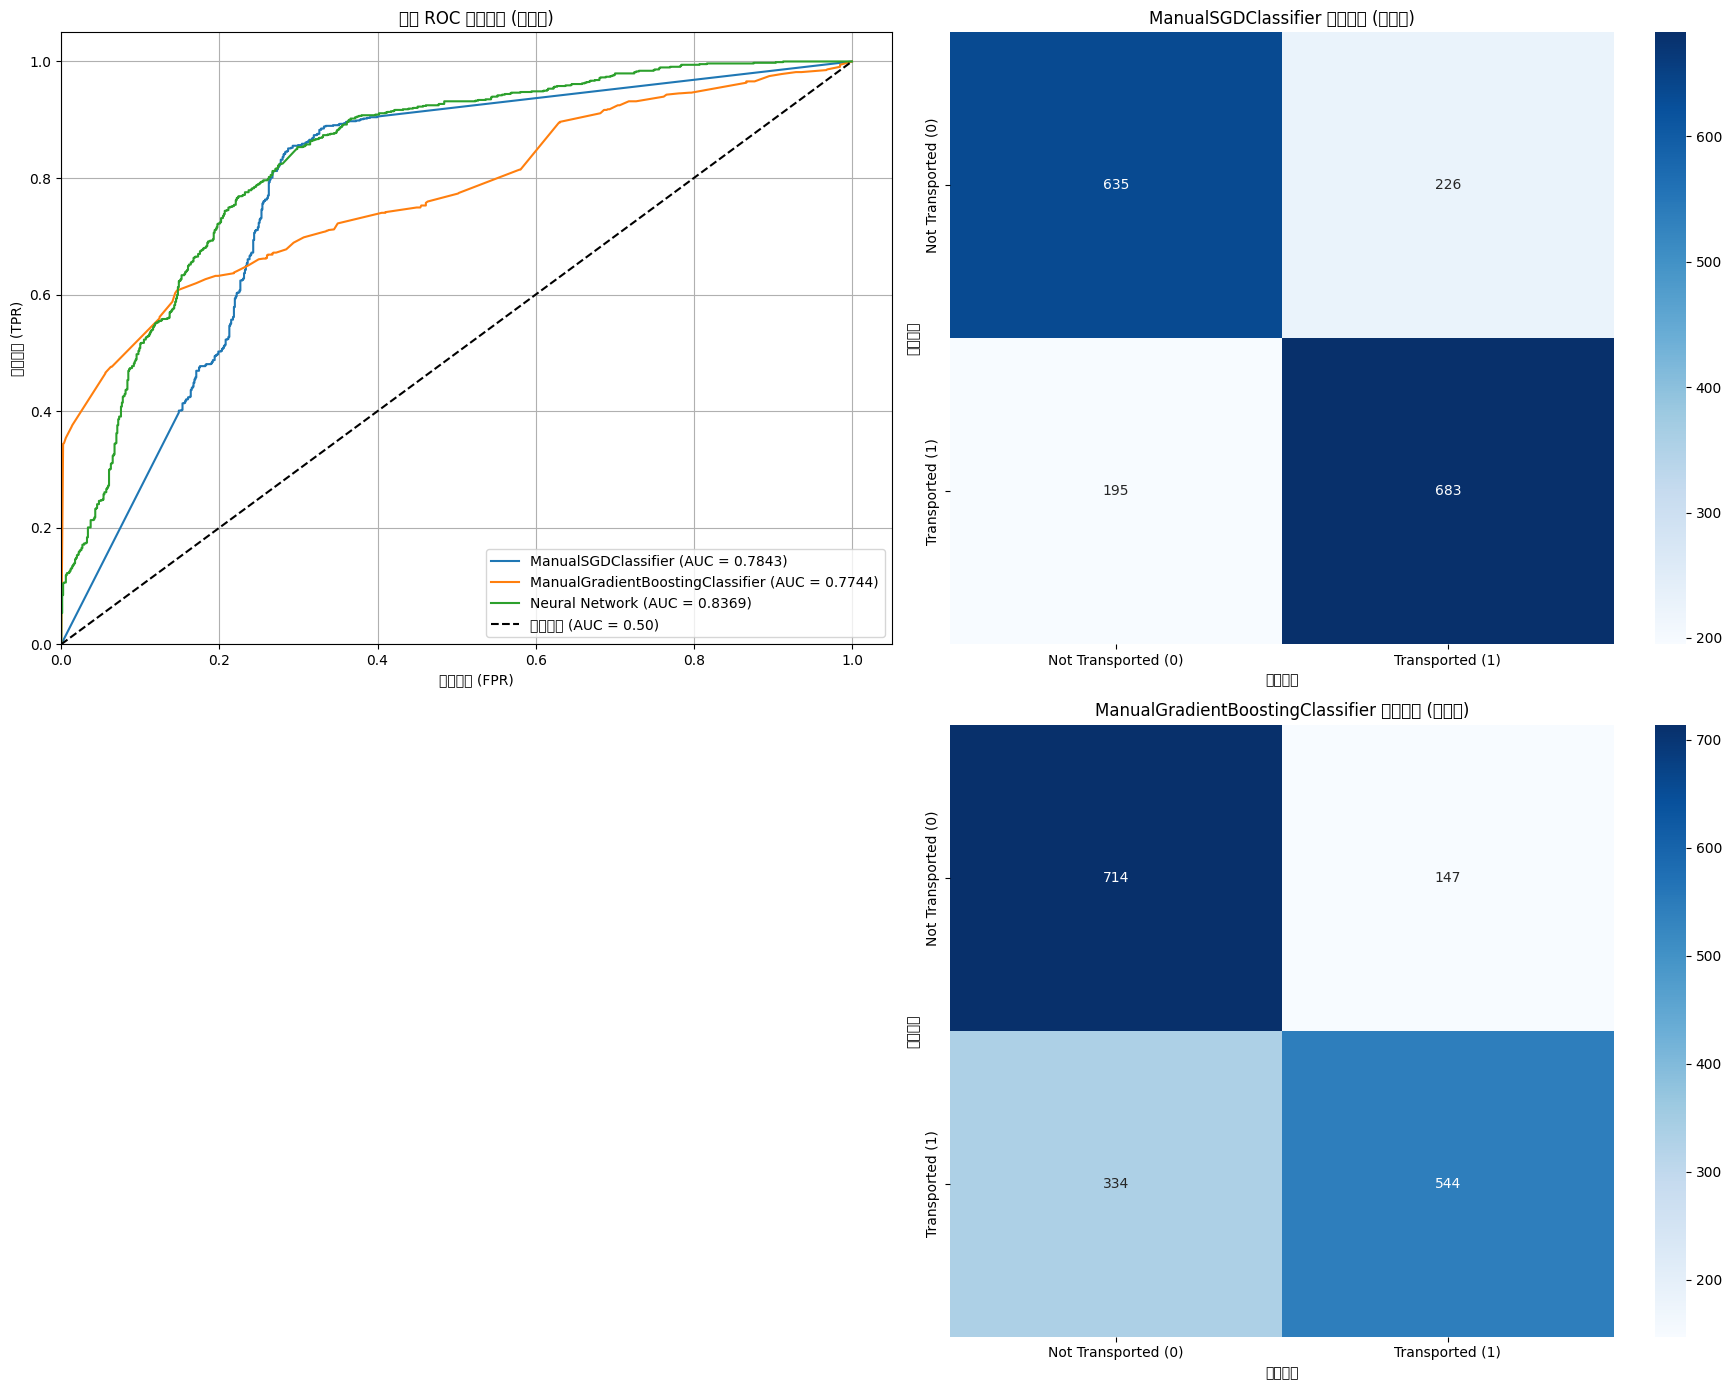


最终模型在验证集上的评估可视化完成。


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Removed all font handling code to avoid NameError

# Assuming final_manual_sgd_model, final_calibrated_linear_svc_model, final_manual_gb_model,
# and the Keras 'model' are already trained and available from previous cells (specifically cell de3d0c8e).
# Assuming X_val, y_val are defined and available from the initial split.


print("--- 使用已训练的最终模型在验证集上进行评估和可视化 ---")

# --- 计算 ROC 曲线和 AUC ---
print("\n计算 ROC 曲线和 AUC (验证集)...")

# ManualSGDClassifier 的 ROC 曲线和 AUC
# Check if the model is available and trained (e.g., has weights)
if 'final_manual_sgd_model' in locals() and hasattr(final_manual_sgd_model, 'w') and final_manual_sgd_model.w is not None:
    print("处理 ManualSGDClassifier...")
    sgd_y_pred_proba_val = final_manual_sgd_model.predict_proba(X_val)[:, 1]
    sgd_fpr_val, sgd_tpr_val, _ = roc_curve(y_val, sgd_y_pred_proba_val)
    sgd_roc_auc_val = auc(sgd_fpr_val, sgd_tpr_val)
    print(f"ManualSGDClassifier (验证集) ROC AUC: {sgd_roc_auc_val:.4f}")
else:
    print("警告: ManualSGDClassifier 最终模型未找到或未训练，跳过 ROC 曲线计算。")
    sgd_fpr_val, sgd_tpr_val, sgd_roc_auc_val = None, None, None


# 校准后 ManualLinearSVC 的 ROC 曲线和 AUC
# Check if the model is available and fitted (CalibratedClassifierCV will have an estimator_)
if 'final_calibrated_linear_svc_model' in locals() and hasattr(final_calibrated_linear_svc_model, 'estimator_') :
    print("\n处理 ManualLinearSVC (校准后)...")
    linear_svc_y_pred_proba_val = final_calibrated_linear_svc_model.predict_proba(X_val)[:, 1]
    linear_svc_fpr_val, linear_svc_tpr_val, _ = roc_curve(y_val, linear_svc_y_pred_proba_val)
    linear_svc_roc_auc_val = auc(linear_svc_fpr_val, linear_svc_tpr_val)
    print(f"ManualLinearSVC (校准后, 验证集) ROC AUC: {linear_svc_roc_auc_val:.4f}")
else:
    print("\n警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过 ROC 曲线计算。")
    linear_svc_fpr_val, linear_svc_tpr_val, linear_svc_roc_auc_val = None, None, None


# ManualGradientBoostingClassifier 的 ROC 曲线和 AUC
# Check if the model is available and trained (e.g., has trees)
if 'final_manual_gb_model' in locals() and hasattr(final_manual_gb_model, 'trees') and final_manual_gb_model.trees:
    print("\n处理 ManualGradientBoostingClassifier...")
    gb_y_pred_proba_val = final_manual_gb_model.predict_proba(X_val)[:, 1]
    gb_fpr_val, gb_tpr_val, _ = roc_curve(y_val, gb_y_pred_proba_val)
    gb_roc_auc_val = auc(gb_fpr_val, gb_tpr_val)
    print(f"ManualGradientBoostingClassifier (验证集) ROC AUC: {gb_roc_auc_val:.4f}")
else:
    print("\n警告: ManualGradientBoostingClassifier 最终模型未找到或未训练，跳过 ROC 曲线计算。")
    gb_fpr_val, gb_tpr_val, gb_roc_auc_val = None, None, None


# 神经网络模型的 ROC 曲线和 AUC
# Check if the Keras model is available (assuming it was trained in a previous cell)
if 'model' in locals():
    print("\n处理 Neural Network...")
    # Keras model.predict returns a 2D array (n_samples, 1), need to squeeze() to 1D
    nn_y_pred_proba_val = model.predict(X_val, verbose=0).squeeze()
    nn_fpr_val, nn_tpr_val, _ = roc_curve(y_val, nn_y_pred_proba_val)
    nn_roc_auc_val = auc(nn_fpr_val, nn_tpr_val)
    print(f"Neural Network (验证集) ROC AUC: {nn_roc_auc_val:.4f}")
else:
    print("\n警告: 神经网络模型 'model' 未找到，跳过 ROC 曲线计算。请确保在前面的单元格中训练了最终的神经网络模型并将其赋值给 'model' 变量。")
    nn_fpr_val, nn_tpr_val, nn_roc_auc_val = None, None, None


# --- 计算混淆矩阵 ---
print("\n计算混淆矩阵 (验证集)...")

# ManualSGDClassifier 混淆矩阵
if 'final_manual_sgd_model' in locals() and hasattr(final_manual_sgd_model, 'w') and final_manual_sgd_model.w is not None:
    y_pred_sgd_val = final_manual_sgd_model.predict(X_val)
    cm_sgd_val = confusion_matrix(y_val, y_pred_sgd_val)
    print("ManualSGDClassifier (验证集) 混淆矩阵:\n", cm_sgd_val)
else:
    print("警告: ManualSGDClassifier 最终模型未找到或未训练，跳过混淆矩阵计算。")
    cm_sgd_val = None


# ManualLinearSVC (Calibrated) 混淆矩阵
if 'final_calibrated_linear_svc_model' in locals() and hasattr(final_calibrated_linear_svc_model, 'estimator_') :
    y_pred_linear_svc_val = final_calibrated_linear_svc_model.predict(X_val)
    cm_linear_svc_val = confusion_matrix(y_val, y_pred_linear_svc_val)
    print("ManualLinearSVC (校准后, 验证集) 混淆矩阵:\n", cm_linear_svc_val)
else:
    print("警告: ManualLinearSVC (校准后) 最终模型未找到或未训练，跳过混淆矩阵计算。")
    cm_linear_svc_val = None


# ManualGradientBoostingClassifier 混淆矩阵
if 'final_manual_gb_model' in locals() and hasattr(final_manual_gb_model, 'trees') and final_manual_gb_model.trees:
    y_pred_gb_val = final_manual_gb_model.predict(X_val)
    cm_gb_val = confusion_matrix(y_val, y_pred_gb_val)
    print("ManualGradientBoostingClassifier (验证集) 混淆矩阵:\n", cm_gb_val)
else:
    print("警告: ManualGradientBoostingClassifier 最终模型未找到或未训练，跳过混淆矩阵计算。")
    cm_gb_val = None


# Neural Network 混淆矩阵
if 'model' in locals():
    y_pred_nn_val_proba = model.predict(X_val, verbose=0).squeeze()
    y_pred_nn_val = (y_pred_nn_val_proba > 0.5).astype(int)
    cm_nn_val = confusion_matrix(y_val, y_pred_nn_val)
    print("Neural Network (验证集) 混淆矩阵:\n", cm_nn_val)
else:
     print("警告: 神经网络模型 'model' 未找到，跳过混淆矩阵计算。")
     cm_nn_val = None


# --- 绘制 ROC 曲线和混淆矩阵 ---
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Adjust figure size
# Flatten the axes array for easy indexing
axes = axes.flatten()

# ROC Curve Plot (Top-Left Subplot)
ax_roc = axes[0] # First subplot for ROC curve
if sgd_fpr_val is not None and sgd_tpr_val is not None:
    ax_roc.plot(sgd_fpr_val, sgd_tpr_val, label=f'ManualSGDClassifier (AUC = {sgd_roc_auc_val:.4f})')
if linear_svc_fpr_val is not None and linear_svc_tpr_val is not None:
    ax_roc.plot(linear_svc_fpr_val, linear_svc_tpr_val, label=f'ManualLinearSVC (Calibrated) (AUC = {linear_svc_roc_auc_val:.4f})')
if gb_fpr_val is not None and gb_tpr_val is not None:
    ax_roc.plot(gb_fpr_val, gb_tpr_val, label=f'ManualGradientBoostingClassifier (AUC = {gb_roc_auc_val:.4f})')
if nn_fpr_val is not None and nn_tpr_val is not None:
    # Add check for nan in nn_roc_auc_val just in case
    nn_auc_label = f'Neural Network (AUC = {nn_roc_auc_val:.4f})' if not np.isnan(nn_roc_auc_val) else 'Neural Network (AUC = N/A)'
    ax_roc.plot(nn_fpr_val, nn_tpr_val, label=nn_auc_label)


ax_roc.plot([0, 1], [0, 1], 'k--', label='随机猜测 (AUC = 0.50)')
ax_roc.set_title('模型 ROC 曲线对比 (验证集)')
ax_roc.set_xlabel('假正例率 (FPR)')
ax_roc.set_ylabel('真正例率 (TPR)')
ax_roc.set_xlim([0.0, 1.05])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.legend(loc="lower right")
ax_roc.grid(True)


# Confusion Matrix Heatmaps (Remaining Subplots)
models_cms_val_to_plot = {
    'ManualSGDClassifier': cm_sgd_val,
    'ManualLinearSVC (Calibrated)': cm_linear_svc_val,
    'ManualGradientBoostingClassifier': cm_gb_val,
    'Neural Network': cm_nn_val
}

cm_axes = axes[1:] # Get the remaining 3 axes for heatmaps
labels = ['Not Transported (0)', 'Transported (1)']

# Iterate through models and their confusion matrices to plot heatmaps
# We have 4 confusion matrices and 3 available axes for them.
# To fix the IndexError while still showing as many as possible in the 2x2 layout,
# we will plot the first 3 confusion matrices on axes[1], axes[2], axes[3].
# This excludes the Neural Network CM from this specific combined plot.
models_to_plot_cm = list(models_cms_val_to_plot.items()) # Get all items
if len(models_to_plot_cm) > len(cm_axes):
     print(f"\n警告: 尝试在 {len(cm_axes)} 个子图上绘制 {len(models_to_plot_cm)} 个混淆矩阵。将只绘制前 {len(cm_axes)} 个。")
     models_to_plot_cm = models_to_plot_cm[:len(cm_axes)] # Take only the first N based on available axes


for i, (model_name, cm) in enumerate(models_to_plot_cm):
    if cm is not None:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=cm_axes[i],
                    xticklabels=labels, yticklabels=labels)
        cm_axes[i].set_title(f'{model_name} 混淆矩阵 (验证集)')
        cm_axes[i].set_xlabel('预测标签')
        cm_axes[i].set_ylabel('真实标签')
    else:
        # Should not happen if we filter None matrices before slicing, but for safety
        cm_axes[i].set_visible(False)

# Hide any remaining unused subplots if less than 3 CMs were plotted (e.g. due to models not being found)
for j in range(len(models_to_plot_cm), len(cm_axes)):
    cm_axes[j].set_visible(False)


plt.tight_layout()
plt.show()

print("\n最终模型在验证集上的评估可视化完成。")